# Projet 4 : Analysez les ventes de votre entreprise

**Importation des librairies**

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import datetime

**Préparation de la mise en page des graphiques**

In [2]:
plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['axes.titlepad'] = 20
plt.rcParams['axes.labelpad'] = 15
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['legend.framealpha'] = 1
plt.rcParams['legend.facecolor'] = (0.95,0.95,0.95)
plt.rcParams['legend.edgecolor'] = (0.95,0.95,0.95)
plt.rcParams['savefig.orientation'] = 'landscape'
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

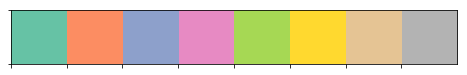

In [3]:
sns.set_palette("Set2")
liste_couleurs = sns.color_palette()
sns.palplot(liste_couleurs)

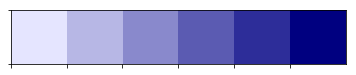

In [4]:
sns.set_palette(sns.light_palette("navy"))
liste_couleurs = sns.color_palette()
sns.palplot(liste_couleurs)

**Chargement des données nettoyées**

In [5]:
clients_clean = pd.read_csv("projet04_clients_clean.csv")
produits_clean = pd.read_csv("projet04_produits_clean.csv")
ventes_clean = pd.read_csv("projet04_ventes_clean.csv", parse_dates=["date"])
data_clean = pd.read_csv("projet04_data_clean.csv", parse_dates=["date"], dtype={"year_month": object})
panier_clean = pd.read_csv("projet04_panier_clean.csv", parse_dates=["date_achat"], converters={"duree_session": pd.to_timedelta}, dtype={"year_month": object})
clients = clients_clean.copy()
produits = produits_clean.copy()
ventes = ventes_clean.copy()
data = data_clean.copy()
panier = panier_clean.copy()

In [6]:
clients.head()

client_id sex  birth  age
0    c_4410   f   1967   55
1    c_7839   f   1975   47
2    c_1699   f   1984   38
3    c_5961   f   1962   60
4    c_5320   m   1943   79

In [7]:
produits.head()

id_prod  price  categ
0  0_1421  19.99      0
1  0_1368   5.13      0
2   0_731  17.99      0
3   1_587   4.99      1
4  0_1507   3.99      0

In [8]:
ventes.head()

id_prod                       date session_id client_id
0  0_1483 2021-04-10 18:37:28.723910   s_018746    c_4450
1   2_226 2022-02-03 01:55:53.276402   s_159142     c_277
2   1_374 2021-09-23 15:13:46.938559   s_094290    c_4270
3  0_2186 2021-10-17 03:27:18.783634   s_105936    c_4597
4  0_1351 2021-07-17 20:34:25.800563   s_063642    c_1242

In [9]:
data.head()

session_id                       date id_prod  price  categ client_id sex  \
0   s_018746 2021-04-10 18:37:28.723910  0_1483   4.99      0    c_4450   f   
1   s_159142 2022-02-03 01:55:53.276402   2_226  65.75      2     c_277   f   
2   s_094290 2021-09-23 15:13:46.938559   1_374  10.71      1    c_4270   f   
3   s_105936 2021-10-17 03:27:18.783634  0_2186   4.20      0    c_4597   m   
4   s_063642 2021-07-17 20:34:25.800563  0_1351   8.99      0    c_1242   f   

   birth  client_age year_month day_of_week  
0   1977          45     202104    Saturday  
1   2000          22     202202    Thursday  
2   1979          43     202109    Thursday  
3   1963          59     202110      Sunday  
4   1980          42     202107    Saturday

In [10]:
panier.head()

session_id client_id sex  birth                 date_achat   duree_session  \
0   s_000001     c_329   f   1967 2021-03-01 00:01:07.843138        00:00:00   
1   s_000002     c_664   m   1960 2021-03-01 00:02:26.047414        00:00:00   
2   s_000003     c_580   m   1988 2021-03-01 00:38:57.630675 00:36:19.319262   
3   s_000004    c_7912   f   1989 2021-03-01 00:17:11.089942 00:12:16.530250   
4   s_000005    c_2033   f   1956 2021-03-01 00:05:18.801198        00:00:00   

   nombre_produits_panier  nombre_produits_differents  montant_panier  \
0                       1                           1           11.99   
1                       1                           1           19.37   
2                       4                           4           24.99   
3                       2                           2           20.75   
4                       1                           1           16.49   

   client_age year_month day_of_week  
0          55     202103      Monday  
1          62     202103      Monday  
2          34     202103      Monday  
3          33     202103      Monday  
4          66     202103      Monday

---
## <font color=blue>Mission 2 : Analyse des données</font>

### Note sur la méthode

Je crée différents dataframes qui servent de bases aux graphiques. Je commence par regarder les valeurs de ces dataframes pour repérer les données intéressantes à représenter graphiquement. Je trace un ou plusieurs graphiques. Seuls ceux que je juge intéressants sont sauvegardés en fichier image png.

Pour commencer, j'analyse les bases clients et produits pour avoir une idée de la répartition de notre clientèle par sexe et par âge, et des caractéristiques des produits que nous vendons.  
Puis j'analyserai les ventes sous divers aspects.

### 2.1 Analyse de la base clients

**Indicateurs sur l'âge des clients**

In [11]:
temp = pd.DataFrame([clients.age.describe(), clients[clients.sex=="f"].age.describe(), \
                     clients[clients.sex=="m"].age.describe()], ["Tous clients","Clients féminins","Clients masculins"])
temp

count       mean        std   min   25%   50%   75%   max
Tous clients       8621.0  43.724394  16.917958  18.0  30.0  43.0  56.0  93.0
Clients féminins   4490.0  44.010245  17.096698  18.0  30.0  43.0  56.0  93.0
Clients masculins  4131.0  43.413701  16.718043  18.0  30.0  42.0  56.0  93.0

Les clients ont en moyenne 43 ans et 9 mois. Leur âge se répartit entre 18 ans (âge minimum légal pour acheter sur le site) et 93 ans. L'écart interquartile est de 26 ans, et l'écart-type d'environ 17 ans. Il y a très peu de différence selon leur sexe.

In [12]:
sns.set_style("white")
sns.set_palette("Set2")
liste_couleurs = sns.color_palette()

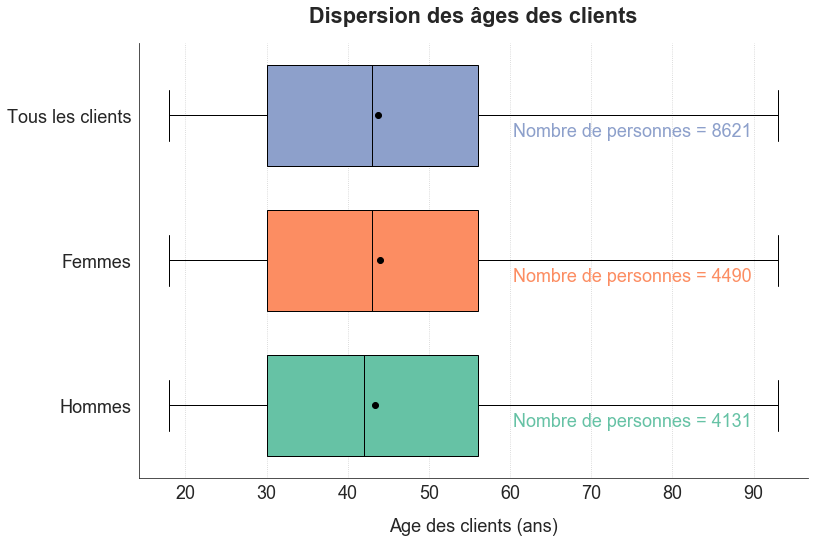

In [13]:
fig = plt.figure()
ax = plt.axes()

bplot = ax.boxplot([clients[clients.sex=="m"].age, clients[clients.sex=="f"].age, clients.age],
            positions= [1,2,3], # abscisses des boxplots
            showmeans=True,
            showfliers=True, # on ne prend pas en compte les outliers
            widths= 0.7, # largeur graphique des boxplots
            vert=False,
            patch_artist = True,
            manage_xticks= False)
cpt=-1
for patch in bplot['boxes']:
    cpt+=1
    patch.set_facecolor(liste_couleurs[cpt])
cpt=-1
for patch in bplot['fliers']:
    cpt+=1
    patch.set_markerfacecolor(liste_couleurs[cpt])
for patch in bplot['medians']:
    patch.set_color('black')
for patch in bplot['means']:
    patch.set_marker('o')
    patch.set_markeredgecolor('black')
    patch.set_markerfacecolor('black')

list_txt = [clients[clients.sex=="m"].client_id.count(), clients[clients.sex=="f"].client_id.count(), clients.client_id.count()]
for cat in np.arange(3):  # affichage des effectifs de chaque classe
    plt.text(75,cat+0.95,"Nombre de personnes = {}".format(list_txt[cat]),horizontalalignment='center',verticalalignment='top',color=liste_couleurs[cat])

ax.set_xlabel("Age des clients (ans)")
ax.set_ylim([0.5,3.5])
ax.yaxis.set_ticks(np.arange(1, 3.01, 1))
ax.set_yticklabels(["Hommes","Femmes","Tous les clients"])
ax.grid(axis="x", linestyle=":")
plt.title("Dispersion des âges des clients")
sns.despine()
plt.savefig("projet04_201_clients_age.png")
plt.show()

**Répartition de la base clients par sexe**

In [14]:
sns.set_style("whitegrid", {"xtick.bottom": True})
sns.set_palette("Set2")
liste_couleurs = sns.color_palette()

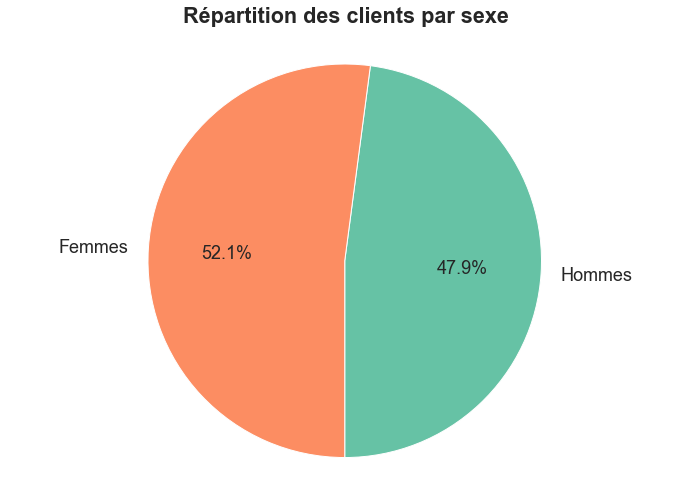

In [15]:
fig = plt.figure()
ax = plt.axes()
labels = ["Hommes","Femmes"]
sizes = [clients[clients.sex == "m"].sex.count(),
         clients[clients.sex == "f"].sex.count()]
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=270)
ax.axis('equal')
plt.title("Répartition des clients par sexe")
plt.savefig("projet04_202_clients_repartition_sexe.png")
plt.show()

Il y a une très légère majorité de femmes parmi les clients. Mais la différence entre les femmes et les hommes (52%-48%) n'est pas significative, surtout que l'on peut considérer qu'un même foyer peut aléatoirement être inscrit sous le nom de l'homme ou de la femme.

**Distribution de la base clients par âge/année de naissance**

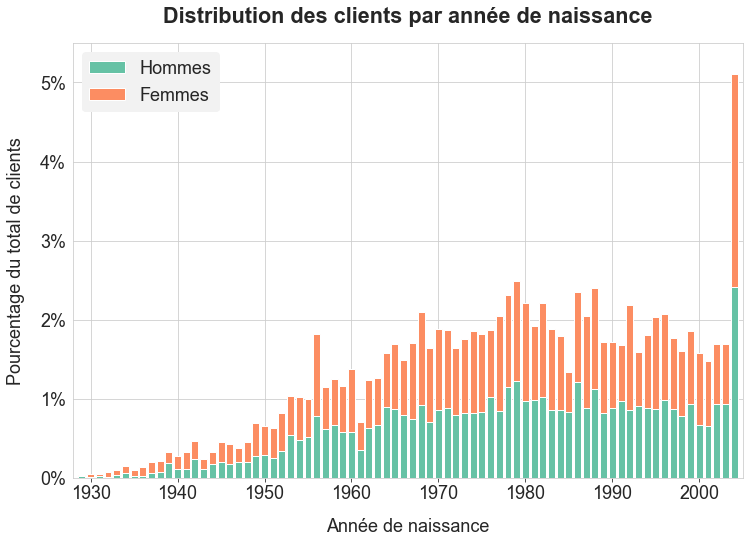

In [16]:
fig = plt.figure()
ax = plt.axes()
ax.bar(np.sort(clients.birth.unique()), \
       height=[len(clients[(clients.birth==annee) & (clients.sex == "m")].birth) / len(clients) for annee in np.sort(clients.birth.unique())],\
      label="Hommes")
ax.bar(np.sort(clients.birth.unique()), \
       height=[len(clients[(clients.birth==annee) & (clients.sex == "f")].birth) / len(clients) for annee in np.sort(clients.birth.unique())],
      bottom=[len(clients[(clients.birth==annee) & (clients.sex == "m")].birth) / len(clients) for annee in np.sort(clients.birth.unique())],\
      label="Femmes")
ax.set_ylabel("Pourcentage du total de clients")
ax.set_xlabel("Année de naissance")
ax.set_ylim([0,0.055])
ax.yaxis.set_major_formatter(plticker.PercentFormatter(xmax=1, decimals=0))
ax.set_xlim([1928,2005])
ax.legend(loc='upper left')
plt.title("Distribution des clients par année de naissance")
plt.show()

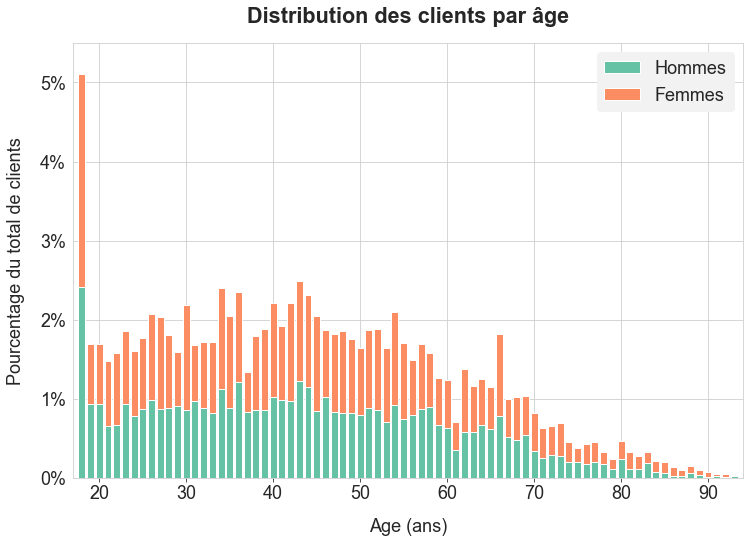

In [17]:
fig = plt.figure()
ax = plt.axes()
ax.bar(np.sort(clients.age.unique()), \
       height=[len(clients[(clients.age==age) & (clients.sex == "m")].age) / len(clients) for age in np.sort(clients.age.unique())],\
      label="Hommes")
ax.bar(np.sort(clients.age.unique()), \
       height=[len(clients[(clients.age==age) & (clients.sex == "f")].age) / len(clients) for age in np.sort(clients.age.unique())],
      bottom=[len(clients[(clients.age==age) & (clients.sex == "m")].age) / len(clients) for age in np.sort(clients.age.unique())],\
      label="Femmes")
ax.set_ylabel("Pourcentage du total de clients")
ax.set_xlabel("Age (ans)")
ax.set_ylim([0,0.055])
ax.yaxis.set_major_formatter(plticker.PercentFormatter(xmax=1, decimals=0))
ax.set_xlim([17,94])
ax.legend(loc='upper right')
plt.title("Distribution des clients par âge")
plt.savefig("projet04_203_clients_repartition_age.png")
plt.show()

Je remarque une sur-représentation des clients de 18 ans. Je suppose que des clients mineurs achètent sur le site en renseignant 18 ans comme âge.

### 2.2 Analyse de la base produits

**Répartition des produits par catégorie**

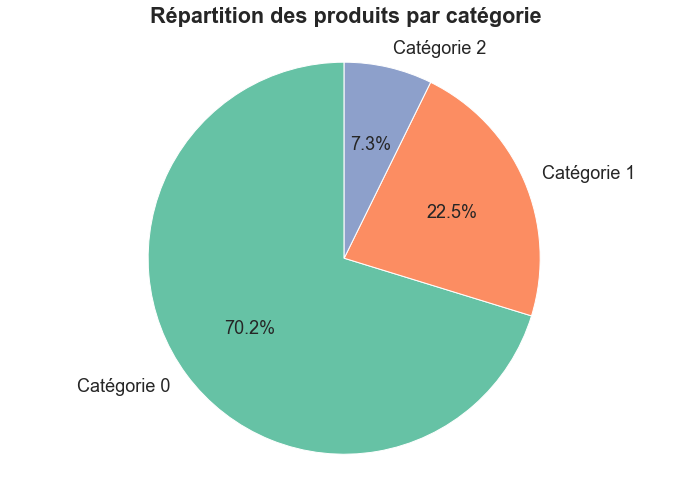

In [18]:
fig = plt.figure()
ax = plt.axes()
labels = ["Catégorie 0","Catégorie 1","Catégorie 2"]
sizes = [produits[produits.categ == 0].categ.count(), produits[produits.categ == 1].categ.count(), \
         produits[produits.categ == 2].categ.count()]
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title("Répartition des produits par catégorie")
plt.savefig("projet04_204_produits_repartition_categorie.png")
plt.show()

Le catalogue contient principalement des produits de catégorie 0 (plus des deux-tiers). Le reste du catalogue est composé aux trois-quarts de produits de catégorie 1.

**Répartition des prix pour chaque catégorie**

In [19]:
sns.set_style("white")

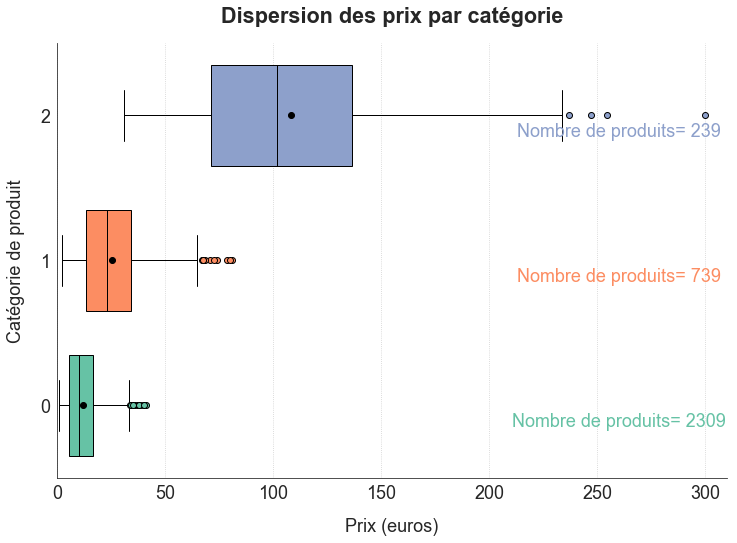

In [20]:
fig = plt.figure()
ax = plt.axes()

valeurs = []
for cat in np.arange(3):
    valeurs.append(produits[produits.categ == cat].price)
bplot = ax.boxplot([valeurs[cat] for cat in np.arange(3)], # affichage des boxplots
            positions= [1,2,3], # abscisses des boxplots
            showmeans=True,
            showfliers=True, # on ne prend pas en compte les outliers
            widths= 0.7, # largeur graphique des boxplots
            vert=False,
            patch_artist = True,
            manage_xticks= False)
cpt=-1
for patch in bplot['boxes']:
    cpt+=1
    patch.set_facecolor(liste_couleurs[cpt])
cpt=-1
for patch in bplot['fliers']:
    cpt+=1
    patch.set_markerfacecolor(liste_couleurs[cpt])
for patch in bplot['medians']:
    patch.set_color('black')
for patch in bplot['means']:
    patch.set_marker('o')
    patch.set_markeredgecolor('black')
    patch.set_markerfacecolor('black')

for cat in np.arange(3):  # affichage des effectifs de chaque classe
    plt.text(260,cat+0.95,"Nombre de produits= {}".format(produits[produits.categ == cat].categ.count()),horizontalalignment='center',verticalalignment='top',color=liste_couleurs[cat])

ax.set_xlabel("Prix (euros)")
ax.set_ylabel("Catégorie de produit")
ax.set_xlim([0,310])
ax.set_ylim([0.5,3.5])
ax.yaxis.set_ticks(np.arange(1, 3.01, 1))
ax.set_yticklabels(["0","1","2"])
ax.grid(axis='x', linestyle=':')
plt.title("Dispersion des prix par catégorie")
sns.despine()
plt.savefig("projet04_205_produits_prix_categorie.png")
plt.show()

Les prix des produits de la catégorie 0 sont très concentrés sur des faibles valeurs. Les produits de la catégorie 1 sont légèrement plus dispersés et sont plus élevés. La catégorie 2 se différencie nettement, avec des prix plus élevés et une plus grande dispersion de prix. En tableau, cela donne :

In [21]:
temp = pd.DataFrame([produits[produits.categ == 0].price.describe(), produits[produits.categ == 1].price.describe(), \
                     produits[produits.categ == 2].price.describe()], \
        ["Prix des produits de la catégorie 0","Prix des produits de la catégorie 1","Prix des produits de la catégorie 2"])
temp

count        mean        std    min  \
Prix des produits de la catégorie 0  2309.0   11.732183   7.564173   0.62   
Prix des produits de la catégorie 1   739.0   25.531421  15.425162   2.00   
Prix des produits de la catégorie 2   239.0  108.354686  49.561431  30.99   

                                        25%     50%     75%     max  
Prix des produits de la catégorie 0   5.590   10.32   16.65   40.99  
Prix des produits de la catégorie 1  13.390   22.99   33.99   80.99  
Prix des produits de la catégorie 2  71.065  101.99  136.53  300.00

In [22]:
sns.set_style("whitegrid", {"xtick.bottom": True})

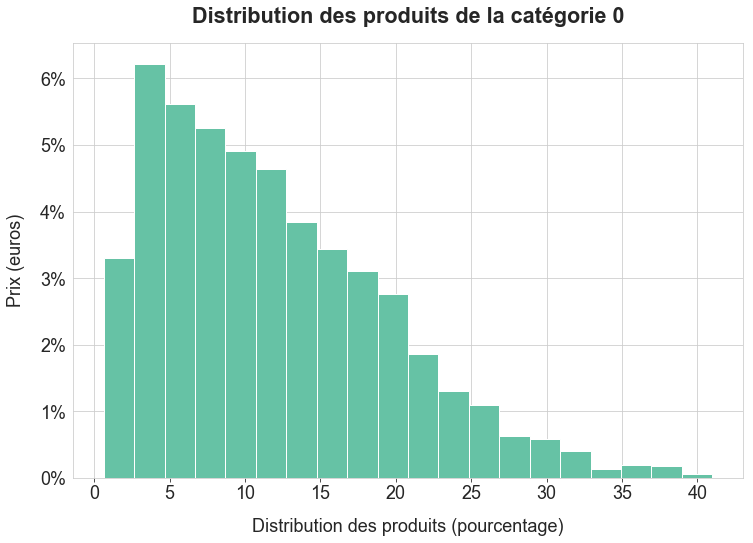

In [23]:
fig = plt.figure()
ax = plt.axes()
values = [produits[produits.categ == 0].price]
ax.hist(values, bins=20, label=labels, density=True)
ax.set_xlabel("Distribution des produits (pourcentage)")
ax.set_ylabel("Prix (euros)")
ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:.0%}'))
plt.title("Distribution des produits de la catégorie 0")
plt.show()

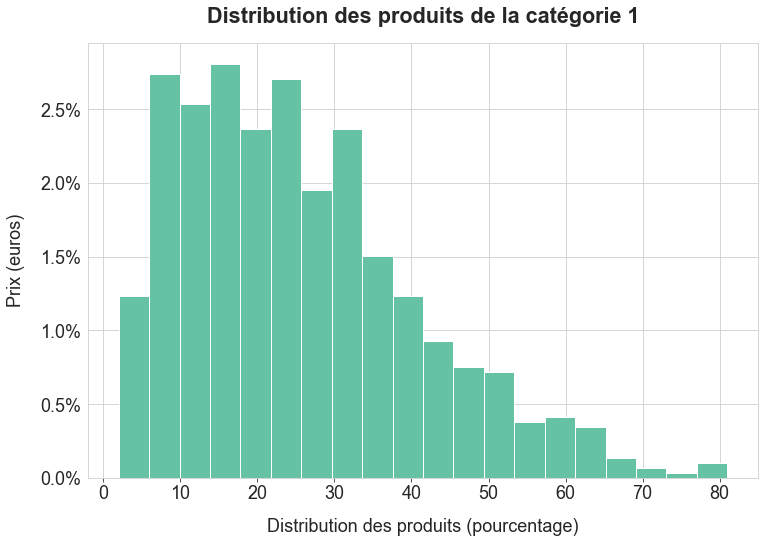

In [24]:
fig = plt.figure()
ax = plt.axes()
values = [produits[produits.categ == 1].price]
ax.hist(values, bins=20, label=labels, density=True)
ax.set_xlabel("Distribution des produits (pourcentage)")
ax.set_ylabel("Prix (euros)")
ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:.1%}'))
plt.title("Distribution des produits de la catégorie 1")
plt.show()

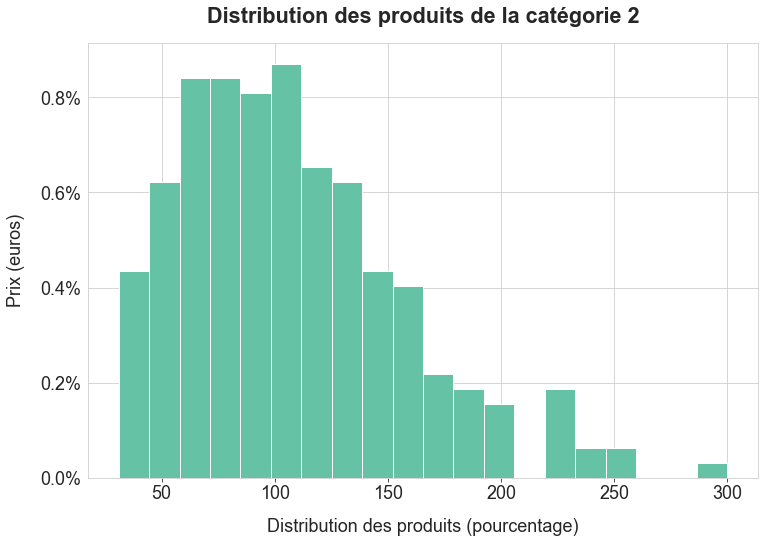

In [25]:
fig = plt.figure()
ax = plt.axes()
values = [produits[produits.categ == 2].price]
ax.hist(values, bins=20, label=labels, density=True)
ax.set_xlabel("Distribution des produits (pourcentage)")
ax.set_ylabel("Prix (euros)")
ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:.1%}'))
plt.title("Distribution des produits de la catégorie 2")
plt.show()

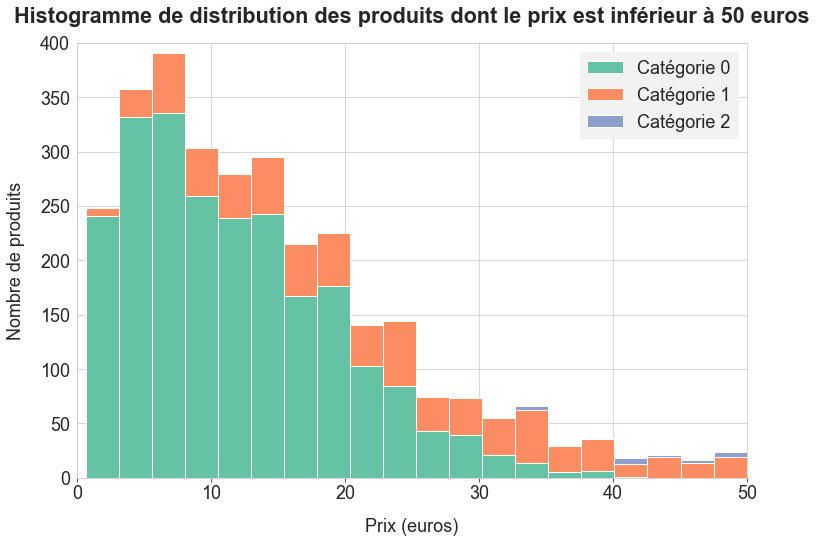

In [26]:
fig = plt.figure()
ax = plt.axes()
labels = ["Catégorie 0","Catégorie 1","Catégorie 2"]
values = [produits[(produits.price < 50) & (produits.categ == 0)].price,\
          produits[(produits.price < 50) & (produits.categ == 1)].price,\
          produits[(produits.price < 50) & (produits.categ == 2)].price]
ax.hist(values, bins=20, label=labels, stacked=True)
ax.set_ylabel("Nombre de produits")
ax.set_xlabel("Prix (euros)")
ax.set_ylim([0,400])
ax.set_xlim([0,50])
ax.legend(loc='upper right')
plt.title("Histogramme de distribution des produits dont le prix est inférieur à 50 euros")
plt.show()

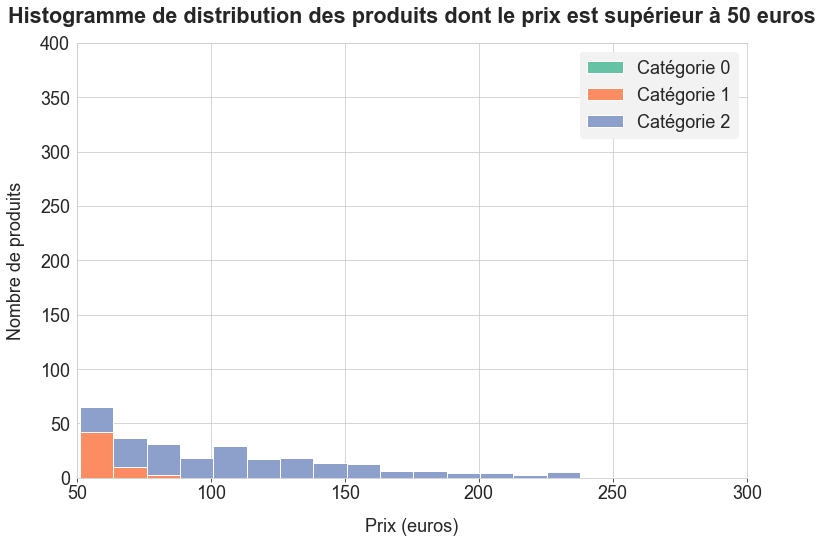

In [27]:
fig = plt.figure()
ax = plt.axes()
labels = ["Catégorie 0","Catégorie 1","Catégorie 2"]
values = [produits[(produits.price >= 50) & (produits.categ == 0)].price,\
          produits[(produits.price >= 50) & (produits.categ == 1)].price,\
          produits[(produits.price >= 50) & (produits.categ == 2)].price]
ax.hist(values, bins=20, label=labels, stacked=True)
ax.set_ylabel("Nombre de produits")
ax.set_xlabel("Prix (euros)")
ax.set_ylim([0,400])
ax.set_xlim([50,300])
ax.legend(loc='upper right')
plt.title("Histogramme de distribution des produits dont le prix est supérieur à 50 euros")
plt.show()

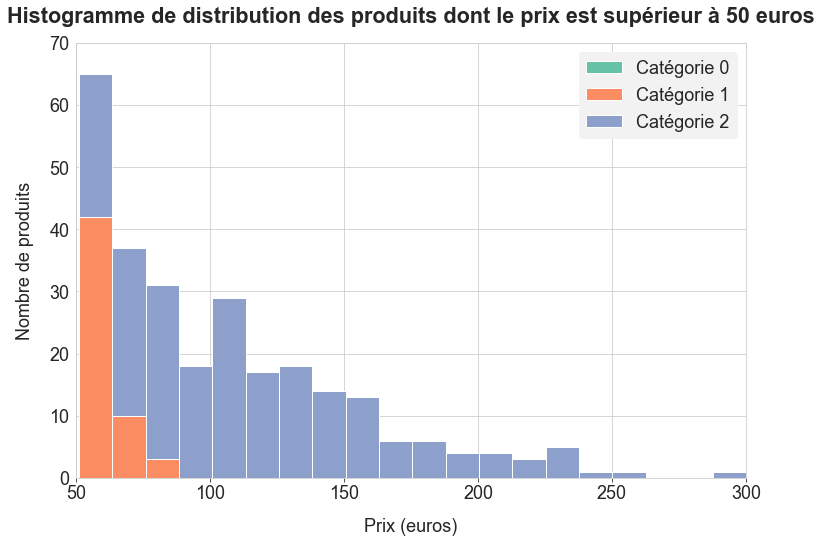

In [28]:
fig = plt.figure()
ax = plt.axes()
labels = ["Catégorie 0","Catégorie 1","Catégorie 2"]
values = [produits[(produits.price >= 50) & (produits.categ == 0)].price,\
          produits[(produits.price >= 50) & (produits.categ == 1)].price,\
          produits[(produits.price >= 50) & (produits.categ == 2)].price]
ax.hist(values, bins=20, label=labels, stacked=True)
ax.set_ylabel("Nombre de produits")
ax.set_xlabel("Prix (euros)")
ax.set_ylim([0,70])
ax.set_xlim([50,300])
ax.legend(loc='upper right')
plt.title("Histogramme de distribution des produits dont le prix est supérieur à 50 euros")
plt.show()

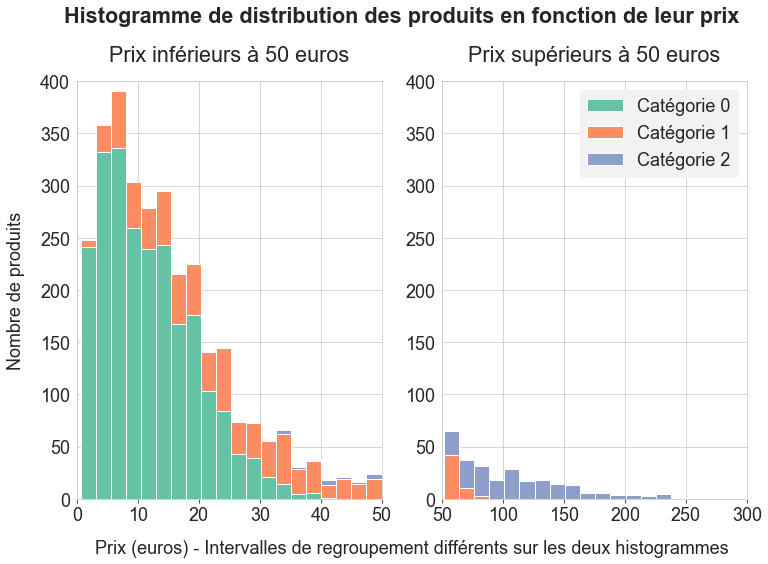

In [29]:
fig = plt.figure()
fig.subplots_adjust(wspace=0.2, top = 0.85)

labels = ["Catégorie 0","Catégorie 1","Catégorie 2"]

ax1 = fig.add_subplot(121)
values = [produits[(produits.price < 50) & (produits.categ == 0)].price,\
          produits[(produits.price < 50) & (produits.categ == 1)].price,\
          produits[(produits.price < 50) & (produits.categ == 2)].price]
ax1.hist(values, bins=20, label=labels, stacked=True)
ax1.set_ylabel("Nombre de produits")
#ax1.set_xlabel("Prix (euros)")
ax1.set_ylim([0,400])
ax1.set_xlim([0,50])
ax1.set_title("Prix inférieurs à 50 euros", fontweight='regular')

ax2 = fig.add_subplot(122)
values = [produits[(produits.price >= 50) & (produits.categ == 0)].price,\
          produits[(produits.price >= 50) & (produits.categ == 1)].price,\
          produits[(produits.price >= 50) & (produits.categ == 2)].price]
ax2.hist(values, bins=20, label=labels, stacked=True)
#ax2.set_ylabel("Nombre de produits")
ax2.set_xlabel("Prix (euros) - Intervalles de regroupement différents sur les deux histogrammes", position = (-0.1,0))
ax2.set_ylim([0,400])
ax2.set_xlim([50,300])
ax2.legend(loc='upper right')
ax2.set_title("Prix supérieurs à 50 euros", fontweight='regular')

plt.suptitle("Histogramme de distribution des produits en fonction de leur prix")
plt.savefig("projet04_206_produits_distribution_prix.png")
plt.show()

Les produits les plus représentés, que ce soit au global ou à l'intérieur de chaque catégorie, sont ceux avec les prix les moins élevés. On s'attend à un skewness positif, au global comme l'intérieur de chaque catégorie.  
Attention : l'échelle du nombre de produits et l'intervalle de regroupement des prix ne sont les mêmes sur le graphique de gauche (nombre de produits de 0 à 400, regroupement de 0 à 50 euros en 20 intervalles) que sur celui de droite (nombre de produits de 0 à 70, regroupement de 50 à 300 euros en 20 intervalles).

In [30]:
temp = pd.DataFrame([produits.price.skew(), produits[produits.categ == 0].price.skew(), \
                     produits[produits.categ == 1].price.skew(), produits[produits.categ == 2].price.skew()], \
                    ["Tous produits","Produits de la catégorie 0","Produits de la catégorie 1","Produits de la catégorie 2"],
                    ["Skewness"])
temp["Kurtosis"] = [produits.price.kurtosis(), produits[produits.categ == 0].price.kurtosis(), \
                     produits[produits.categ == 1].price.kurtosis(), produits[produits.categ == 2].price.kurtosis()]
temp

Skewness   Kurtosis
Tous produits               3.799062  17.953270
Produits de la catégorie 0  0.839123   0.334064
Produits de la catégorie 1  0.812011   0.299353
Produits de la catégorie 2  0.931021   0.808968

### 2.3 Analyse des ventes par mois

Avant d'analyser les ventes par mois, je vais calculer le chiffre d'affaires, le nombre de produits vendus, le nombre de commandes et le montant moyen du panier sur les 12 mois passés.

In [31]:
resume_data = [data.price.sum(), len(data), len(panier), panier.montant_panier.mean()]
resume_data = pd.DataFrame(resume_data, index=["chiffre_affaires","nombre_produits_vendus","nombre_commandes","panier_moyen"], \
                          columns=["donnees_non_corrigées"])
resume_data

donnees_non_corrigées
chiffre_affaires                 5.797641e+06
nombre_produits_vendus           3.368160e+05
nombre_commandes                 1.691940e+05
panier_moyen                     3.426623e+01

J'analyse maintenant les données des paniers par mois : chiffre d'affaires mensuel, nombre de produits vendus, prix moyen par produit, nombre de ventes, panier moyen, nombre moyen de produits dans un panier, age moyen et duréé moyenne de la session (pour les paniers comportant plusieurs produits).

In [32]:
analyse_mois = panier.groupby("year_month")[["montant_panier","nombre_produits_panier"]].sum()
analyse_mois.columns = ["chiffre_affaires","nombre_produits_vendus"]
analyse_mois["prix_moyen_produit"] = analyse_mois.chiffre_affaires / \
                                                analyse_mois.nombre_produits_vendus

In [33]:
analyse_mois["nombre_ventes"] = panier.groupby("year_month")["session_id"].count()
analyse_mois["panier_moyen"] = analyse_mois.chiffre_affaires / analyse_mois.nombre_ventes
analyse_mois["nombre_moyen_produits"] = analyse_mois.nombre_produits_vendus / \
                                                analyse_mois.nombre_ventes

In [34]:
analyse_mois["age_moyen"] = panier.groupby("year_month")["client_age"].mean()
analyse_mois["duree_moyenne_session"] = panier[panier.nombre_produits_panier > 1].\
                                    groupby("year_month")["duree_session"].mean(numeric_only=False)

In [35]:
analyse_mois

chiffre_affaires  nombre_produits_vendus  prix_moyen_produit  \
year_month                                                                 
202103             479302.58                   28560           16.782303   
202104             473068.13                   28414           16.649121   
202105             489488.89                   28246           17.329494   
202106             481263.03                   26818           17.945523   
202107             480924.22                   24715           19.458799   
202108             479546.99                   25623           18.715490   
202109             502891.96                   33267           15.116841   
202110             319222.22                   21584           14.789762   
202111             512816.34                   28270           18.139948   
202112             523164.78                   32430           16.132124   
202201             522908.30                   29315           17.837568   
202202             533043.29                   29574           18.024051   

            nombre_ventes  panier_moyen  nombre_moyen_produits  age_moyen  \
year_month                                                                  
202103              14199     33.756080               2.011409  46.036622   
202104              13967     33.870418               2.034367  45.830887   
202105              14165     34.556222               1.994070  45.763219   
202106              13833     34.790937               1.938697  45.569508   
202107              13566     35.450702               1.821834  45.147280   
202108              13590     35.286754               1.885430  45.245843   
202109              14847     33.871621               2.240655  46.703981   
202110              11549     27.640681               1.868906  44.725604   
202111              14601     35.122001               1.936169  46.105746   
202112              15564     33.613774               2.083655  46.847147   
202201              14974     34.921083               1.957727  46.208762   
202202              14339     37.174370               2.062487  45.799707   

           duree_moyenne_session  
year_month                        
202103           00:26:14.119305  
202104           00:26:23.082923  
202105           00:26:46.664211  
202106           00:26:00.727984  
202107           00:26:54.725161  
202108           00:26:33.668605  
202109           00:26:30.313017  
202110           00:25:21.821155  
202111           00:26:09.056201  
202112           00:25:49.589101  
202201           00:25:35.462735  
202202           00:26:28.430210

In [36]:
sns.set_style("white")
sns.set_palette(sns.light_palette("navy"))
liste_couleurs = sns.color_palette()

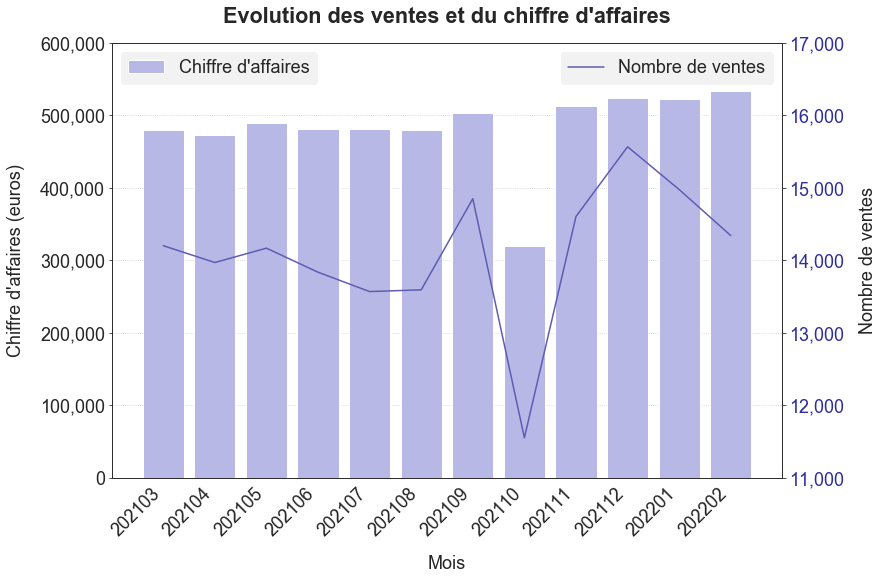

In [37]:
fig = plt.figure()
ax1 = plt.axes()
ax1.bar(analyse_mois.index, analyse_mois.chiffre_affaires, label="Chiffre d'affaires", color=liste_couleurs[1])
ax1.set_ylabel("Chiffre d'affaires (euros)")
ax1.set_xticklabels(analyse_mois.index, rotation = 45, ha="right")
ax1.set_ylim([0,600000])
ax1.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:,.0f}'))
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot(analyse_mois.index, analyse_mois.nombre_ventes, label="Nombre de ventes", color=liste_couleurs[3])
ax2.set_ylabel("Nombre de ventes")
ax2.set_ylim([11000,17000])
ax2.set_yticklabels(np.arange(11000,17001,1000), color=liste_couleurs[4])
ax2.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:,.0f}'))
ax2.legend(loc='upper right')
ax1.set_xlabel("Mois")
ax1.grid(axis="y", linestyle=":")
plt.title("Evolution des ventes et du chiffre d'affaires")
plt.savefig("projet04_erreur_octobre2021.png")
plt.show()

On remarque que les différentes moyennes calculées dans le dataframe chiffre_affaires ne semblent pas connaître de grandes évolutions dans le temps, mis-à-part le mois d'octobre 2021 avec une baisse significative du chiffre d'affaires, du nombre de produits vendus, du nombre de ventes et du panier moyen, et légère de l'âge moyen. **Je vais analyser ce mois d'octobre 2021**

In [38]:
data_oct2021 = data[data.year_month == '202110']
data_nboct2021 = len(data_oct2021)
print("Il y a {} produits vendus en octobre 2021".format(data_nboct2021))

Il y a 21584 produits vendus en octobre 2021


In [39]:
data_autresmois = data[data.year_month != '202110']
data_nbautres = len(data_autresmois)
print("Il y a {:.0f} produits vendus en moyenne les autres mois".format(data_nbautres / 11))

Il y a 28657 produits vendus en moyenne les autres mois


In [40]:
temp = data_oct2021[["categ","session_id"]].groupby("categ").count() / data_nboct2021
temp = pd.concat([temp, data_autresmois[["categ","session_id"]].groupby("categ").count() / data_nbautres], axis=1)
temp.columns = ["oct_2021","autres_mois"]
temp

oct_2021  autres_mois
categ                       
0      0.869162      0.60517
1      0.077094      0.34283
2      0.053744      0.05200

**On remarque une sous-représentation des produits de catégorie 1 dans les ventees du mois d'octobre 2021** : 7,71% seulement contre 34,28% lors des autres mois. A l'inverse, la catégorie 0 est sur-représentée par rapport à la moyenne des autres mois.

In [41]:
temp = data_oct2021[["sex","session_id"]].groupby("sex").count() / data_nboct2021
temp = pd.concat([temp, data_autresmois[["sex","session_id"]].groupby("sex").count() / data_nbautres], axis=1)
temp.columns = ["oct_2021","autres_mois"]
temp

oct_2021  autres_mois
sex                       
f    0.485869     0.498325
m    0.514131     0.501675

In [42]:
data_oct2021["tranche_prix"] = pd.cut(data_oct2021["price"], np.arange(0,301,10)).astype(str)
data_oct2021["tranche_prix"] = data_oct2021.tranche_prix.str.split(",", 1).str[0].str.slice(1).astype(int)
data_autresmois["tranche_prix"] = pd.cut(data_autresmois["price"], np.arange(0,301,10)).astype(str)
data_autresmois["tranche_prix"] = data_autresmois.tranche_prix.str.split(",", 1).str[0].str.slice(1).astype(int)
temp = data_oct2021[["tranche_prix","session_id"]].groupby("tranche_prix").count() / data_nboct2021
temp = pd.concat([temp, data_autresmois[["tranche_prix","session_id"]].groupby("tranche_prix").count() / data_nbautres], axis=1)
temp.columns = ["oct_2021","autres_mois"]
temp.head(10)

C:\Anaconda3\envs\Jupyter\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda3\envs\Jupyter\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda3\envs\Jupyter\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

oct_2021  autres_mois
tranche_prix                       
0             0.445701     0.314184
10            0.459322     0.470565
20            0.038269     0.149769
30            0.002178     0.007804
40            0.009729     0.012556
50            0.014038     0.014491
60            0.017467     0.017133
70            0.001668     0.001586
80            0.002270     0.002068
90            0.000510     0.000558

Nous remarquons une sur-représentation des prix inférieurs à 10 euros en octobre 2021 par rapport aux autres mois.

In [43]:
data_oct2021["tranche_age"] = pd.cut(data_oct2021["client_age"], np.arange(15,96,10))
data_autresmois["tranche_age"] = pd.cut(data_autresmois["client_age"], np.arange(15,96,10))
temp = data_oct2021[["tranche_age","session_id"]].groupby("tranche_age").count() / data_nboct2021
temp = pd.concat([temp, data_autresmois[["tranche_age","session_id"]].groupby("tranche_age").count() / data_nbautres], axis=1)
temp.columns = ["oct_2021","autres_mois"]
temp

C:\Anaconda3\envs\Jupyter\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda3\envs\Jupyter\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


oct_2021  autres_mois
tranche_age                       
(15, 25]     0.060878     0.077111
(25, 35]     0.194635     0.180131
(35, 45]     0.394830     0.347284
(45, 55]     0.218310     0.216853
(55, 65]     0.070006     0.093141
(65, 75]     0.042346     0.059144
(75, 85]     0.015289     0.022108
(85, 95]     0.003706     0.004229

Le problème ne vient pas de là. Je sais que la proportion de ventes entre les catégories est suspecte. Je vais vérifier le nombre de ventes d'octobre 2021 par rapport à la moyenne des autres mois.

In [44]:
temp = data_oct2021[["categ","session_id"]].groupby("categ").count()
temp = pd.concat([temp, data_autresmois[["categ","session_id"]].groupby("categ").count() / 11], axis=1)
temp.columns = ["oct_2021","autres_mois"]
temp

oct_2021   autres_mois
categ                        
0         18760  17342.636364
1          1664   9824.636364
2          1160   1490.181818

**Il semble manquer des ventes dans la catégorie 1.** Je vérifie les ventes de chaque catégorie par jour au cours du mois d'ocobre 2021.

In [45]:
data_oct2021["jour"] = data_oct2021.date.dt.day
temp = data_oct2021[["jour","categ","session_id"]].groupby(["jour","categ"]).count().reset_index()
temp_croise = temp.pivot_table(index="jour",columns="categ",aggfunc='sum')
temp_croise

C:\Anaconda3\envs\Jupyter\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


session_id             
categ          0      1     2
jour                         
1          662.0  344.0  37.0
2          660.0    NaN  27.0
3          647.0    NaN  30.0
4          602.0    NaN  37.0
5          594.0    NaN  38.0
6          701.0    NaN  25.0
7          597.0    NaN  26.0
8          669.0    NaN  44.0
9          640.0    NaN  35.0
10         599.0    NaN  28.0
11         642.0    NaN  42.0
12         632.0    NaN  29.0
13         633.0    NaN  36.0
14         605.0    NaN  39.0
15         633.0    NaN  37.0
16         661.0    NaN  45.0
17         625.0    NaN  44.0
18         608.0    NaN  37.0
19         567.0    NaN  37.0
20         555.0    NaN  42.0
21         610.0    NaN  43.0
22         571.0    NaN  34.0
23         555.0    NaN  47.0
24         584.0    NaN  44.0
25         545.0    NaN  32.0
26         591.0    NaN  35.0
27         530.0    NaN  49.0
28         548.0  316.0  30.0
29         595.0  326.0  50.0
30         546.0  339.0  40.0
31         553.0  339.0  41.0

**Anomalie détectée** : il manque les données des ventes des produits de la catégorie 1 pour les jours 2 à 27 du mois d'octobre. Cela représente des données manquantes pour 26 jours sur 31 au mois d'octobre.  
Je contacte le service qui m'a fourni les données pour obtenir les données manquantes.
Il manque les données de ventes des produits de la catégorie 1 pour plus de 40% des jours du mois. Il y a trop de données manquantes et pas assez d'information sur ces données manquantes pour en créer des fictives. **Je garde les données du mois d'octobre de mes dataframes data et panier en gardant en tête leur caractère incomplet.**  
Il faudra garder en tête cette suppression si je suis amené à calculer des données annuelles.

**Le dataframe d'analyse de l'évolution du CA par mois me permet de créer des graphiques de l'évolution dans le temps du chiffre d'affaires, du nombre de ventes, du panier moyen et du nombre moyen de produits dans le panier.** Ce sont les principales informations pertinentes à tirer de ce tableau. Ces données peuvent être regroupées dans deux graphiques : l'un sur les ventes, l'autre sur les paniers moyens.

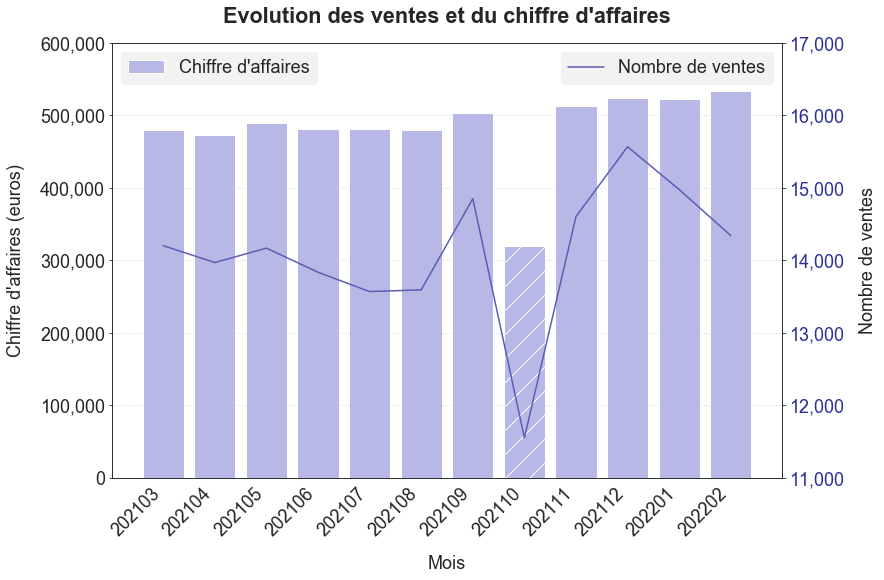

In [46]:
fig = plt.figure()
ax1 = plt.axes()
axbar = ax1.bar(analyse_mois.index, analyse_mois.chiffre_affaires, label="Chiffre d'affaires", color=liste_couleurs[1])
axbar[7].set_hatch('/')
ax1.set_ylabel("Chiffre d'affaires (euros)")
ax1.set_xticklabels(analyse_mois.index, rotation = 45, ha="right")
ax1.set_ylim([0,600000])
ax1.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:,.0f}'))
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot(analyse_mois.index, analyse_mois.nombre_ventes, label="Nombre de ventes", color=liste_couleurs[3])
ax2.set_ylabel("Nombre de ventes")
ax2.yaxis.set_ticks(np.arange(11000,17001,1000))
ax2.set_yticklabels(np.arange(11000,17001,1000), color=liste_couleurs[4])
ax2.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:,.0f}'))
ax2.legend(loc='upper right')
ax1.set_xlabel("Mois")
ax1.grid(axis="y", linestyle=":")
plt.title("Evolution des ventes et du chiffre d'affaires")
plt.savefig("projet04_207_evolution_ventes_CA.png")
plt.show()

Le chiffre d'affaires augmente assez régulièrement depuis août 2021, soit les 5 derniers mois. Par contre, le nombre de ventes n'a pas suivi la même progression.

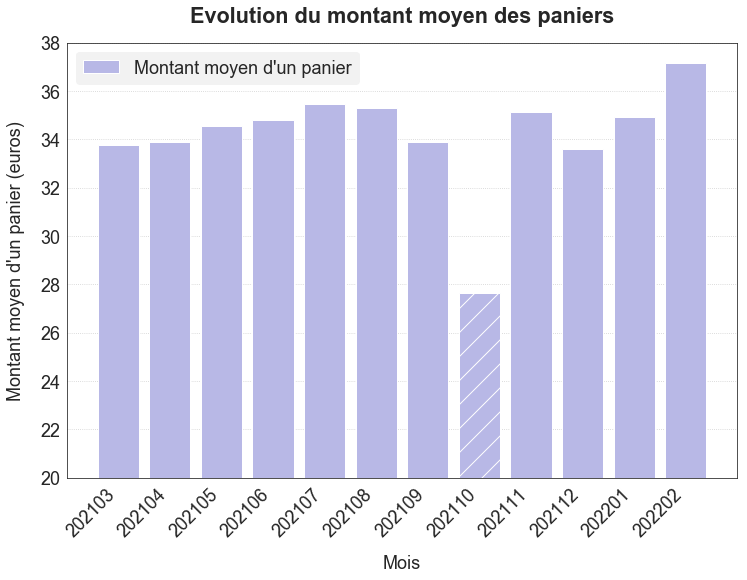

In [47]:
fig = plt.figure()
ax = plt.axes()
axbar = ax.bar(analyse_mois.index, analyse_mois.panier_moyen, label="Montant moyen d'un panier", color=liste_couleurs[1])
axbar[7].set_hatch('/')
ax.set_ylabel("Montant moyen d'un panier (euros)")
ax.set_xticklabels(analyse_mois.index, rotation = 45, ha="right")
ax.set_ylim([20,38])
ax.set_xlabel("Mois")
ax.grid(axis="y", linestyle=":")
ax.legend(loc='upper left')
plt.title("Evolution du montant moyen des paniers")
plt.savefig("projet04_208_evolution_paniers.png")
plt.show()

Le panier moyen a progressé lors des 5 premiers mois de la période. Avant d'être plus inconstant quelques mois. Pour finir, il a augmenté fortement lors des 2 derniers mois, où sa hausse explique la hausse du CA.

Je vais ajuster les valeurs du résumé des 12 derniers mois en corrigeant les données du mois d'octobre 2012. Pour le CA, le nombre de produits vendus, le nombre de commandes et le panier moyen, je prends la moyenne de septembre 2021 et de novembre 2021.

In [48]:
other_data = [data[data.year_month!="202110"].price.sum(), len(data[data.year_month!="202110"]), \
              len(panier[panier.year_month!="202110"]), panier[panier.year_month!="202110"].montant_panier.mean()]
oct2021_data = [data[data.year_month.isin(["202109","202111"])].price.sum() / 2, \
                len(data[data.year_month.isin(["202109","202111"])]) / 2, \
                len(panier[panier.year_month.isin(["202109","202111"])]) / 2, \
                panier[panier.year_month.isin(["202109","202111"])].montant_panier.mean()]
resume_data["corrigees_oct2021"] = [other_data[0] + oct2021_data[0], other_data[1] + oct2021_data[1] , \
                                     other_data[2] + oct2021_data[2], (other_data[3] * 11/12) + (oct2021_data[3] / 12)]

In [49]:
resume_data.applymap('{:,.2f}'.format)

donnees_non_corrigées corrigees_oct2021
chiffre_affaires                5,797,640.73      5,986,272.66
nombre_produits_vendus            336,816.00        346,000.50
nombre_commandes                  169,194.00        172,369.00
panier_moyen                           34.27             34.73

Je prépare un dataframe qui indique le chiffre d'affaires par catégorie, regroupé par mois. Idem pour le chiffre d'affaires par tranche d'âge des clients.

In [50]:
temp = data.groupby(["year_month","categ"])[["price"]]
chiffre_affaires_categorie = temp.sum().unstack()
chiffre_affaires_categorie.columns = ["categ_0","categ_1","categ_2"]
chiffre_affaires_categorie

categ_0    categ_1    categ_2
year_month                                 
202103      193600.15  186930.95   98771.48
202104      205294.26  156135.16  111638.71
202105      196197.04  165888.27  127403.58
202106      168009.83  189043.64  124209.56
202107      144710.31  188593.79  147620.12
202108      167776.85  163090.80  148679.34
202109      246395.06  190603.61   65893.29
202110      199315.71   33726.81   86179.70
202111      155864.49  252815.85  104136.00
202112      206119.07  251111.22   65934.49
202201      164239.81  256256.75  102411.74
202202      183263.03  213187.56  136592.70

In [51]:
sns.set_palette("Set2")
liste_couleurs = sns.color_palette()

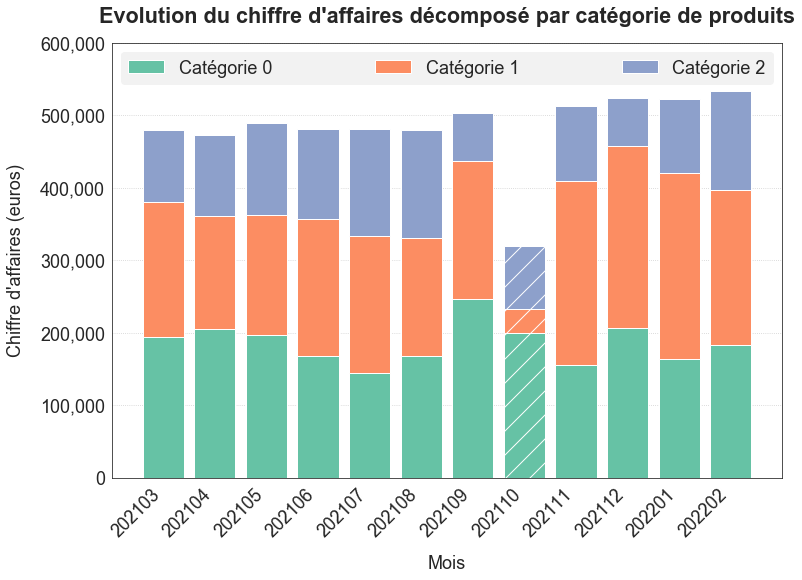

In [52]:
fig = plt.figure()
ax = plt.axes()
axbar1 = ax.bar(chiffre_affaires_categorie.index, height=chiffre_affaires_categorie.categ_0, label="Catégorie 0")
axbar2 = ax.bar(chiffre_affaires_categorie.index, height=chiffre_affaires_categorie.categ_1, \
       bottom=chiffre_affaires_categorie.categ_0, label="Catégorie 1")
axbar3 = ax.bar(chiffre_affaires_categorie.index, height=chiffre_affaires_categorie.categ_2, \
       bottom=(chiffre_affaires_categorie.categ_0 + chiffre_affaires_categorie.categ_1), label="Catégorie 2")
axbar1[7].set_hatch('/')
axbar2[7].set_hatch('/')
axbar3[7].set_hatch('/')
ax.set_ylabel("Chiffre d'affaires (euros)")
ax.set_ylim([0,600000])
ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:,.0f}'))
ax.set_xlabel("Mois")
ax.set_xticklabels(chiffre_affaires_categorie.index, rotation = 45, ha="right")
ax.legend(loc='upper left', mode="expand", ncol=3)
ax.grid(axis="y", linestyle=":")
plt.title("Evolution du chiffre d'affaires décomposé par catégorie de produits")
plt.savefig("projet04_209_evolution_CA_categorie.png")
plt.show()

La part des différentes catégories de produits dans le chiffre d'affaires total varie sensiblement d'un mois à l'autre. Certains mois sont marqués par un faible chiffre d'affaires sur les produits de la catégorie 0 (juillet et novembre 2021), d'autres sur les produits de la catégorie 2 (septembre et décembre 2021).

In [53]:
produits_vendus_categorie = temp.size().unstack()
produits_vendus_categorie.columns = ["categ 0","categ 1","categ 2"]
produits_vendus_categorie

categ 0  categ 1  categ 2
year_month                           
202103        18113     9132     1315
202104        19335     7579     1500
202105        18485     8107     1654
202106        15891     9258     1669
202107        13565     9173     1977
202108        15716     7958     1949
202109        23126     9267      874
202110        18760     1664     1160
202111        14584    12313     1373
202112        19292    12262      876
202201        15388    12559     1368
202202        17274    10463     1837

Le nombre de produits vendus par catégorie par mois n'apporte pas d'informations supplémentaires. De plus, il est moins parlant que le chiffre d'affaires par catégorie.

In [54]:
temp = data.groupby(["year_month",pd.cut(data["client_age"], [15,30,50,95])])[["price"]]
chiffre_affaires_age = temp.sum().unstack()
chiffre_affaires_age.columns = ["moins_de_30","de_31_a_50","plus_de_51"]
chiffre_affaires_age

moins_de_30  de_31_a_50  plus_de_51
year_month                                     
202103        121037.32   233665.16   124600.10
202104        131268.24   228292.09   113507.80
202105        145804.63   228213.56   115470.70
202106        147465.80   213906.35   119890.88
202107        168833.67   195009.55   117081.00
202108        168305.20   202374.54   108867.25
202109         90884.88   277837.35   134169.73
202110         91629.78   171126.66    56465.78
202111        136960.88   233690.11   142165.35
202112        100260.15   268480.82   154423.81
202201        135132.04   239598.63   148177.63
202202        161018.80   238004.45   134020.04

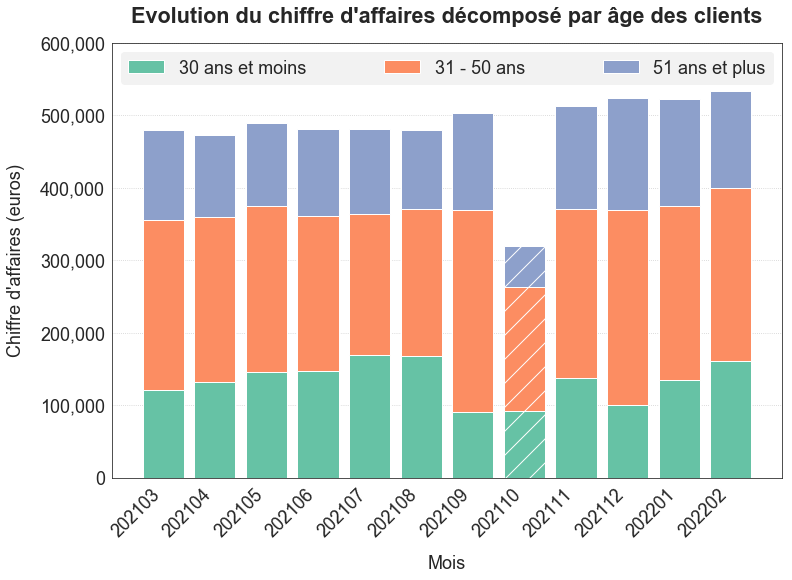

In [55]:
fig = plt.figure()
ax = plt.axes()
axbar1 = ax.bar(chiffre_affaires_age.index, height=chiffre_affaires_age.moins_de_30, label="30 ans et moins")
axbar2 = ax.bar(chiffre_affaires_age.index, height=chiffre_affaires_age.de_31_a_50, \
       bottom=chiffre_affaires_age.moins_de_30, label="31 - 50 ans")
axbar3 = ax.bar(chiffre_affaires_age.index, height=chiffre_affaires_age.plus_de_51, \
       bottom=(chiffre_affaires_age.moins_de_30 + chiffre_affaires_age.de_31_a_50), label="51 ans et plus")
axbar1[7].set_hatch('/')
axbar2[7].set_hatch('/')
axbar3[7].set_hatch('/')
ax.set_ylabel("Chiffre d'affaires (euros)")
ax.set_ylim([0,600000])
ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:,.0f}'))
ax.set_xlabel("Mois")
ax.set_xticklabels(chiffre_affaires_categorie.index, rotation = 45, ha="right")
ax.legend(loc='upper left', mode="expand", ncol=3)
ax.grid(axis="y", linestyle=":")
plt.title("Evolution du chiffre d'affaires décomposé par âge des clients")
plt.savefig("projet04_210_evolution_CA_trancheage.png")
plt.show()

La participation des différentes tranches d'âge au chiffre d'affaires total fluctue d'un mois à l'autre, mais une constante demeure : les 31-50 ans sont les principaux contributeurs à l'activité.

**Evolution dans le temps de la dispersion du montant des paniers**

Je crée maintenant des dataframes qui me permettront d'analyser éventuellement les dispersions du montant du panier, du nombre de produits dans le panier, de l'âge et de la durée moyenne de session.

In [56]:
analyse_montant_panier = panier.groupby("year_month")[["montant_panier"]].min()
analyse_montant_panier.columns = ["panier_min"]
analyse_montant_panier["panier_Q1"] = panier.groupby("year_month")["montant_panier"].quantile(0.25)
analyse_montant_panier["panier_Q2"] = panier.groupby("year_month")["montant_panier"].quantile(0.50)
analyse_montant_panier["panier_Q3"] = panier.groupby("year_month")["montant_panier"].quantile(0.75)
analyse_montant_panier["panier_max"] = panier.groupby("year_month")["montant_panier"].max()
analyse_montant_panier

panier_min  panier_Q1  panier_Q2  panier_Q3  panier_max
year_month                                                         
202103            0.97    15.6200      25.27    42.5300      385.98
202104            0.99    14.9900      25.04    42.5300      334.97
202105            0.62    14.9900      25.14    42.9800      369.99
202106            0.99    15.5900      25.84    43.0700      450.09
202107            0.81    14.9900      24.99    43.0825      458.42
202108            1.84    14.9900      24.98    42.9700      535.17
202109            0.66    15.9900      26.99    44.0450      419.90
202110            0.62    11.0600      19.08    34.5600      382.98
202111            0.97    15.9900      26.61    43.9200      539.23
202112            0.99    15.9900      26.39    43.2400      404.99
202201            0.97    16.0225      26.64    43.4975      496.22
202202            0.98    15.9900      27.27    46.9700      476.19

In [57]:
analyse_nombre_produits_panier = panier.groupby("year_month")[["nombre_produits_panier"]].min()
analyse_nombre_produits_panier.columns = ["nombre_min"]
analyse_nombre_produits_panier["nombre_Q1"] = panier.groupby("year_month")["nombre_produits_panier"].quantile(0.25)
analyse_nombre_produits_panier["nombre_Q2"] = panier.groupby("year_month")["nombre_produits_panier"].quantile(0.50)
analyse_nombre_produits_panier["nombre_Q3"] = panier.groupby("year_month")["nombre_produits_panier"].quantile(0.75)
analyse_nombre_produits_panier["nombre_max"] = panier.groupby("year_month")["nombre_produits_panier"].max()
analyse_nombre_produits_panier

nombre_min  nombre_Q1  nombre_Q2  nombre_Q3  nombre_max
year_month                                                         
202103               1        1.0        2.0        3.0          11
202104               1        1.0        2.0        3.0          13
202105               1        1.0        2.0        3.0          11
202106               1        1.0        2.0        2.0          10
202107               1        1.0        1.0        2.0          11
202108               1        1.0        1.0        2.0          10
202109               1        1.0        2.0        3.0          13
202110               1        1.0        1.0        2.0          11
202111               1        1.0        2.0        2.0          14
202112               1        1.0        2.0        3.0          11
202201               1        1.0        2.0        2.0          11
202202               1        1.0        2.0        3.0          12

In [58]:
analyse_age_panier = panier.groupby("year_month")[["client_age"]].min()
analyse_age_panier.columns = ["age_min"]
analyse_age_panier["age_Q1"] = panier.groupby("year_month")["client_age"].quantile(0.25)
analyse_age_panier["age_Q2"] = panier.groupby("year_month")["client_age"].quantile(0.50)
analyse_age_panier["age_Q3"] = panier.groupby("year_month")["client_age"].quantile(0.75)
analyse_age_panier["age_max"] = panier.groupby("year_month")["client_age"].max()
analyse_age_panier

age_min  age_Q1  age_Q2  age_Q3  age_max
year_month                                          
202103           18    36.0    44.0    55.0       93
202104           18    36.0    44.0    55.0       93
202105           18    36.0    44.0    55.0       93
202106           18    35.0    44.0    55.0       93
202107           18    34.0    43.0    55.0       93
202108           18    34.0    43.0    55.0       93
202109           18    37.0    45.0    55.0       93
202110           18    36.0    43.0    53.0       93
202111           18    36.0    44.0    56.0       93
202112           18    36.0    45.0    56.0       93
202201           18    36.0    44.0    56.0       93
202202           18    35.0    44.0    55.0       93

In [59]:
analyse_duree_session = panier[panier.nombre_produits_panier > 1].groupby("year_month")[["duree_session"]].min()
analyse_duree_session.columns = ["duree_min"]
analyse_duree_session["duree_Q1"] = panier[panier.nombre_produits_panier > 1].groupby("year_month")["duree_session"].quantile(0.25)
analyse_duree_session["duree_Q2"] = panier[panier.nombre_produits_panier > 1].groupby("year_month")["duree_session"].quantile(0.50)
analyse_duree_session["duree_Q3"] = panier[panier.nombre_produits_panier > 1].groupby("year_month")["duree_session"].quantile(0.75)
analyse_duree_session["duree_max"] = panier[panier.nombre_produits_panier > 1].groupby("year_month")["duree_session"].max()
analyse_duree_session

duree_min        duree_Q1        duree_Q2        duree_Q3  \
year_month                                                                   
202103     00:00:00.186768 00:12:16.633167 00:23:30.030002 00:36:58.421019   
202104     00:00:00.115749 00:12:58.609199 00:24:08.105359 00:36:40.094173   
202105     00:00:00.133310 00:12:43.512389 00:24:34.703226 00:37:33.174122   
202106     00:00:00.029936 00:12:18.875436 00:23:23.271480 00:36:22.360305   
202107     00:00:00.482166 00:12:19.497754 00:24:00.177923 00:38:02.181814   
202108     00:00:00.086629 00:12:26.072802 00:23:33.973374 00:37:36.445036   
202109     00:00:00.111470 00:13:10.747193 00:24:26.816392 00:36:50.953957   
202110     00:00:00.091735 00:11:56.979025 00:23:56.753773 00:35:40.598944   
202111     00:00:00.027326 00:12:06.102151 00:23:01.617998 00:36:57.801585   
202112     00:00:00.096208 00:12:21.376814 00:23:21.388522 00:36:12.769875   
202201     00:00:00.340552 00:11:47.528012 00:22:19.325257 00:36:32.997889   
202202     00:00:00.189828 00:12:32.677649 00:23:53.713651 00:37:23.505247   

                 duree_max  
year_month                  
202103     01:46:56.123302  
202104     01:53:49.949781  
202105     01:57:35.453809  
202106     01:53:05.117444  
202107     01:56:34.428726  
202108     01:51:25.012278  
202109     01:48:20.614053  
202110     01:47:23.038867  
202111     02:00:26.636453  
202112     01:48:19.266575  
202201     01:48:50.556887  
202202     02:01:10.566195

**Seul le tableau analyse_montant_panier me paraît intéressant à étudier sous forme graphique. Il permet d'analyser l'évolution dans le temps de la dispersion des paniers moyens.** Les autres tableaux ne me semblent pas procurer d'information intéressante.

In [60]:
sns.set_palette(sns.light_palette("navy"))
liste_couleurs = sns.color_palette()

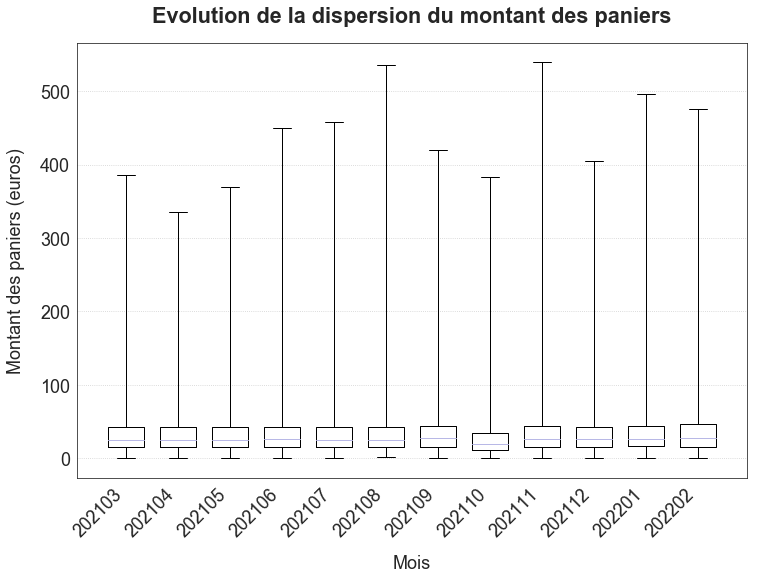

In [61]:
fig = plt.figure()
ax = plt.axes()
ax.boxplot([analyse_montant_panier.loc[nomindex] for nomindex in analyse_montant_panier.index],
            positions=np.arange(0,12,1),
            whis=20,
            showfliers=False,
            widths=0.7,
            manage_xticks=False,
            labels=analyse_montant_panier.index)
ax.set_ylabel("Montant des paniers (euros)")
ax.xaxis.set_ticks(np.arange(0, 12, 1))
ax.set_xticklabels(analyse_montant_panier.index, rotation=45, ha='right')
ax.set_xlabel("Mois")
ax.grid(axis="y", linestyle=":")
plt.title("Evolution de la dispersion du montant des paniers")
plt.show()

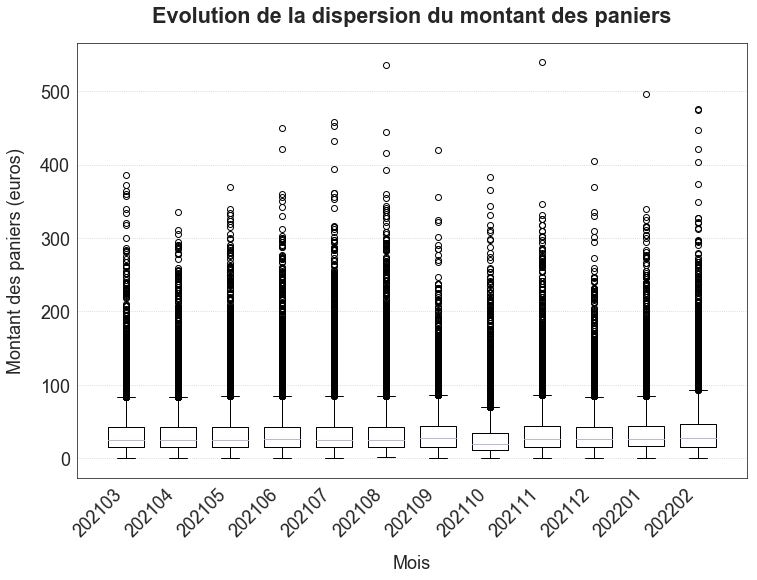

In [62]:
fig = plt.figure()
ax = plt.axes()
ax.boxplot([panier[panier.year_month == mois].montant_panier for mois in panier.year_month.unique()],
            positions=np.arange(0,12,1),
            showfliers=True,
            widths=0.7,
            manage_xticks=False,
            labels=panier.year_month.unique())
ax.set_ylabel("Montant des paniers (euros)")
ax.xaxis.set_ticks(np.arange(0, 12, 1))
ax.set_xticklabels(panier.year_month.unique(), rotation=45, ha='right')
ax.set_xlabel("Mois")
ax.grid(axis="y", linestyle=":")
plt.title("Evolution de la dispersion du montant des paniers")
plt.show()

Les prix maximums sont très élevés et déséquilibrent le graphique. Le deuxième graphique montre qu'il y a des nombreux paniers considérés comme atypiques, à cause de leur valeur élevée. Afin d'avoir un graphique plus lisible, je limite les données au quantile 95, afin de limiter les outliers et de n'afficher seulement la dispersion des 95% les moins chers des paniers.

In [63]:
analyse_montant_panier2 = analyse_montant_panier.copy()
analyse_montant_panier2["panier_max"] = panier.groupby("year_month")["montant_panier"].quantile(0.95)

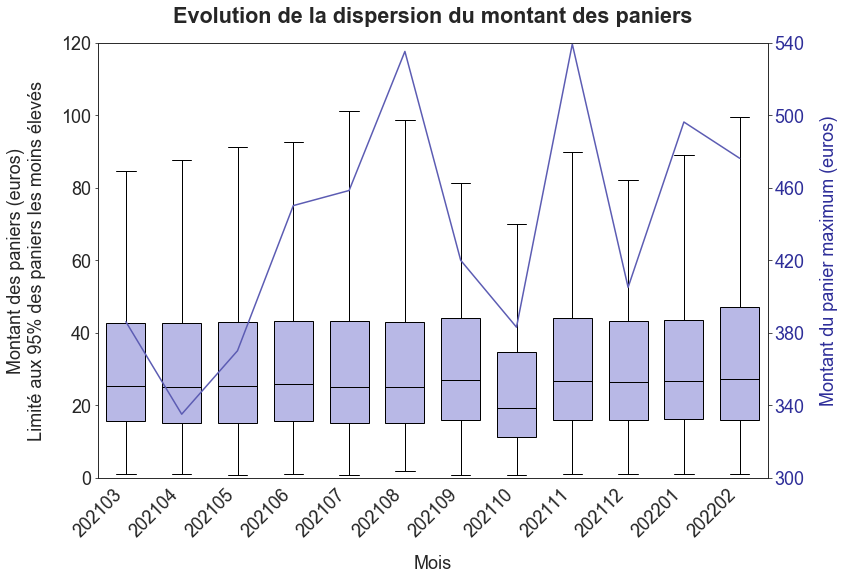

In [64]:
fig = plt.figure()
ax = plt.axes()
bplot = ax.boxplot([analyse_montant_panier2.loc[nomindex] for nomindex in analyse_montant_panier2.index],
            positions=np.arange(0,12,1),
            whis=20,
            showfliers=False,
            widths=0.7,
            patch_artist=True,
            labels=analyse_montant_panier2.index)
for patch in bplot['boxes']:
    patch.set_facecolor(liste_couleurs[1])
for patch in bplot['medians']:
    patch.set_color('black')
ax.set_ylabel("Montant des paniers (euros)\nLimité aux 95% des paniers les moins élevés")
ax.set_ylim([0,120])
ax.set_xlabel("Mois")
ax.set_xticklabels(analyse_montant_panier2.index, rotation = 45, ha="right")
ax2 = ax.twinx()
ax2.plot(analyse_montant_panier.panier_max, color=liste_couleurs[3])
ax2.set_ylabel("Montant du panier maximum (euros)", color=liste_couleurs[4])
ax2.set_ylim([300,540])
ax2.yaxis.set_ticks(np.arange(300, 541, 40))
ax2.set_yticklabels(np.arange(300, 541, 40), color=liste_couleurs[4])
ax1.grid(axis="y", linestyle=":")
plt.title("Evolution de la dispersion du montant des paniers")
plt.show()

L'affichage du montant maximum sous la forme d'une ligne surcharge le graphique et le rend un peu illisible. Je décide de l'enlever.

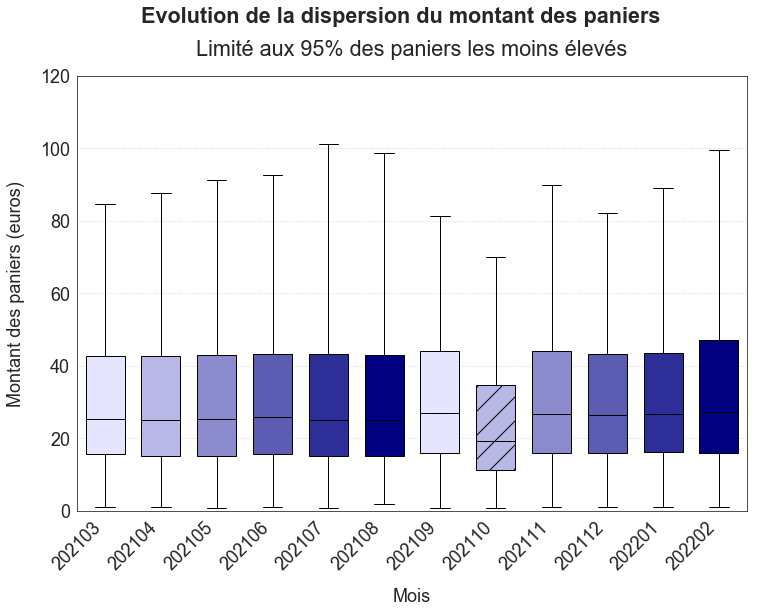

In [65]:
fig = plt.figure()
ax = plt.axes()
bplot = ax.boxplot([analyse_montant_panier2.loc[nomindex] for nomindex in analyse_montant_panier2.index],
            positions=np.arange(0,12,1),
            whis=20,
            showfliers=False,
            widths=0.7,
            patch_artist=True,
            labels=analyse_montant_panier2.index)
cpt=-1
for patch in bplot['boxes']:
    cpt+=1
    colorindex = cpt%6
    patch.set_facecolor(liste_couleurs[colorindex])
    if cpt==7:
        patch.set_hatch('/')
for patch in bplot['medians']:
    patch.set_color('black')
ax.set_ylabel("Montant des paniers (euros)")
ax.set_ylim([0,120])
ax.grid(axis="y", linestyle=":")
ax.set_xlabel("Mois")
ax.set_xticklabels(analyse_montant_panier2.index, rotation = 45, ha="right")
plt.suptitle("Evolution de la dispersion du montant des paniers", y=1.0)
plt.title("Limité aux 95% des paniers les moins élevés", fontweight='regular')
plt.savefig("projet04_211_evolution_dispersion_paniers.png")
plt.show()

La dispersion du montant des paniers est importante, notamment vers les valeurs les plus élevées, et reste stable dans le temps.

### 2.4 Analyse des ventes par jour de la semaine

Je prépare un dataframe qui permet d'analyser les paniers en fonction du jour d'achat, pour voir si le jour d'achat détermine des comportements spécifiques. Je calcule les moyennes mensuelles de ces données, pour pouvoir comparer facilement avec et sans le mois d'octobre 2021.

In [66]:
panier = panier_clean[panier_clean.year_month!="202110"]

In [67]:
analyse_jour = panier.groupby("day_of_week")[["montant_panier","nombre_produits_panier"]].sum() / 11.0
analyse_jour.columns = ["chiffre_affaires","nombre_produits_vendus"]
analyse_jour["prix_moyen_produit"] = analyse_jour.chiffre_affaires / \
                                                analyse_jour.nombre_produits_vendus
analyse_jour["nombre_ventes"] = panier.groupby("day_of_week")["session_id"].count() / 11.0
analyse_jour["panier_moyen"] = analyse_jour.chiffre_affaires / analyse_jour.nombre_ventes
analyse_jour["nombre_moyen_produits"] = analyse_jour.nombre_produits_vendus / \
                                                analyse_jour.nombre_ventes
analyse_jour["age_moyen"] = panier.groupby("day_of_week")["client_age"].mean()
analyse_jour["duree_moyenne_session"] = panier[panier.nombre_produits_panier > 1].\
                                    groupby("day_of_week")["duree_session"].mean(numeric_only=False)
reorderlist = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
analyse_jour = analyse_jour.reindex(reorderlist)
analyse_jour

chiffre_affaires  nombre_produits_vendus  prix_moyen_produit  \
day_of_week                                                                 
Monday           73307.112727             4210.272727           17.411488   
Tuesday          71646.468182             4106.363636           17.447668   
Wednesday        71080.102727             4120.818182           17.249027   
Thursday         71758.092727             4144.454545           17.314243   
Friday           70594.782727             4033.727273           17.501129   
Saturday         69766.772727             4016.000000           17.372204   
Sunday           69884.714545             4025.818182           17.359133   

             nombre_ventes  panier_moyen  nombre_moyen_produits  age_moyen  \
day_of_week                                                                  
Monday         2099.363636     34.918730               2.005500  45.926731   
Tuesday        2062.363636     34.739978               1.991096  45.925152   
Wednesday      2053.363636     34.616422               2.006862  46.169301   
Thursday       2064.545455     34.757332               2.007442  45.738133   
Friday         2028.272727     34.805370               1.988750  45.915199   
Saturday       2007.636364     34.750702               2.000362  46.050942   
Sunday         2015.818182     34.668164               1.997114  45.943492   

            duree_moyenne_session  
day_of_week                        
Monday            00:26:21.801164  
Tuesday           00:26:13.261836  
Wednesday         00:26:38.392123  
Thursday          00:26:11.965543  
Friday            00:25:56.471449  
Saturday          00:26:32.559289  
Sunday            00:26:09.852408

Le seul changement notable en fonction des jours est le chiffre d'affaires, lié essentiellement à une variation du nombre de ventes. **Cela peut être utile de faire un graphique du chiffre d'affaires en fonction du jour de la semaine.**

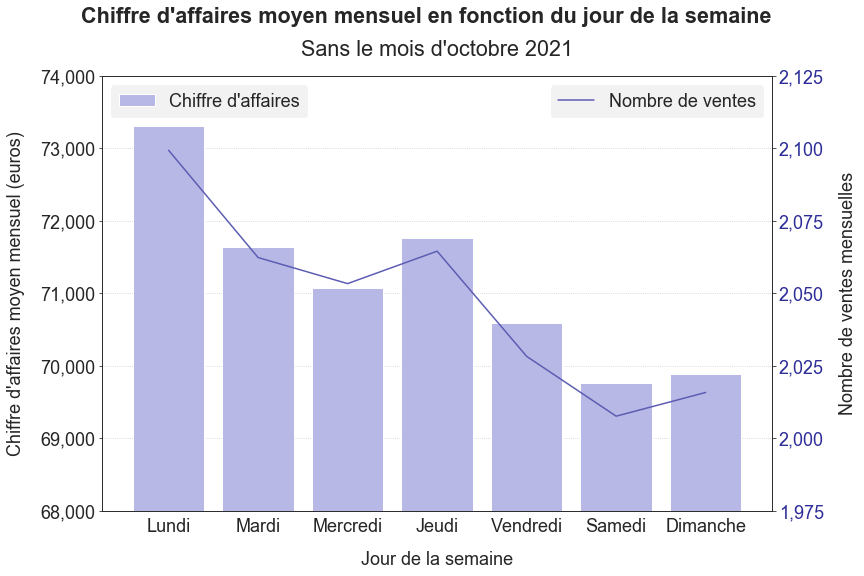

In [68]:
fig = plt.figure()
ax1 = plt.axes()
ax1.bar(analyse_jour.index, analyse_jour.chiffre_affaires, label="Chiffre d'affaires", color=liste_couleurs[1])
ax1.set_ylabel("Chiffre d'affaires moyen mensuel (euros)")
ax1.set_ylim([68000,74000])
ax1.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:,.0f}'))
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot(analyse_jour.index, analyse_jour.nombre_ventes, label="Nombre de ventes", color=liste_couleurs[3])
ax2.set_ylabel("Nombre de ventes mensuelles")
ax2.set_ylim([1975,2125])
ax2.yaxis.set_ticks(np.arange(1975, 2126, 25))
ax2.set_yticklabels(np.arange(1975, 2126, 25), color=liste_couleurs[4])
ax2.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:,.0f}'))
ax2.legend(loc='upper right')
ax1.set_xlabel("Jour de la semaine")
ax1.set_xticklabels(["Lundi","Mardi","Mercredi","Jeudi","Vendredi","Samedi","Dimanche"])
ax1.grid(axis="y", linestyle=":")
plt.suptitle("Chiffre d'affaires moyen mensuel en fonction du jour de la semaine", y=1.0)
plt.title("Sans le mois d'octobre 2021", fontweight='regular')
plt.savefig("projet04_212b_CA_jour.png")
plt.show()

Le lundi est le jour le plus propice à l'activité, que ce soit en chiffre d'affaires ou en nombre de ventes, alors que le week-end est la période la plus calme.

In [69]:
panier = panier_clean.copy()

In [70]:
analyse_jour = panier.groupby("day_of_week")[["montant_panier","nombre_produits_panier"]].sum() / 12.0
analyse_jour.columns = ["chiffre_affaires","nombre_produits_vendus"]
analyse_jour["prix_moyen_produit"] = analyse_jour.chiffre_affaires / \
                                                analyse_jour.nombre_produits_vendus
analyse_jour["nombre_ventes"] = panier.groupby("day_of_week")["session_id"].count() / 12.0
analyse_jour["panier_moyen"] = analyse_jour.chiffre_affaires / analyse_jour.nombre_ventes
analyse_jour["nombre_moyen_produits"] = analyse_jour.nombre_produits_vendus / \
                                                analyse_jour.nombre_ventes
analyse_jour["age_moyen"] = panier.groupby("day_of_week")["client_age"].mean()
analyse_jour["duree_moyenne_session"] = panier[panier.nombre_produits_panier > 1].\
                                    groupby("day_of_week")["duree_session"].mean(numeric_only=False)
reorderlist = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
analyse_jour = analyse_jour.reindex(reorderlist)
analyse_jour

chiffre_affaires  nombre_produits_vendus  prix_moyen_produit  \
day_of_week                                                                 
Monday           70246.881667             4072.166667           17.250493   
Tuesday          68615.470833             3972.666667           17.271892   
Wednesday        68307.223333             3992.500000           17.108885   
Thursday         69279.560000             4034.083333           17.173557   
Friday           69785.874167             4029.583333           17.318385   
Saturday         68382.993333             3981.833333           17.173746   
Sunday           68518.724167             3985.166667           17.193440   

             nombre_ventes  panier_moyen  nombre_moyen_produits  age_moyen  \
day_of_week                                                                  
Monday         2043.250000     34.379974               1.992985  45.846364   
Tuesday        2007.583333     34.178143               1.978830  45.818854   
Wednesday      1998.416667     34.180671               1.997832  46.036904   
Thursday       2015.333333     34.376229               2.001695  45.695253   
Friday         2031.666667     34.349077               1.983388  45.900984   
Saturday       1998.416667     34.218586               1.992494  45.935574   
Sunday         2004.833333     34.176768               1.987780  45.847203   

            duree_moyenne_session  
day_of_week                        
Monday            00:26:15.772296  
Tuesday           00:26:10.514755  
Wednesday         00:26:37.010548  
Thursday          00:26:08.090926  
Friday            00:25:55.793516  
Saturday          00:26:29.517083  
Sunday            00:26:03.424109

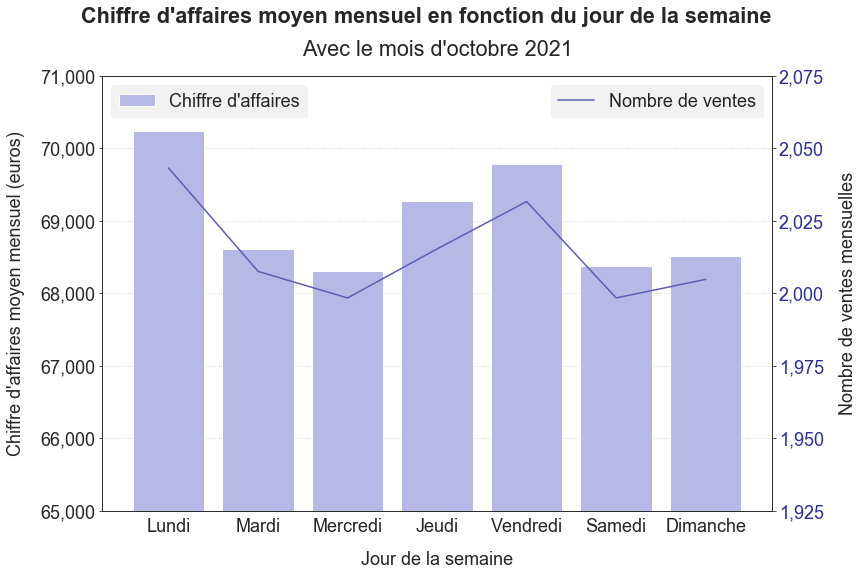

In [71]:
fig = plt.figure()
ax1 = plt.axes()
ax1.bar(analyse_jour.index, analyse_jour.chiffre_affaires, label="Chiffre d'affaires", color=liste_couleurs[1])
ax1.set_ylabel("Chiffre d'affaires moyen mensuel (euros)")
ax1.set_ylim([65000,71000])
ax1.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:,.0f}'))
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot(analyse_jour.index, analyse_jour.nombre_ventes, label="Nombre de ventes", color=liste_couleurs[3])
ax2.set_ylabel("Nombre de ventes mensuelles")
ax2.set_ylim([1925,2075])
ax2.yaxis.set_ticks(np.arange(1925, 2076, 25))
ax2.set_yticklabels(np.arange(1925, 2076, 25), color=liste_couleurs[4])
ax2.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:,.0f}'))
ax2.legend(loc='upper right')
ax1.set_xlabel("Jour de la semaine")
ax1.set_xticklabels(["Lundi","Mardi","Mercredi","Jeudi","Vendredi","Samedi","Dimanche"])
ax1.grid(axis="y", linestyle=":")
plt.suptitle("Chiffre d'affaires moyen mensuel en fonction du jour de la semaine", y=1.0)
plt.title("Avec le mois d'octobre 2021", fontweight='regular')
plt.savefig("projet04_212a_CA_jour.png")
plt.show()

Cette différence dans la répartition du chiffre d'affaires entre les jours de la semaine en incluant ou non les ventes du mois d'octobre 2021 s'explique par les données manquantes dans ce mois. Pour les produits de catégorie 1, nous n'avons les données que pour le 1er, et du 28 au 31 octobre 2021. Soit 1 jeudi, 2 vendredi, 1 samedi et 1 dimanche. Cela explique que les jours de fin de semaine soient mieux représentés en incluant le mois d'octobre.

## 2.5 Analyse du chiffre d'affaires par catégorie

Je compare la répartition par catégorie des produits au sein du catalogue avec la répartition par catégorie du chiffre d'affaires et du nombre de ventes.

In [72]:
panier = panier_clean.copy()

In [73]:
comparaison_categorie = pd.DataFrame([[produits[produits.categ == 0].price.count(), data[data.categ == 0].price.sum(), \
                                data[data.categ == 0].session_id.nunique()], [produits[produits.categ == 1].price.count(), \
                                data[data.categ == 1].price.sum(), data[data.categ == 1].session_id.nunique()], 
                                [produits[produits.categ == 2].price.count(), data[data.categ == 2].price.sum(), \
                                data[data.categ == 2].session_id.nunique()]], \
                                index=["categ_0","categ_1","categ_2"], columns=["nombre_clients","chiffre_affaires","nombre_ventes"])
comparaison_categorie.loc["total"] = comparaison_categorie.loc[:].sum()
comparaison_categorie.iloc[0:3] = comparaison_categorie.iloc[0:3] / comparaison_categorie.loc["total"]
comparaison_categorie

nombre_clients  chiffre_affaires  nombre_ventes
categ_0        0.702464      3.847747e-01       0.527759
categ_1        0.224825      3.876378e-01       0.403462
categ_2        0.072711      2.275875e-01       0.068780
total       3287.000000      5.797641e+06  214060.000000

In [74]:
sns.set_style("white")
sns.set_palette("Set2")
liste_couleurs = sns.color_palette()

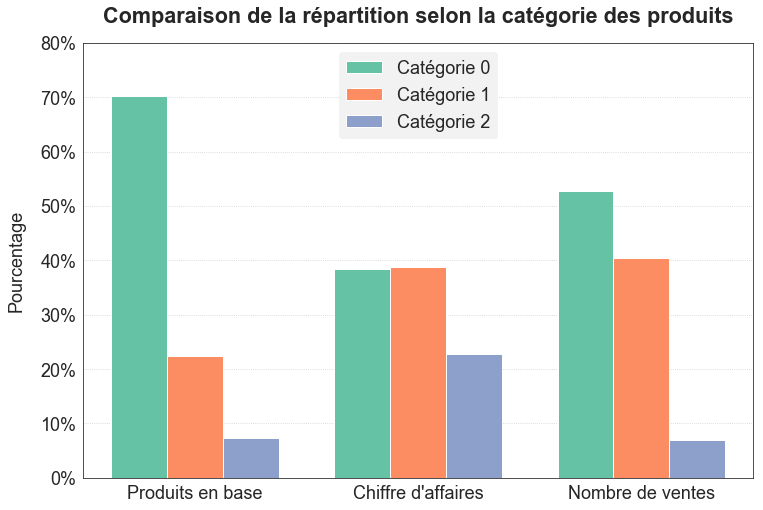

In [75]:
fig = plt.figure()
ax = plt.axes()
ax.bar(np.arange(1,4) - 0.25, comparaison_categorie.loc["categ_0"], label="Catégorie 0", color=liste_couleurs[0], width=0.25)
ax.bar(np.arange(1,4), comparaison_categorie.loc["categ_1"], label="Catégorie 1", color=liste_couleurs[1], width=0.25)
ax.bar(np.arange(1,4) + 0.25, comparaison_categorie.loc["categ_2"], label="Catégorie 2", color=liste_couleurs[2], width=0.25)
ax.set_ylabel("Pourcentage")
ax.set_ylim([0,0.8])
ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:.0%}'))
ax.set_xlim([0.5,3.5])
ax.xaxis.set_ticks(np.arange(1, 4))
ax.xaxis.set_ticklabels(["Produits en base","Chiffre d'affaires","Nombre de ventes"])
ax.grid(axis="y", linestyle=":")
ax.legend(loc='upper center')
plt.title("Comparaison de la répartition selon la catégorie des produits")
plt.savefig("projet04_213_comparaison_repart_categ.png")
plt.show()

Alors que les produits de la catégorie 0 sont largement majoritaires dans la base de produits (70%), ils représentent moins de 40% du chiffre d'affaires. Les produits de la catégorie 1 sont les plus forts contributeurs au chiffre d'affaires. Le prix élevé des produits de la catégorie 2 se ressent dans ce graphique : alors qu'ils représentent moins de 10% du nombre de produits et du nombre de ventes, leur contribution au chiffre d'affaires dépasse 20%.

In [76]:
c = data.pivot_table(values="price", index="sex", columns="categ", aggfunc=sum)
c = c / 12
c.columns=["categ_0","categ_1","categ_2"]
c

categ_0       categ_1       categ_2
sex                                          
f    92007.097500  94821.374167  51483.275833
m    93891.703333  92460.660000  58472.616667

In [77]:
sns.set_style("whitegrid")

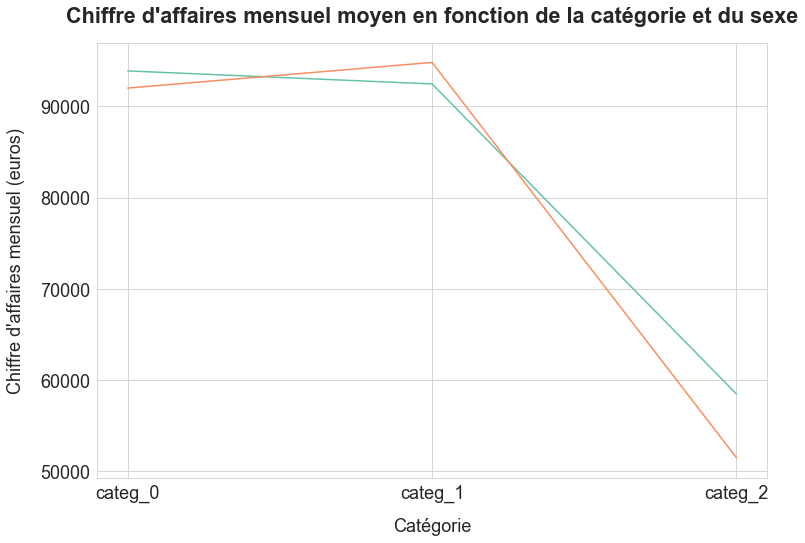

In [78]:
fig = plt.figure()
ax = plt.axes()
ax.plot(c.columns, c.loc["m",:])
ax.plot(c.columns, c.loc["f",:])
ax.set_xlabel("Catégorie")
ax.set_ylabel("Chiffre d'affaires mensuel (euros)")
plt.title("Chiffre d'affaires mensuel moyen en fonction de la catégorie et du sexe")
plt.show()

Ce graphique ne présente pas d'intérêt particulier.

## 2.6 Analyse du chiffre d'affaires en fonction du prix des produits

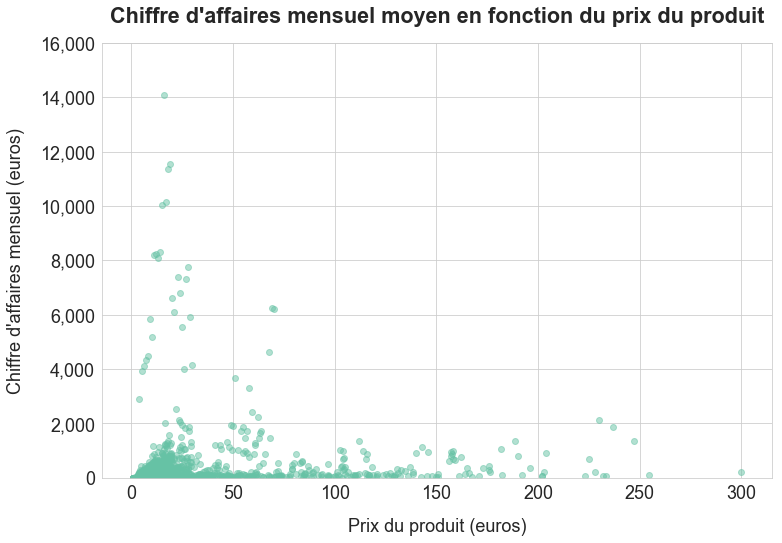

In [79]:
temp1 = data[["price","price"]]
temp1.columns = ["price","CA"]
temp2 = temp1.groupby("price").sum() / 12
fig = plt.figure()
ax = plt.axes()
ax.plot(temp2.index, temp2.CA,'o',alpha=0.5)
ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylim([0,16000])
ax.set_ylabel("Chiffre d'affaires mensuel (euros)")
ax.set_xlabel("Prix du produit (euros)")
plt.title("Chiffre d'affaires mensuel moyen en fonction du prix du produit")
plt.show()

Je trouve que ce graphique n'est pas interprétable facilement. Je génère le même graphique mais en discriminant selon la catégorie du produit.

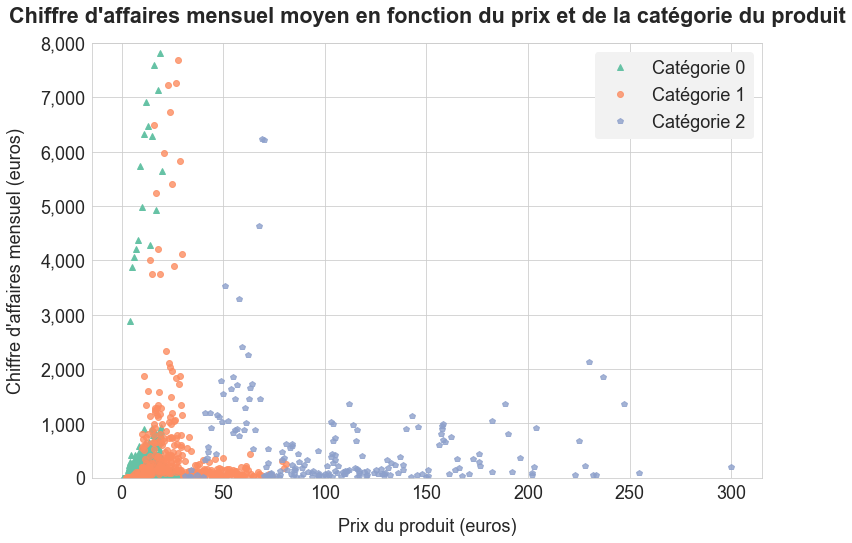

In [80]:
temp1 = data[["price","categ","price"]]
temp1.columns = ["price","categ","CA"]
temp = temp1.groupby(["price","categ"]).sum() / 12
temp = temp.reset_index()
fig = plt.figure()
ax = plt.axes()
ax.plot(temp[temp.categ==0].price, temp[temp.categ==0].CA,'^',alpha=1,label="Catégorie 0")
ax.plot(temp[temp.categ==1].price, temp[temp.categ==1].CA,'o',alpha=0.8,label="Catégorie 1")
ax.plot(temp[temp.categ==2].price, temp[temp.categ==2].CA,'p',alpha=0.8,label="Catégorie 2")
ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylim([0,8000])
ax.set_ylabel("Chiffre d'affaires mensuel (euros)")
ax.set_xlabel("Prix du produit (euros)")
ax.legend(loc='upper right')
plt.title("Chiffre d'affaires mensuel moyen en fonction du prix et de la catégorie du produit")
plt.show()

L'information commence à être plus lisible. Afin de gagner encore en lisibilité, je vais regrouper les produits par tranche de prix.

In [81]:
temp1 = data[["price","categ","price"]]
temp1.columns = ["price","categ","CA"]
temp1["price"] = pd.cut(temp1["price"], np.append(np.arange(0,101,5), np.arange(120,301,20))).astype(str)
temp = temp1.groupby(["price","categ"]).sum() / 12
temp = temp.dropna().reset_index()
temp["inter"] = temp.price.str.split(",", 1)
temp["sortcol"] = temp.inter.str[0].str.slice(1).astype(int)
temp.drop(columns="inter", inplace=True)
temp.sort_values(by="sortcol", inplace=True)

C:\Anaconda3\envs\Jupyter\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [82]:
sns.set_style("whitegrid", {"xtick.bottom": True})

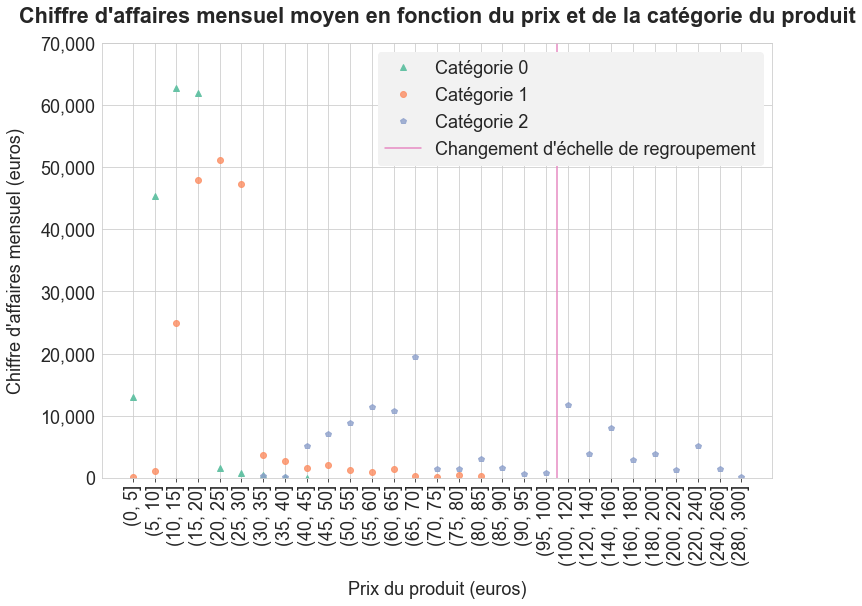

In [83]:
fig = plt.figure()
ax = plt.axes()
ax.plot(temp[temp.categ==0].price, temp[temp.categ==0].CA,'^',alpha=1,label="Catégorie 0")
ax.plot(temp[temp.categ==1].price, temp[temp.categ==1].CA,'o',alpha=0.8,label="Catégorie 1")
ax.plot(temp[temp.categ==2].price, temp[temp.categ==2].CA,'p',alpha=0.8,label="Catégorie 2")
ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylim([0,70000])
ax.set_ylabel("Chiffre d'affaires mensuel (euros)")
ax.set_xlabel("Prix du produit (euros)")
ax.set_xticklabels(temp.price.unique(), rotation = 90, ha="center")
ax.axvline(x=19.5, color=liste_couleurs[3], label="Changement d'échelle de regroupement")
ax.legend(loc='upper right')
plt.title("Chiffre d'affaires mensuel moyen en fonction du prix et de la catégorie du produit")
plt.savefig("projet04_214_CA_prix_categorie.png")
plt.show()

On remarque que les produits de moins de 30 euros (tous en catégories 0 et 1) sont les plus gros contributeurs au chiffre d'affaires, suivis des produits de catégorie 3 dont le prix est compris entre 50 et 70 euros.

## 2.7 Analyse du chiffre d'affaires par sexe

In [84]:
temp = data.groupby("sex")[["price"]]
analyse_sexe = temp.sum()
analyse_sexe.columns = ["chiffre_affaires"]
analyse_sexe["nombre_ventes"] = data.groupby("sex")["session_id"].nunique()
analyse_sexe["nombre_produits_vendus"] = temp.size()
analyse_sexe["panier_moyen"] = analyse_sexe["chiffre_affaires"] / analyse_sexe["nombre_ventes"]
analyse_sexe["nombre_moyen_produits_panier"] = analyse_sexe["nombre_produits_vendus"] / analyse_sexe["nombre_ventes"]
analyse_sexe["prix_moyen_produits_panier"] = analyse_sexe["chiffre_affaires"] / analyse_sexe["nombre_produits_vendus"]
analyse_sexe

chiffre_affaires  nombre_ventes  nombre_produits_vendus  panier_moyen  \
sex                                                                          
f        2.859741e+06          83638                  167575     34.191886   
m        2.937900e+06          85556                  169241     34.338910   

     nombre_moyen_produits_panier  prix_moyen_produits_panier  
sex                                                            
f                        2.003575                   17.065439  
m                        1.978131                   17.359267

Je ne remarque pas d'information intéressante dans ce tableau. Mais je vais tracer un graphique qui va comparer la répartition des clients par sexe d'une part, et le chiffre d'affaires et le nombre de ventes par sexe d'autre part.

In [85]:
comparaison_sexe = pd.DataFrame([[clients[clients.sex == "f"].sex.count(), data[data.sex == "f"].price.sum(), \
                                data[data.sex == "f"].session_id.nunique()], [clients[clients.sex == "m"].sex.count(), \
                                data[data.sex == "m"].price.sum(), data[data.sex == "m"].session_id.nunique()]], \
                                index=["f","m"], columns=["nombre_clients","chiffre_affaires","nombre_ventes"])
comparaison_sexe.loc["total"] = comparaison_sexe.loc["f"] + comparaison_sexe.loc["m"]
comparaison_sexe.loc["f":"m"] = comparaison_sexe.loc["f":"m"] / comparaison_sexe.loc["total"]
comparaison_sexe

nombre_clients  chiffre_affaires  nombre_ventes
f            0.520821      4.932594e-01       0.494332
m            0.479179      5.067406e-01       0.505668
total     8621.000000      5.797641e+06  169194.000000

In [86]:
sns.set_style("white")

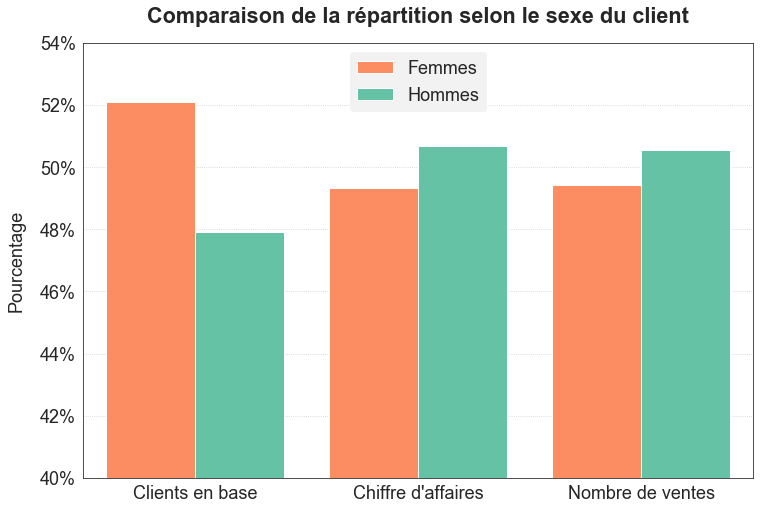

In [87]:
fig = plt.figure()
ax = plt.axes()
ax.bar(np.arange(1,4) - 0.2, comparaison_sexe.loc["f"], label="Femmes", color=liste_couleurs[1], width=0.4)
ax.bar(np.arange(1,4) + 0.2, comparaison_sexe.loc["m"], label="Hommes", color=liste_couleurs[0], width=0.4)
ax.set_ylabel("Pourcentage")
ax.set_ylim([0.4,0.54])
ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:.0%}'))
ax.set_xlim([0.5,3.5])
ax.xaxis.set_ticks(np.arange(1, 4))
ax.xaxis.set_ticklabels(["Clients en base","Chiffre d'affaires","Nombre de ventes"])
ax.grid(axis="y", linestyle=":")
ax.legend(loc='upper center')
plt.title("Comparaison de la répartition selon le sexe du client")
plt.savefig("projet04_215_comparaison_repart_sex.png")
plt.show()

Alors que le nombre de femmes est supérieur au nombre d'hommes parmi les clients, les hommes achètent plus et contribuent plus au chiffre d'affaires.

### 2.8 Analyse du chiffre d'affaires par âge

Analysons maintenant le chiffre d'affaires par tranche d'âge (les tranches d'âge ont été raffinées après l'analyse du panier moyen par âge).

Je commence par comparer la répartition des clients par tranche d'âge avec la répartition du chiffre d'affaires et du nombre de ventes par tranche d'âge.

In [88]:
temp = pd.cut(clients.age.sort_values(), [15,30,50,95]).unique()
ages = np.zeros((3, 2))
for cpt in range(0,3):
    ages[cpt] = (temp[cpt].left + 1, temp[cpt].right)
comparaison_age = pd.DataFrame([[clients[clients.age.between(ages[0,0],ages[0,1])].client_id.count(), \
                    data[data.client_age.between(ages[0,0],ages[0,1])].price.sum(), data[data.client_age.between(ages[0,0],ages[0,1])].session_id.nunique()], \
                    [clients[clients.age.between(ages[1,0],ages[1,1])].client_id.count(), \
                    data[data.client_age.between(ages[1,0],ages[1,1])].price.sum(), data[data.client_age.between(ages[1,0],ages[1,1])].session_id.nunique()],
                    [clients[clients.age.between(ages[2,0],ages[2,1])].client_id.count(), \
                    data[data.client_age.between(ages[2,0],ages[2,1])].price.sum(), data[data.client_age.between(ages[2,0],ages[2,1])].session_id.nunique()]], \
                        index=["30_ans_moins","31_50ans","51_ans_plus"], columns=["nombre_clients","chiffre_affaires","nombre_ventes"])
comparaison_age.loc["total"] = comparaison_age.loc[:].sum()
comparaison_age.iloc[0:3] = comparaison_age.iloc[0:3] / comparaison_age.loc["total"]
comparaison_age

nombre_clients  chiffre_affaires  nombre_ventes
30_ans_moins        0.264470      2.757331e-01       0.132954
31_50ans            0.390442      4.709156e-01       0.512648
51_ans_plus         0.345088      2.533513e-01       0.354398
total            8621.000000      5.797641e+06  169194.000000

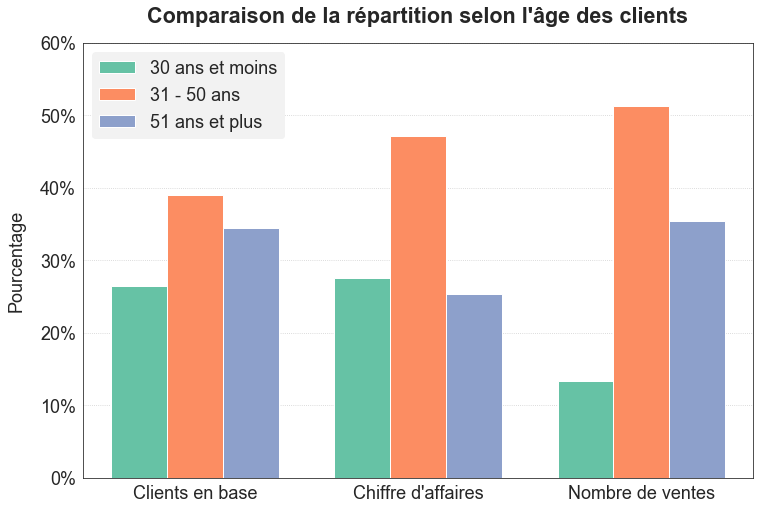

In [89]:
fig = plt.figure()
ax = plt.axes()
ax.bar(np.arange(1,4) - 0.25, comparaison_age.loc["30_ans_moins"], label="30 ans et moins", color=liste_couleurs[0], width=0.25)
ax.bar(np.arange(1,4), comparaison_age.loc["31_50ans"], label="31 - 50 ans", color=liste_couleurs[1], width=0.25)
ax.bar(np.arange(1,4) + 0.25, comparaison_age.loc["51_ans_plus"], label="51 ans et plus", color=liste_couleurs[2], width=0.25)
ax.set_ylabel("Pourcentage")
ax.set_ylim([0,0.6])
ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:.0%}'))
ax.set_xlim([0.5,3.5])
ax.xaxis.set_ticks(np.arange(1, 4))
ax.xaxis.set_ticklabels(["Clients en base","Chiffre d'affaires","Nombre de ventes"])
ax.grid(axis="y", linestyle=":")
ax.legend(loc='upper left')
plt.title("Comparaison de la répartition selon l'âge des clients")
plt.savefig("projet04_216_comparaison_repart_trancheage.png")
plt.show()

Proportionnellement à la répartition des clients dans la base de clientèle, les clients entre 31 et 50 ans achètent souvent et contribuent fortement au chiffre d'affaires. Les moins de 30 ans achètent peu souvent. Les plus de 50 ans contribuent moins au chiffre d'affaires.

Je réalise une discrétisation par tranches d'âge. Comme l'âge des clients va de 18 ans à 93 ans, soit une amplitude de 75 ans, je choisis de discrétiser en 5 tranches de 15 ans.

In [90]:
temp = data.groupby(pd.cut(data["client_age"], 5))[["price"]]
analyse_age = temp.sum() / 12.0
analyse_age.columns = ["chiffre_affaires"]
analyse_age["nombre_ventes"] = data.groupby(pd.cut(data["client_age"], 5))["session_id"].nunique() / 12.0
analyse_age["nombre_produits_vendus"] = temp.size() / 12.0
analyse_age["panier_moyen"] = analyse_age["chiffre_affaires"] / analyse_age["nombre_ventes"]
analyse_age["nombre_moyen_produits_panier"] = analyse_age["nombre_produits_vendus"] / analyse_age["nombre_ventes"]
analyse_age["prix_moyen_produits_panier"] = analyse_age["chiffre_affaires"] / analyse_age["nombre_produits_vendus"]
analyse_age

chiffre_affaires  nombre_ventes  nombre_produits_vendus  \
client_age                                                                
(17.925, 33.0]     161034.422500        2755.75             5371.916667   
(33.0, 48.0]       181974.657500        5794.25            13962.000000   
(48.0, 63.0]        93516.939167        3616.25             5920.833333   
(63.0, 78.0]        37782.099167        1571.25             2282.083333   
(78.0, 93.0]         8828.609167         362.00              531.166667   

                panier_moyen  nombre_moyen_produits_panier  \
client_age                                                   
(17.925, 33.0]     58.435788                      1.949348   
(33.0, 48.0]       31.406076                      2.409630   
(48.0, 63.0]       25.860197                      1.637285   
(63.0, 78.0]       24.045887                      1.452400   
(78.0, 93.0]       24.388423                      1.467311   

                prix_moyen_produits_panier  
client_age                                  
(17.925, 33.0]                   29.977089  
(33.0, 48.0]                     13.033567  
(48.0, 63.0]                     15.794557  
(63.0, 78.0]                     16.555968  
(78.0, 93.0]                     16.621166

In [91]:
sns.set_palette(sns.light_palette("navy"))
liste_couleurs = sns.color_palette()

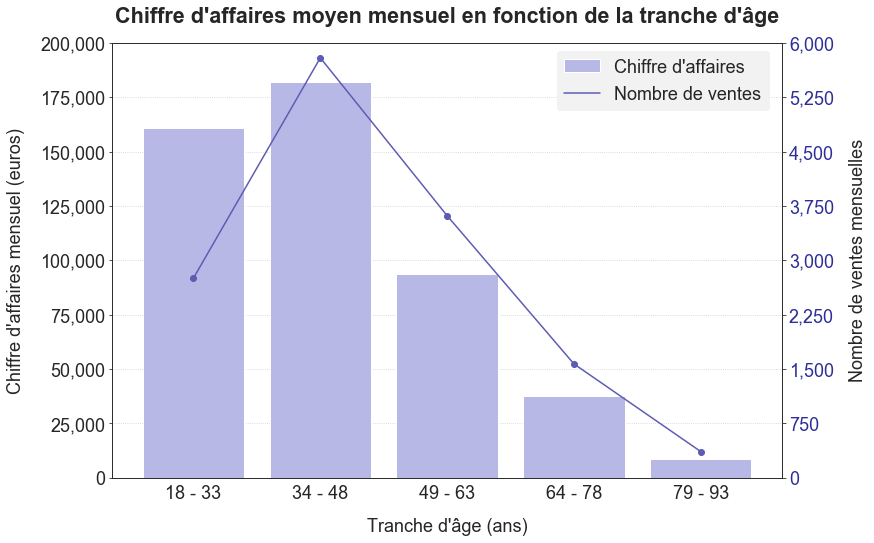

In [92]:
analyse_age.index = analyse_age.index.astype(str)
fig = plt.figure()
ax1 = plt.axes()
ax1.bar(analyse_age.index, analyse_age.chiffre_affaires, label="Chiffre d'affaires", color=liste_couleurs[1])
ax1.set_ylabel("Chiffre d'affaires mensuel (euros)")
ax1.set_ylim([0,200000])
ax1.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:,.0f}'))
ax2 = ax1.twinx()
ax2.plot(analyse_age.index, analyse_age.nombre_ventes, label="Nombre de ventes", color=liste_couleurs[3])
ax2.scatter(analyse_age.index, analyse_age.nombre_ventes, marker='o', label=str(), color=liste_couleurs[3])
ax2.set_ylabel("Nombre de ventes mensuelles")
ax2.set_ylim([0, 6000])
ax2.yaxis.set_ticks(np.arange(0, 6001, 750))
ax2.set_yticklabels(np.arange(0, 6001, 750), color=liste_couleurs[4])
ax2.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:,.0f}'))
ax1.set_xlabel("Tranche d'âge (ans)")
ax1.set_xticklabels(["18 - 33","34 - 48","49 - 63","64 - 78","79 - 93"])
ax1.grid(axis="y", linestyle=":")
fig.legend(loc='upper right', bbox_to_anchor=(0.9,0.87))
plt.title("Chiffre d'affaires moyen mensuel en fonction de la tranche d'âge")
plt.savefig("projet04_217_CA_trancheage1.png")
plt.show()

Le chiffre d'affaires mensuel est le plus élevé sur la tranche d'âge 34-48 ans. Il diminue fortement à partir de 49 ans.

In [93]:
temp = data.groupby(["sex",pd.cut(data["client_age"], 5)])[["price"]]
sexe_age_chiffre_affaires = temp.sum().unstack() / 12
sexe_age_chiffre_affaires.columns = ["18 - 33","34 - 48","49 - 63","64 - 78","79 - 93"]
sexe_age_chiffre_affaires

18 - 33       34 - 48       49 - 63       64 - 78      79 - 93
sex                                                                   
f    76072.1825  87633.055833  49052.090000  20571.674167  4982.745000
m    84962.2400  94341.601667  44464.849167  17210.425000  3845.864167

In [94]:
sexe_age_nombre_produits_vendus = temp.size() / 12
sexe_age_nombre_produits_vendus = sexe_age_nombre_produits_vendus.unstack()
sexe_age_nombre_produits_vendus.columns = ["18 - 33","34 - 48","49 - 63","64 - 78","79 - 93"]
sexe_age_nombre_produits_vendus

18 - 33  34 - 48      49 - 63      64 - 78     79 - 93
sex                                                            
f    2614.250000  6700.25  3107.833333  1246.083333  296.166667
m    2757.666667  7261.75  2813.000000  1036.000000  235.000000

In [95]:
sns.set_palette("Set2")
liste_couleurs = sns.color_palette()

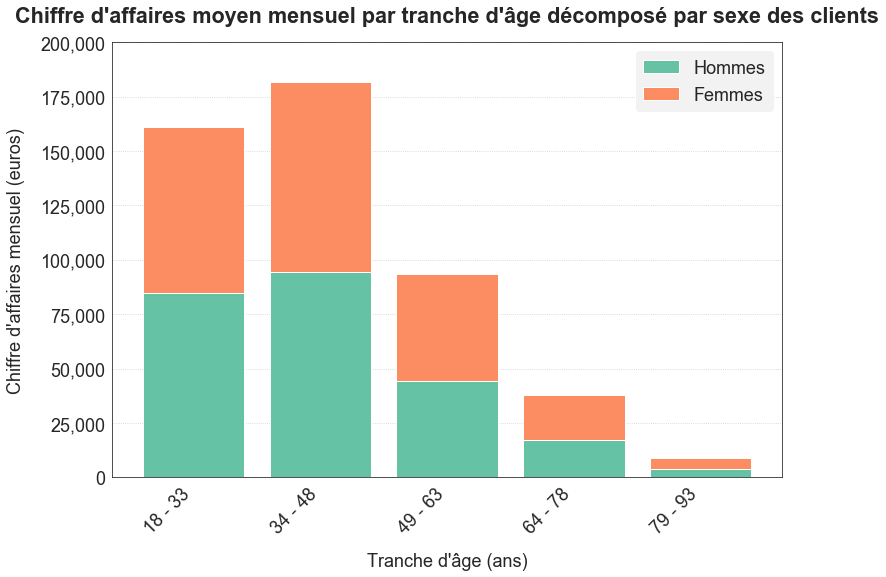

In [96]:
fig = plt.figure()
ax = plt.axes()
ax.bar(sexe_age_chiffre_affaires.columns, height=sexe_age_chiffre_affaires.iloc[1], label="Hommes")
ax.bar(sexe_age_chiffre_affaires.columns, height=sexe_age_chiffre_affaires.iloc[0], \
       bottom=sexe_age_chiffre_affaires.iloc[1], label="Femmes")
ax.set_ylabel("Chiffre d'affaires mensuel (euros)")
ax.set_ylim([0,200000])
ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:,.0f}'))
ax.set_xlabel("Tranche d'âge (ans)")
ax.set_xticklabels(sexe_age_chiffre_affaires.columns, rotation = 45, ha="right")
ax.legend(loc='upper right')
ax.grid(axis="y", linestyle=":")
plt.title("Chiffre d'affaires moyen mensuel par tranche d'âge décomposé par sexe des clients")
plt.show()

Je trouve que ce graphique n'apporte pas beaucoup d'informations supplémentaires facilement interprétables. Je préfère conserver seulement le premier graphique sans la discrimination par sexe mais avec le nombre de ventes.

In [97]:
sns.set_palette(sns.light_palette("navy"))
liste_couleurs = sns.color_palette()

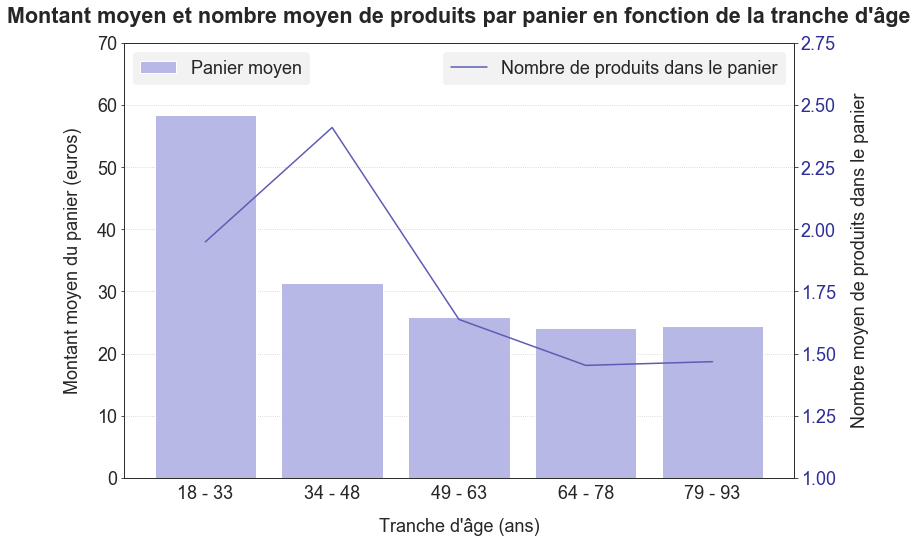

In [98]:
analyse_age.index = analyse_age.index.astype(str)
fig = plt.figure()
ax1 = plt.axes()
ax1.bar(analyse_age.index, analyse_age.panier_moyen, label="Panier moyen", color=liste_couleurs[1])
ax1.set_ylabel("Montant moyen du panier (euros)")
ax1.set_ylim([0,70])
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot(analyse_age.index, analyse_age.nombre_moyen_produits_panier, label="Nombre de produits dans le panier", color=liste_couleurs[3])
ax2.set_ylabel("Nombre moyen de produits dans le panier")
ax2.yaxis.set_ticks(np.arange(1.0, 2.76, 0.25))
ax2.set_yticklabels(np.arange(1.0, 2.76, 0.25), color=liste_couleurs[4])
ax2.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:,.2f}'))
ax2.legend(loc='upper right')
ax1.set_xlabel("Tranche d'âge (ans)")
ax1.set_xticklabels(["18 - 33","34 - 48","49 - 63","64 - 78","79 - 93"])
ax1.grid(axis="y", linestyle=":")
plt.title("Montant moyen et nombre moyen de produits par panier en fonction de la tranche d'âge")
plt.savefig("projet04_218_paniermoyen_trancheage.png")
plt.show()

Le panier moyen diminue avec l'âge. Les 18-33 ans présentent un panier moyen très supérieur aux autres, bien que le nombre moyen de produits dans leur panier ne soit pas très élevé.

In [99]:
sns.set_style("whitegrid")
sns.set_palette("Set2")
liste_couleurs = sns.color_palette()

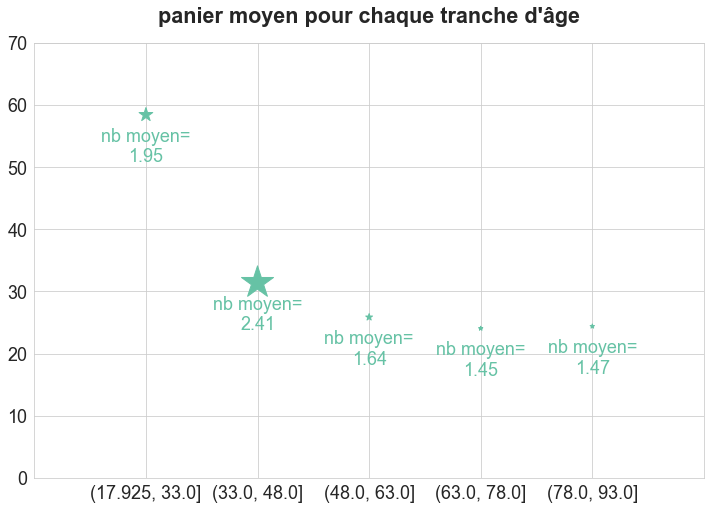

In [100]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(analyse_age.index, analyse_age.panier_moyen,s=(analyse_age.nombre_moyen_produits_panier)**8, marker='*',alpha=1)
ax.set_ylim([0,70])
ax.set_xlim([-1,5])
cpt = -1
for cat in analyse_age.index:  # affichage des effectifs de chaque classe
    cpt+=1
    plt.text(cpt,analyse_age[analyse_age.index==cat].panier_moyen-2,"nb moyen=\n{:.2f}".format(analyse_age[analyse_age.index==cat].nombre_moyen_produits_panier[0]),horizontalalignment='center',verticalalignment='top',color=liste_couleurs[0])
plt.title("panier moyen pour chaque tranche d'âge")
plt.show()

Ce graphique est trop compliqué à comprendre à première vue. Je préfère m'en tenir à la présentation plus standard du graphique précédent.

Je regarde s'il y a des graphiques intéressants à tirer des données par tranches d'âge décomposées par sexe.

In [101]:
sexe_age_nombre_ventes = data.groupby(["sex",pd.cut(data["client_age"], 5)])[["session_id"]].nunique().unstack() / 12
sexe_age_nombre_ventes.columns = ["18 - 33","34 - 48","49 - 63","64 - 78","79 - 93"]
sexe_age_nombre_ventes

18 - 33      34 - 48  49 - 63     64 - 78     79 - 93
sex                                                           
f    1326.916667  2767.333333  1808.50  865.666667  201.416667
m    1428.833333  3026.916667  1807.75  705.583333  160.583333

In [102]:
sexe_age_panier_moyen = sexe_age_chiffre_affaires / sexe_age_nombre_ventes
sexe_age_panier_moyen

18 - 33    34 - 48    49 - 63    64 - 78    79 - 93
sex                                                       
f    57.330038  31.666968  27.123080  23.763967  24.738494
m    59.462667  31.167558  24.596791  24.391768  23.949336

In [103]:
sexe_age_nombre_moyen_produits = sexe_age_nombre_produits_vendus / sexe_age_nombre_ventes
sexe_age_nombre_moyen_produits

18 - 33   34 - 48   49 - 63   64 - 78   79 - 93
sex                                                  
f    1.970169  2.421194  1.718459  1.439449  1.470418
m    1.930013  2.399058  1.556078  1.468289  1.463415

In [104]:
sexe_age_prix_moyen_produits = sexe_age_chiffre_affaires / sexe_age_nombre_produits_vendus
sexe_age_prix_moyen_produits

18 - 33    34 - 48    49 - 63    64 - 78    79 - 93
sex                                                       
f    29.099047  13.079073  15.783372  16.509068  16.824125
m    30.809467  12.991579  15.806914  16.612379  16.365379

A la vue des données en fonction des tranches d'âge, je pense qu'il est intéressant de faire les graphiques par âge du chiffre d'affaires, du panier moyen, et peut-être du nombre de moyen de produits dans le panier et du prix moyen des produits dans le panier.

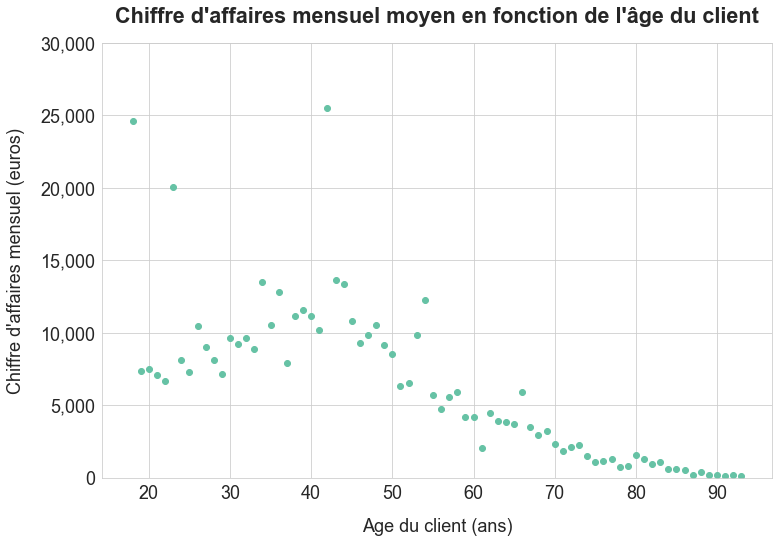

In [105]:
temp = panier[["client_age","montant_panier"]].groupby("client_age").sum() /12
fig = plt.figure()
ax = plt.axes()
ax.plot(temp.index, temp.montant_panier,'o',alpha=1)
ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylabel("Chiffre d'affaires mensuel (euros)")
ax.set_ylim([0,30000])
ax.set_xlabel("Age du client (ans)")
plt.title("Chiffre d'affaires mensuel moyen en fonction de l'âge du client")
plt.savefig("projet04_219_CAmensuel_age.png")
plt.show()

Le chiffre d'affaires semble diminuer avec l'âge. Cette observation est particulièrement vraie à partir de 40 ans. Avant 40 ans, la dispersion des données complique la lecture du graphique. Il y a quelques valeurs élevées, mais les autres valeurs montrent une augmentation du chiffre d'affaires avec l'âge jusqu'à 40 ans.

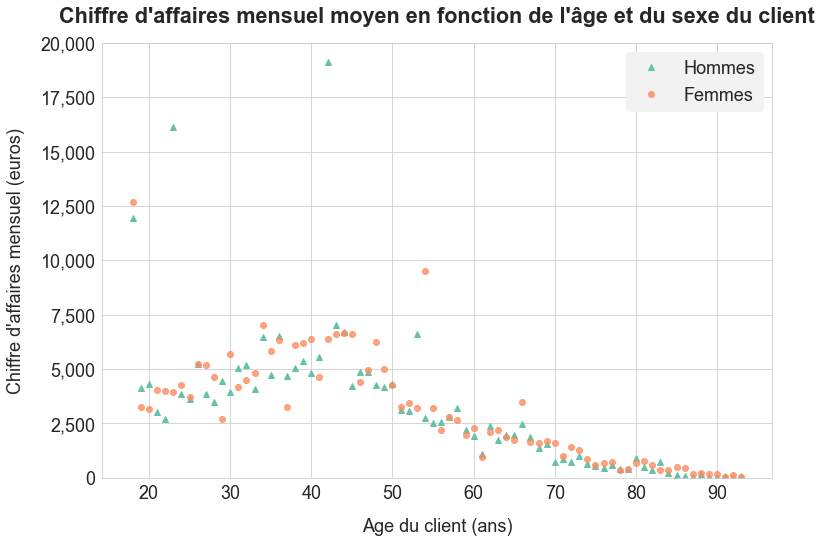

In [106]:
temp = panier[["client_age","sex","montant_panier"]].groupby(["client_age","sex"]).sum() / 12
temp.reset_index(inplace=True)
fig = plt.figure()
ax = plt.axes()
ax.plot(temp[temp.sex=="m"].client_age, temp[temp.sex=="m"].montant_panier,'^',alpha=1,label="Hommes")
ax.plot(temp[temp.sex=="f"].client_age, temp[temp.sex=="f"].montant_panier,'o',alpha=0.8,label="Femmes")
ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylabel("Chiffre d'affaires mensuel (euros)")
ax.set_ylim([0,20000])
ax.set_xlabel("Age du client (ans)")
ax.legend(loc='upper right')
plt.title("Chiffre d'affaires mensuel moyen en fonction de l'âge et du sexe du client")
plt.savefig("projet04_220_CAmensuel_age_sexe.png")
plt.show()

Le chiffre d'affaires mensuel moyen dépend essentiellement de l'âge des clients, pas de leur sexe.

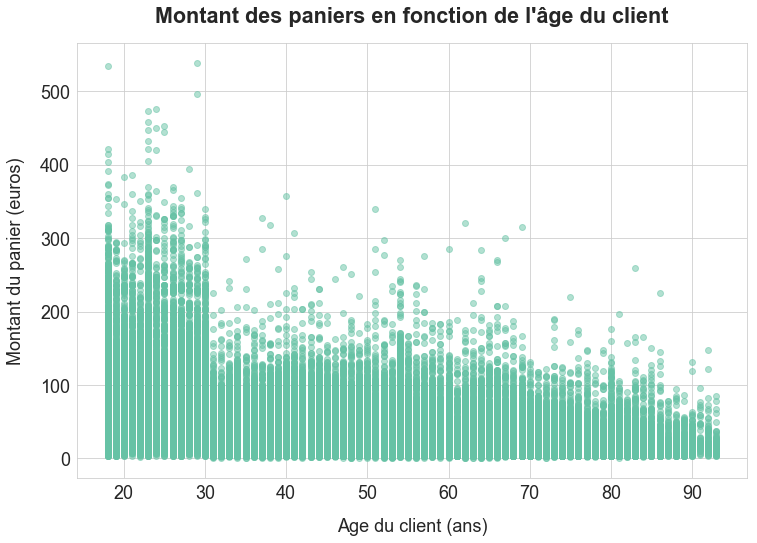

In [107]:
fig = plt.figure()
ax = plt.axes()
ax.plot(panier.client_age, panier.montant_panier,'o',alpha=0.5)
ax.set_ylabel("Montant du panier (euros)")
ax.set_xlabel("Age du client (ans)")
plt.title("Montant des paniers en fonction de l'âge du client")
plt.show()

Malgré son aspect artistique, ce graphique n'est pas très parlant. Je regroupe les informations par âge.

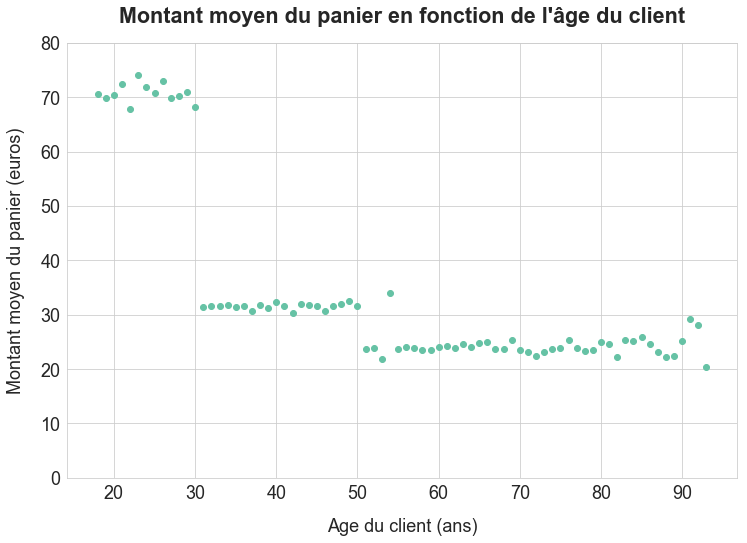

In [108]:
temp = panier[["client_age","montant_panier"]].groupby("client_age").mean()
fig = plt.figure()
ax = plt.axes()
ax.plot(temp.index, temp.montant_panier,'o',alpha=1)
ax.set_ylabel("Montant moyen du panier (euros)")
ax.set_ylim([0,80])
ax.set_xlabel("Age du client (ans)")
plt.title("Montant moyen du panier en fonction de l'âge du client")
plt.savefig("projet04_221_montantpanier_age.png")
plt.show()

On remarque trois groupes de clients : les moins de 30 ans ont un panier moyen d'environ 70 euros, ceux entre 31 et 50 ans un panier moyen d'environ 32 euros, et ceux de plus de 51 ans un panier moyen d'environ 25 euros.

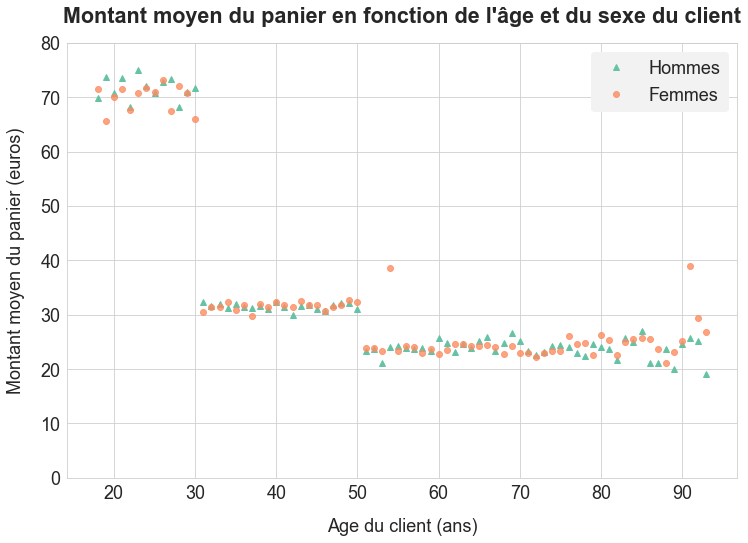

In [109]:
temp = panier[["client_age","sex","montant_panier"]].groupby(["client_age","sex"]).mean().reset_index()
fig = plt.figure()
ax = plt.axes()
ax.plot(temp[temp.sex=="m"].client_age, temp[temp.sex=="m"].montant_panier,'^',alpha=1,label="Hommes")
ax.plot(temp[temp.sex=="f"].client_age, temp[temp.sex=="f"].montant_panier,'o',alpha=0.8,label="Femmes")
ax.set_ylabel("Montant moyen du panier (euros)")
ax.set_ylim([0,80])
ax.set_xlabel("Age du client (ans)")
ax.legend(loc='upper right')
plt.title("Montant moyen du panier en fonction de l'âge et du sexe du client")
plt.savefig("projet04_222_montantpanier_age_sexe.png")
plt.show()

Le montant moyen des paniers ne dépend que de l'âge des clients, pas de leur sexe.

J'étudie maintenant le nombre de produits vendus en fonction de l'âge du client et de la catégorie des produits, puis le CA mensuel moyen selon les mêmes critères.

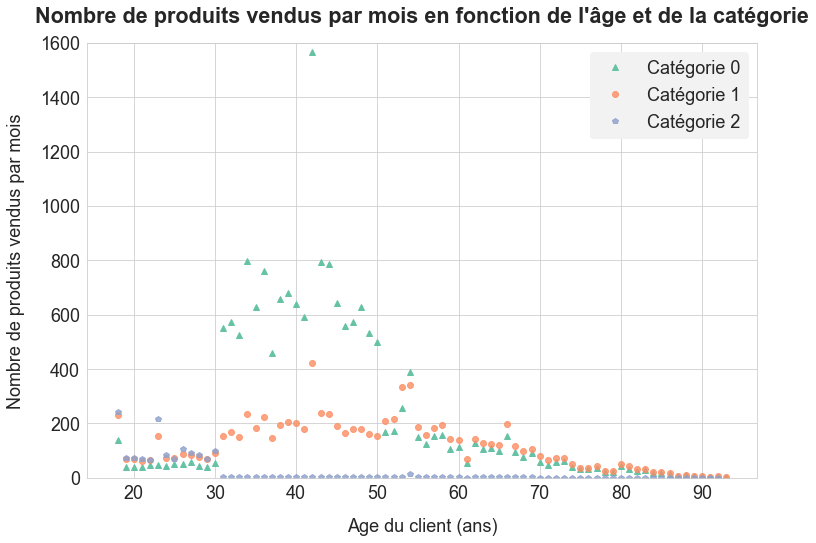

In [110]:
c = data[["client_age","categ"]].pivot_table(index="client_age", columns="categ", aggfunc=len)
c = c / 12
c.columns=["categ_0","categ_1","categ_2"]
fig = plt.figure()
ax = plt.axes()
ax.plot(c.index, c.categ_0,'^',alpha=1, label="Catégorie 0")
ax.plot(c.index, c.categ_1,'o',alpha=0.8, label="Catégorie 1")
ax.plot(c.index, c.categ_2,'p',alpha=0.8, label="Catégorie 2")
ax.set_ylabel("Nombre de produits vendus par mois")
ax.set_ylim([0,1600])
ax.set_xlabel("Age du client (ans)")
ax.legend(loc='upper right')
plt.title("Nombre de produits vendus par mois en fonction de l'âge et de la catégorie")
plt.show()

Je pense que la proportion de biens vendus par catégorie pour chaque âge sera plus parlante. Je change les données de mon tableau croisé dynamique pour obtenir le % du total de chaque ligne.

In [111]:
# je transforme les données pour les avoir en pourcentage, ligne par ligne (une ligne = 1 âge)
for lin,row in c.iterrows():
    total = c.loc[lin,:].sum()
    c.loc[lin,:] = c.loc[lin,:] / total

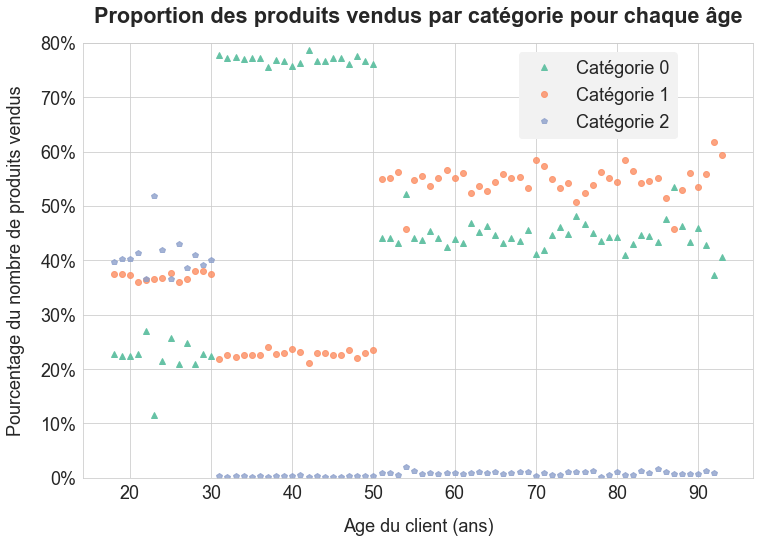

In [112]:
fig = plt.figure()
ax = plt.axes()
ax.plot(c.index, c.categ_0,'^',alpha=1, label="Catégorie 0")
ax.plot(c.index, c.categ_1,'o',alpha=0.8, label="Catégorie 1")
ax.plot(c.index, c.categ_2,'p',alpha=0.8, label="Catégorie 2")
ax.set_ylabel("Pourcentage du nombre de produits vendus")
ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:.0%}'))
ax.set_ylim([0,0.8])
ax.set_xlabel("Age du client (ans)")
ax.legend(loc='upper right', bbox_to_anchor=(0.9,1))
plt.title("Proportion des produits vendus par catégorie pour chaque âge")
plt.savefig("projet04_223_ventes_categorie_age.png")
plt.show()

Les clients de moins de 30 ans achètent essentiellement des produits de catégories 1 et 2 (environ 40% de chaque). Ce sont eux qui achètent proportionnellement le moins de produits de catégorie 0 (autour de 20%).  
Les clients entre 31 et 50 ans achètent très majoritairement (environ 75%) des produits de la catégorie 0, 24% de produits de la catégorie 1 et très peu de produits de la catégorie 2.  
Les produits de la catégorie 1 représentent plus de la moitié des produits commandés par les plus de 51 ans (environ 56%), suivis des produits de la catégorie 0 (environ 42%). Ils achètent peu de produits de la catégorie 2.

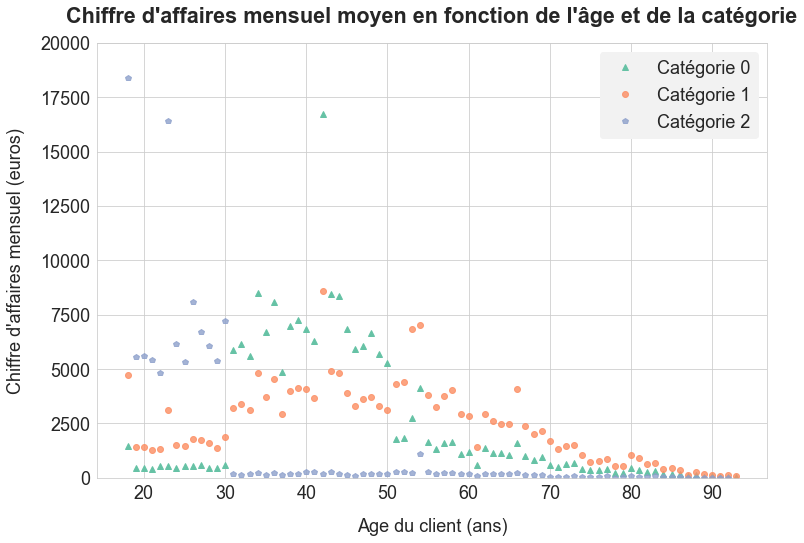

In [113]:
c = data.pivot_table(values="price", index="client_age", columns="categ", aggfunc=sum)
c = c / 12
c.columns=["categ_0","categ_1","categ_2"]
fig = plt.figure()
ax = plt.axes()
ax.plot(c.index, c.categ_0,'^',alpha=1, label="Catégorie 0")
ax.plot(c.index, c.categ_1,'o',alpha=0.8, label="Catégorie 1")
ax.plot(c.index, c.categ_2,'p',alpha=0.8, label="Catégorie 2")
ax.set_ylabel("Chiffre d'affaires mensuel (euros)")
ax.set_ylim([0,20000])
ax.set_xlabel("Age du client (ans)")
ax.legend(loc='upper right')
plt.title("Chiffre d'affaires mensuel moyen en fonction de l'âge et de la catégorie")
plt.show()

Encore une fois, les proportions apportées par chaque catégorie de produits au chiffre d'affaires de chaque âge devraient être plus lisibles.

In [114]:
# je transforme les données pour les avoir en pourcentage, ligne par ligne (une ligne = 1 âge)
for lin,row in c.iterrows():
    total = c.loc[lin,:].sum()
    c.loc[lin,:] = c.loc[lin,:] / total

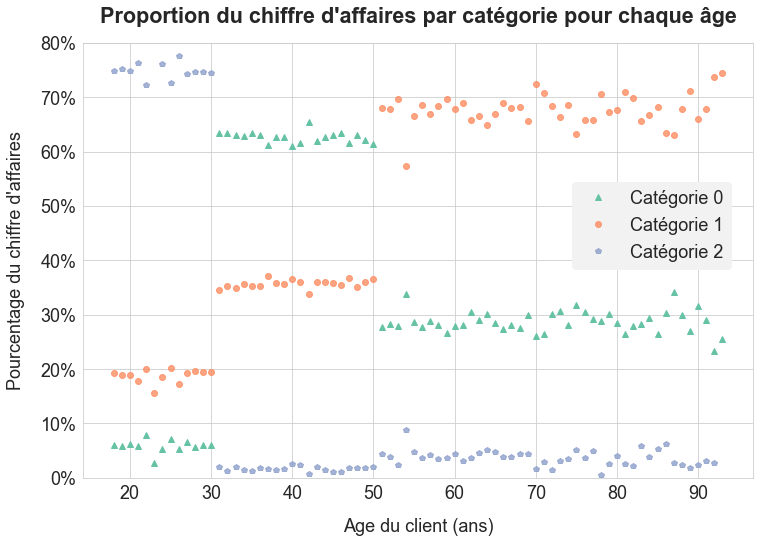

In [115]:
fig = plt.figure()
ax = plt.axes()
ax.plot(c.index, c.categ_0,'^',alpha=1, label="Catégorie 0")
ax.plot(c.index, c.categ_1,'o',alpha=0.8, label="Catégorie 1")
ax.plot(c.index, c.categ_2,'p',alpha=0.8, label="Catégorie 2")
ax.set_ylabel("Pourcentage du chiffre d'affaires")
ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:.0%}'))
ax.set_ylim([0,0.8])
ax.set_xlabel("Age du client (ans)")
ax.legend(loc='upper right', bbox_to_anchor=(0.98,0.7))
plt.title("Proportion du chiffre d'affaires par catégorie pour chaque âge")
plt.savefig("projet04_224_CA_categorie_age.png")
plt.show()

Les 3 classes d'âge sont encore plus lisibles avec les contributions des catégories au chiffre d'affaires par âge.  
Le chiffre d'affaires des moins de 30 ans provient à environ 75% des produits de catégorie 2.  
Celui des clients entre 31 et 50 ans provient majoritairement, un peu plus de 60%, des produits de catégorie 0.  
Les produits de la catégorie 1 représentent un peu moins de 70% du chiffre d'affaires réalisé par les clients de plus de 51 ans. 

Ces deux graphiques me font me poser une question : le prix des articles achetés est-il lié à l'âge des clients, de manière encore plus forte que les catégories ?  
En effet, il se peut que les moins de 30 ans achètent essentiellement des produits de catégorie 1 avec un prix élevé. A l'inverse, il se peut que les 31 à 50 ans achètent essentiellement les produits de catégorie 1 avec les prix les moins élevés.  
Je réalise cette analyse en partageant mes produits en trois classes de prix. Pour ce faire, j'analyse le graphique ci-dessous.

In [116]:
sns.set_style("white")

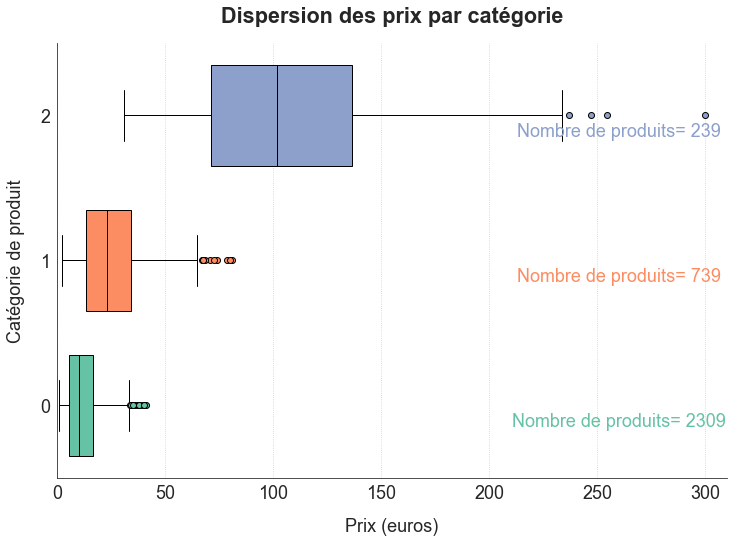

In [117]:
fig = plt.figure()
ax = plt.axes()

valeurs = []
for cat in np.arange(3):
    valeurs.append(produits[produits.categ == cat].price)
bplot = ax.boxplot([valeurs[cat] for cat in np.arange(3)], # affichage des boxplots
            positions= [1,2,3], # abscisses des boxplots
            showfliers=True, # on ne prend pas en compte les outliers
            widths= 0.7, # largeur graphique des boxplots
            vert=False,
            patch_artist = True,
            manage_xticks= False)
cpt=-1
for patch in bplot['boxes']:
    cpt+=1
    patch.set_facecolor(liste_couleurs[cpt])
cpt=-1
for patch in bplot['fliers']:
    cpt+=1
    patch.set_markerfacecolor(liste_couleurs[cpt])
for patch in bplot['medians']:
    patch.set_color('black')

for cat in np.arange(3):  # affichage des effectifs de chaque classe
    plt.text(260,cat+0.95,"Nombre de produits= {}".format(produits[produits.categ == cat].categ.count()),horizontalalignment='center',verticalalignment='top',color=liste_couleurs[cat])

ax.set_xlabel("Prix (euros)")
ax.set_ylabel("Catégorie de produit")
ax.set_xlim([0,310])
ax.set_ylim([0.5,3.5])
ax.yaxis.set_ticks(np.arange(1, 3.01, 1))
ax.set_yticklabels(["0","1","2"])
ax.grid(axis='x', linestyle=':')
plt.title("Dispersion des prix par catégorie")
sns.despine()
plt.show()

Je décide d'utiliser les quartiles de prix de la catégorie 1 pour effectuer mes regroupements. J'ajoute une colonne à mon dataframe data.  
J'utilise comme bornes de prix 0, le premier quartile des prix de la catégorie 1, le troisième quartile de la catégorie 1, et 300 euros. Ainsi, je regroupe ensemble les produits des catégories 0 et 1 avec les prix les moins élevés, le coeur des produits de catégorie 1 avec les produits de catégorie 0 aux prix les plus élevés et quelques produits de la catégorie 2, et enfin les produits les plus chers des catégories 0 et 1 avec les produits de la catégorie 2.

In [118]:
data["tranche_prix"] = pd.cut(data.price, [0, produits[produits.categ == 1].price.quantile(0.25), \
                            produits[produits.categ == 1].price.quantile(0.75), 300])
data["regroup_prix"] = pd.IntervalIndex(data.tranche_prix).left
data["tranche_prix"].sort_values().unique()

[(0.0, 13.39], (13.39, 33.99], (33.99, 300.0]]
Categories (3, interval[float64]): [(0.0, 13.39] < (13.39, 33.99] < (33.99, 300.0]]

In [119]:
c = data[["client_age","regroup_prix"]].pivot_table(index="client_age", columns="regroup_prix", aggfunc=len)
for lin,row in c.iterrows():
    total = c.loc[lin,:].sum()
    c.loc[lin,:] = c.loc[lin,:] / total
c.head()

regroup_prix     0.00      13.39     33.99
client_age                                
18            0.220196  0.372618  0.407186
19            0.213107  0.375344  0.411549
20            0.204586  0.383543  0.411871
21            0.207677  0.372539  0.419783
22            0.249655  0.375632  0.374713

In [120]:
sns.set_style("whitegrid")

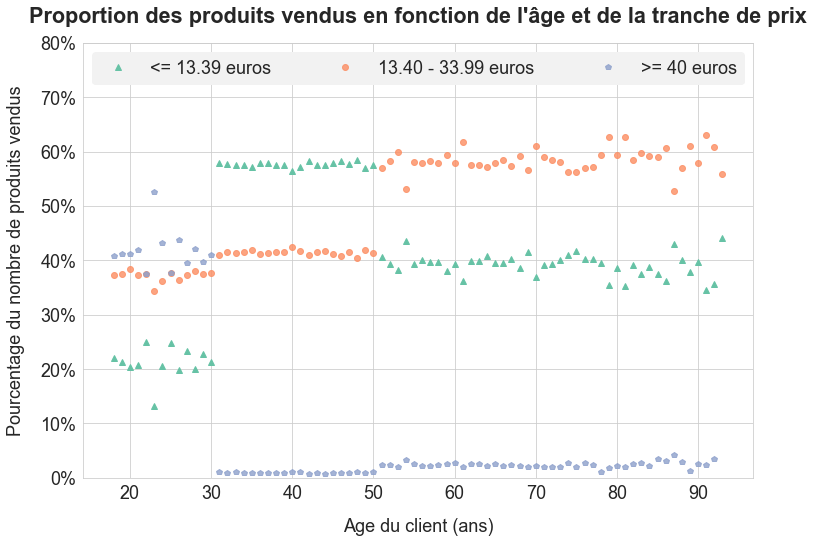

In [121]:
fig = plt.figure()
ax = plt.axes()
ax.plot(c.index, c[0.0],'^',alpha=1, label="<= 13.39 euros")
ax.plot(c.index, c[13.39],'o',alpha=0.8, label="13.40 - 33.99 euros")
ax.plot(c.index, c[33.99],'p',alpha=0.8, label=">= 40 euros")
ax.set_ylabel("Pourcentage du nombre de produits vendus")
ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:.0%}'))
ax.set_ylim([0,0.80])
ax.set_xlabel("Age du client (ans)")
ax.legend(loc='upper left', mode="expand", ncol=3)
plt.title("Proportion des produits vendus en fonction de l'âge et de la tranche de prix")
plt.show()

In [122]:
c = data.pivot_table(values="price", index="client_age", columns="regroup_prix", aggfunc=sum)
for lin,row in c.iterrows():
    total = c.loc[lin,:].sum()
    c.loc[lin,:] = c.loc[lin,:] / total
c.head()

regroup_prix     0.00      13.39     33.99
client_age                                
18            0.048581  0.192010  0.759410
19            0.046314  0.189896  0.763790
20            0.045209  0.195532  0.759259
21            0.044668  0.184767  0.770565
22            0.060067  0.207833  0.732100

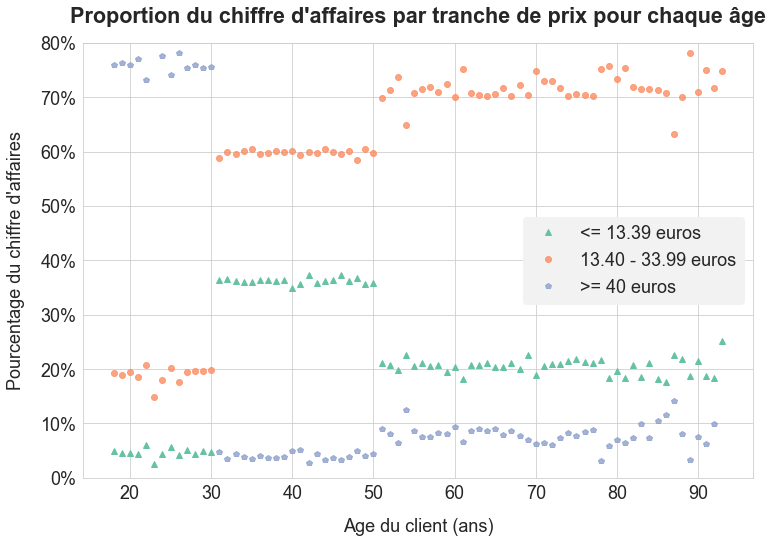

In [123]:
fig = plt.figure()
ax = plt.axes()
ax.plot(c.index, c[0.0],'^',alpha=1, label="<= 13.39 euros")
ax.plot(c.index, c[13.39],'o',alpha=0.8, label="13.40 - 33.99 euros")
ax.plot(c.index, c[33.99],'p',alpha=0.8, label=">= 40 euros")
ax.set_ylabel("Pourcentage du chiffre d'affaires")
ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:.0%}'))
ax.set_ylim([0,0.8])
ax.set_xlabel("Age du client (ans)")
ax.legend(loc='center right')
plt.title("Proportion du chiffre d'affaires par tranche de prix pour chaque âge")
plt.show()

La discrimination avec ces bornes n'est pas très concluante : elle est moins parlante qu'avec les catégories. Je fais un deuxième et dernier essai en utilisant comme bornes de prix 0, le troisième quartie de la catégorie 0, le troisième quartile de la catégorie 1, et 300 euros.

In [124]:
data["tranche_prix"] = pd.cut(data.price, [0, produits[produits.categ == 0].price.quantile(0.75), \
                            produits[produits.categ == 1].price.quantile(0.75), 300])
data["regroup_prix"] = pd.IntervalIndex(data.tranche_prix).left
data["tranche_prix"].sort_values().unique()

[(0.0, 16.65], (16.65, 33.99], (33.99, 300.0]]
Categories (3, interval[float64]): [(0.0, 16.65] < (16.65, 33.99] < (33.99, 300.0]]

In [125]:
c = data[["client_age","regroup_prix"]].pivot_table(index="client_age", columns="regroup_prix", aggfunc=len)
for lin,row in c.iterrows():
    total = c.loc[lin,:].sum()
    c.loc[lin,:] = c.loc[lin,:] / total
c.head()

regroup_prix     0.00      16.65     33.99
client_age                                
18            0.317365  0.275449  0.407186
19            0.313016  0.275435  0.411549
20            0.308004  0.280126  0.411871
21            0.312992  0.267224  0.419783
22            0.360920  0.264368  0.374713

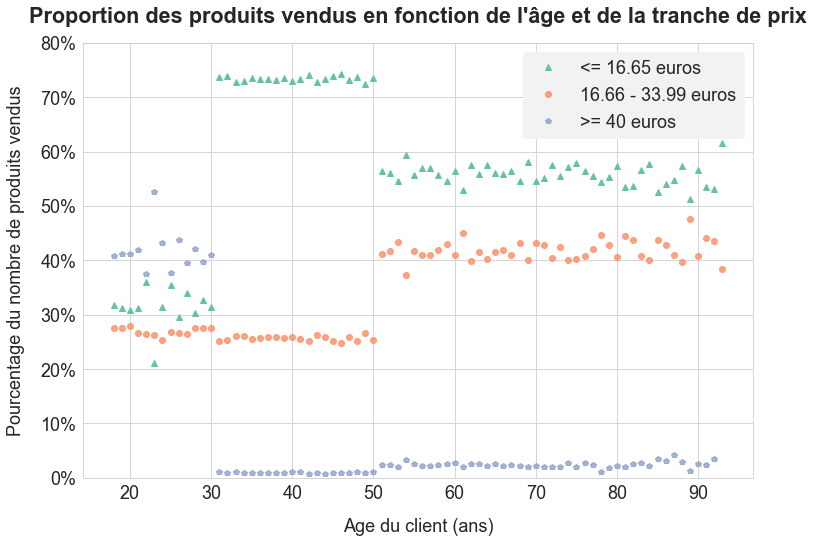

In [126]:
fig = plt.figure()
ax = plt.axes()
ax.plot(c.index, c[0.0],'^',alpha=1, label="<= 16.65 euros")
ax.plot(c.index, c[16.65],'o',alpha=0.8, label="16.66 - 33.99 euros")
ax.plot(c.index, c[33.99],'p',alpha=0.8, label=">= 40 euros")
ax.set_ylabel("Pourcentage du nombre de produits vendus")
ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:.0%}'))
ax.set_ylim([0,0.80])
ax.set_xlabel("Age du client (ans)")
ax.legend(loc='upper right')
plt.title("Proportion des produits vendus en fonction de l'âge et de la tranche de prix")
plt.show()

In [127]:
c = data.pivot_table(values="price", index="client_age", columns="regroup_prix", aggfunc=sum)
for lin,row in c.iterrows():
    total = c.loc[lin,:].sum()
    c.loc[lin,:] = c.loc[lin,:] / total
c.head()

regroup_prix     0.00      16.65     33.99
client_age                                
18            0.085318  0.155273  0.759410
19            0.083833  0.152377  0.763790
20            0.084118  0.156623  0.759259
21            0.082894  0.146541  0.770565
22            0.105952  0.161948  0.732100

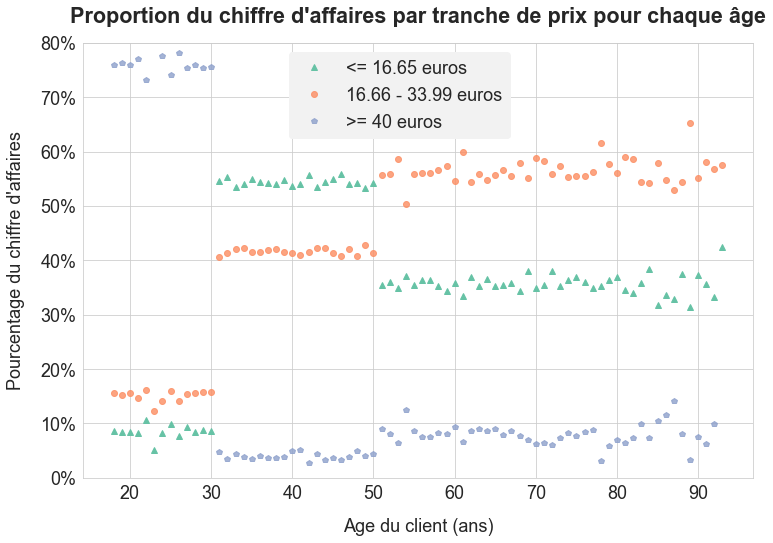

In [128]:
fig = plt.figure()
ax = plt.axes()
ax.plot(c.index, c[0.0],'^',alpha=1, label="<= 16.65 euros")
ax.plot(c.index, c[16.65],'o',alpha=0.8, label="16.66 - 33.99 euros")
ax.plot(c.index, c[33.99],'p',alpha=0.8, label=">= 40 euros")
ax.set_ylabel("Pourcentage du chiffre d'affaires")
ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:.0%}'))
ax.set_ylim([0,0.8])
ax.set_xlabel("Age du client (ans)")
ax.legend(loc='upper right', bbox_to_anchor=(0.65,1))
plt.title("Proportion du chiffre d'affaires par tranche de prix pour chaque âge")
plt.show()

Le graphique par catégorie est définitivement le plus parlant. Je ne retiens pas les analyses par tranche de prix.

## 2.9 Analyse de la récurrence des achats

Pour analyser la récurrence des achats, je vais calculer le nombre de clients qui ont commandé une fois par mois (ou plus), puis ceux qui ont commandé au moins une fois par trimestre, au moins une fois par semestre, et ceux qui ont commandé une seule fois.

In [129]:
analyse_recurrence = clients.copy()
temp = panier[["client_id","session_id"]].groupby("client_id")[["session_id"]].nunique()
temp.columns= ["nombre_commandes"]
temp.reset_index(inplace=True)
analyse_recurrence = pd.merge(analyse_recurrence, temp, how="left", on="client_id")

In [130]:
temp = panier[["client_id","montant_panier"]].groupby("client_id").sum()
temp.columns= ["CA_client"]
temp.reset_index(inplace=True)
analyse_recurrence = pd.merge(analyse_recurrence, temp, how="left", on="client_id")

In [131]:
# je cherche le premier achat pour chaque client
temp = panier[["client_id","date_achat","year_month"]].groupby("client_id").min()
temp.columns= ["date_premiere_commande","mois_premiere_commande"]
temp.reset_index(inplace=True)
analyse_recurrence = pd.merge(analyse_recurrence, temp, how="left", on="client_id")

In [132]:
analyse_recurrence.isna().sum()

client_id                  0
sex                        0
birth                      0
age                        0
nombre_commandes          21
CA_client                 21
date_premiere_commande    21
mois_premiere_commande    21
dtype: int64

In [133]:
ventes[ventes.client_id.isin(analyse_recurrence[analyse_recurrence.mois_premiere_commande.isna()].client_id.values)]

Empty DataFrame
Columns: [id_prod, date, session_id, client_id]
Index: []

In [134]:
clients[clients.client_id.isin(analyse_recurrence[analyse_recurrence.mois_premiere_commande.isna()].client_id.values)]

client_id sex  birth  age
801     c_8253   f   2001   21
2483    c_3789   f   1997   25
2734    c_4406   f   1998   24
2768    c_2706   f   1967   55
2850    c_3443   m   1959   63
3178    c_4447   m   1956   66
3189    c_3017   f   1992   30
3333    c_4086   f   1992   30
3720    c_6930   m   2004   18
3820    c_4358   m   1999   23
4723    c_8381   f   1965   57
4790    c_1223   m   1963   59
6111    c_6862   f   2002   20
6207    c_5245   f   2004   18
6337    c_5223   m   2003   19
6470    c_6735   m   2004   18
6584     c_862   f   1956   66
6827    c_7584   f   1960   62
7789      c_90   m   2001   21
7818     c_587   m   1993   29
8534    c_3526   m   1956   66

Il y a 21 clients pour lesquels je n'ai pas de date de première commande car ils n'ont effectué aucune commande sur la période. Je peux supprimer ces lignes dans le dataframe analyse_recurrence. Ils ont des âges variés mais aucun n'appartient à la catégorie des 31-50 ans.

In [135]:
analyse_recurrence.dropna(inplace=True)

In [136]:
analyse_recurrence["trimestre_premiere_commande"] = (analyse_recurrence.date_premiere_commande.dt.year * 10 \
                        + analyse_recurrence.date_premiere_commande.dt.quarter).astype(str)
analyse_recurrence["semestre_premiere_commande"] = (analyse_recurrence.date_premiere_commande.dt.year * 10 \
                        + ((analyse_recurrence.date_premiere_commande.dt.month + 5) // 6)).astype(str)
temp = panier[["client_id","year_month"]].groupby("client_id")[["year_month"]].nunique()
temp.columns= ["nombre_mois_differents"]
temp.reset_index(inplace=True)
analyse_recurrence = pd.merge(analyse_recurrence, temp, how="left", on="client_id")

In [137]:
panier["quarter"] = (panier.date_achat.dt.year * 10 + panier.date_achat.dt.quarter).astype(str)
panier["semester"] = (panier.date_achat.dt.year * 10 + ((panier.date_achat.dt.month + 5) // 6)).astype(str)
temp = panier[["client_id","quarter","semester"]].groupby("client_id")[["quarter","semester"]].nunique()
temp.columns= ["nombre_trimestres_differents","nombre_semestres_differents"]
temp.reset_index(inplace=True)
analyse_recurrence = pd.merge(analyse_recurrence, temp, how="left", on="client_id")

In [138]:
temp = pd.Index(panier.year_month.unique())
analyse_recurrence["nombre_mois_max"] = [len(temp) - temp.get_loc(mois) for mois in analyse_recurrence.mois_premiere_commande]
temp = pd.Index(panier.quarter.unique())
analyse_recurrence["nombre_trimestres_max"] = [len(temp) - temp.get_loc(trimestre) for trimestre in analyse_recurrence.trimestre_premiere_commande]
temp = pd.Index(panier.semester.unique())
analyse_recurrence["nombre_semestres_max"] = [len(temp) - temp.get_loc(semestre) for semestre in analyse_recurrence.semestre_premiere_commande]

Lors de la vérification de la récurrence des commandes, il faut faire attention à ce que le nombre maximum de mois, de trimestres ou de semestres (selon la récurrence vérifiée) soit strictement supérieur à un. Car il peut y avoir plusieurs commandes lors du même mois (trimestre ou semestre).

In [139]:
analyse_recurrence["tous_les_mois"] = (analyse_recurrence.nombre_mois_differents == analyse_recurrence.nombre_mois_max) & \
    (analyse_recurrence.nombre_mois_max > 1)

analyse_recurrence["tous_les_trimestres"] = (analyse_recurrence.tous_les_mois == False) & \
    (analyse_recurrence.nombre_trimestres_differents == analyse_recurrence.nombre_trimestres_max) & \
    (analyse_recurrence.nombre_trimestres_max > 1)

analyse_recurrence["tous_les_semestres"] = (analyse_recurrence.tous_les_mois == False) & (analyse_recurrence.tous_les_trimestres == False) & \
    (analyse_recurrence.nombre_semestres_differents == analyse_recurrence.nombre_semestres_max) & \
    (analyse_recurrence.nombre_semestres_max > 1)

analyse_recurrence["plus_d_une_commande"] = (analyse_recurrence.tous_les_mois == False) & (analyse_recurrence.tous_les_trimestres == False) & \
    (analyse_recurrence.tous_les_semestres == False) & (analyse_recurrence.nombre_commandes > 1)

analyse_recurrence["une_seule_commande"] = analyse_recurrence.nombre_commandes == 1

Je crée une nouvelle colonne dans mon dataframe pour simplifier l'analyse. Elle comporte un code de fréquence : "m" pour tous les mois, "t" pour tous les trimestres, "s" pour tous les semestres, "p" pour plusieurs commandes et "u" pour une seule commande. Puis je réalise des tables pivots pour résumer les informations que je veux grapher.

In [140]:
liste_code_freq = np.array([])
for i, row in analyse_recurrence.iterrows():
    if row.tous_les_mois:
        code_freq = "m"
    elif row.tous_les_trimestres:
        code_freq = "t"
    elif row.tous_les_semestres:
        code_freq = "s"
    elif row.plus_d_une_commande:
        code_freq = "p"
    elif row.une_seule_commande:
        code_freq = "u"
    else:
        code_freq = np.nan
    liste_code_freq = np.append(liste_code_freq, code_freq)
analyse_recurrence["code_frequence"] = liste_code_freq
analyse_recurrence.head()

client_id sex  birth  age  nombre_commandes  CA_client  \
0    c_4410   f   1967   55              25.0     575.20   
1    c_7839   f   1975   47               9.0     276.05   
2    c_1699   f   1984   38               3.0      99.49   
3    c_5961   f   1962   60              27.0     545.73   
4    c_5320   m   1943   79               9.0     203.47   

      date_premiere_commande mois_premiere_commande  \
0 2021-03-13 21:35:55.949042                 202103   
1 2021-03-28 16:20:21.404637                 202103   
2 2021-03-13 21:28:34.062719                 202103   
3 2021-03-13 05:13:45.852164                 202103   
4 2021-03-10 13:35:12.836541                 202103   

  trimestre_premiere_commande semestre_premiere_commande  ...  \
0                       20211                      20211  ...   
1                       20211                      20211  ...   
2                       20211                      20211  ...   
3                       20211                      20211  ...   
4                       20211                      20211  ...   

   nombre_semestres_differents  nombre_mois_max  nombre_trimestres_max  \
0                            3               12                      5   
1                            2               12                      5   
2                            2               12                      5   
3                            3               12                      5   
4                            2               12                      5   

   nombre_semestres_max  tous_les_mois  tous_les_trimestres  \
0                     3          False                 True   
1                     3          False                False   
2                     3          False                False   
3                     3           True                False   
4                     3          False                False   

   tous_les_semestres  plus_d_une_commande  une_seule_commande  code_frequence  
0               False                False               False               t  
1               False                 True               False               p  
2               False                 True               False               p  
3               False                False               False               m  
4               False                 True               False               p  

[5 rows x 22 columns]

In [141]:
temp = analyse_recurrence[["code_frequence","CA_client"]].groupby("code_frequence").count()
temp = temp.T
temp = temp[["m","t","s","p","u"]]
temp.loc[:,"total"] = temp.sum(axis=1)
temp

code_frequence     m     t    s     p   u  total
CA_client       1507  4718  898  1392  85   8600

In [142]:
sns.set_style("white")
sns.set_palette(sns.light_palette("navy"))
liste_couleurs = sns.color_palette()

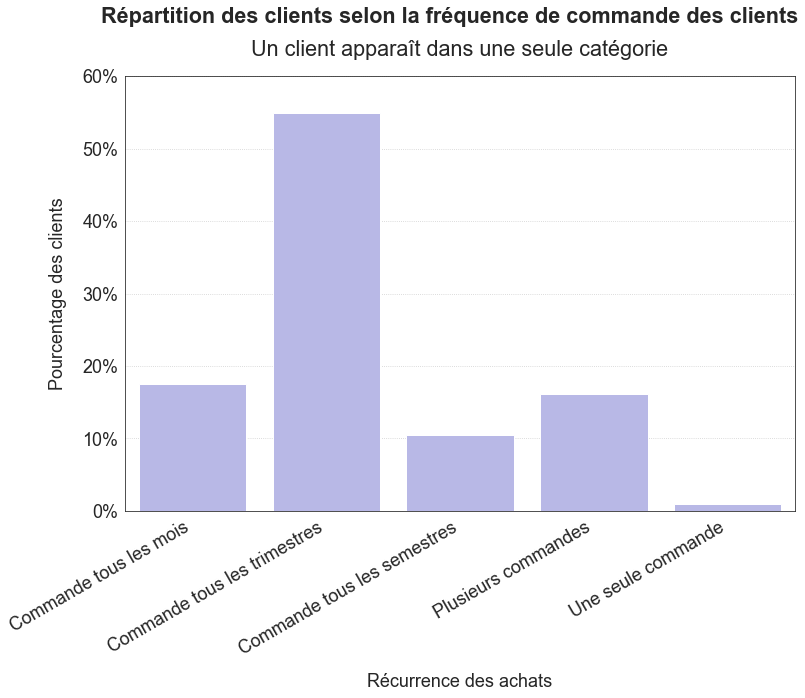

In [143]:
fig = plt.figure()
ax = plt.axes()
ax.bar(np.arange(0,5), height=temp.loc["CA_client",:"u"] / temp.loc["CA_client","total"], color=liste_couleurs[1])
ax.set_ylabel("Pourcentage des clients")
ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:.0%}'))
ax.set_ylim([0,0.6])
ax.set_xlim([-0.5,4.5])
ax.set_xticks(np.arange(5))
ax.set_xticklabels(["Commande tous les mois","Commande tous les trimestres","Commande tous les semestres",\
                    "Plusieurs commandes","Une seule commande"], rotation = 30, ha="right")
ax.set_xlabel("Récurrence des achats")
ax.grid(axis="y", linestyle=":")
plt.suptitle("Répartition des clients selon la fréquence de commande des clients", y=1.0)
plt.title("Un client apparaît dans une seule catégorie", fontweight='regular')
plt.savefig("projet04_225_clients_repart_recurrence.png")
plt.show()

Plus de la moitié des clients commande tous les trimestres. Très peu de clients n'ont effectué qu'une seule commande.

In [144]:
temp = analyse_recurrence[["code_frequence","CA_client"]].groupby("code_frequence").sum()
temp = temp.T
temp = temp[["m","t","s","p","u"]]
temp.loc[:,"total"] = temp.sum(axis=1)
temp

code_frequence           m           t         s          p       u  \
CA_client       2246790.65  2844579.65  300004.0  401504.53  4761.9   

code_frequence       total  
CA_client       5797640.73

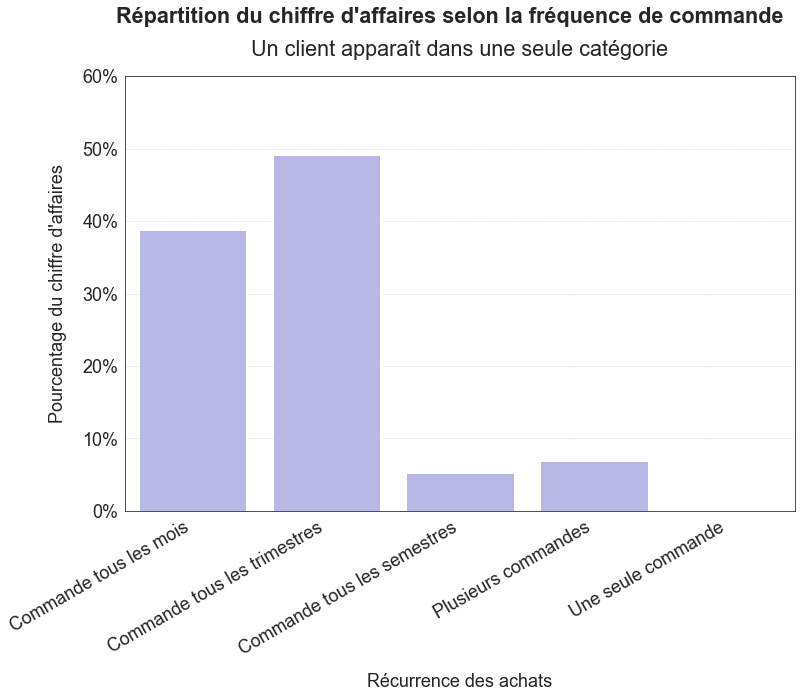

In [145]:
fig = plt.figure()
ax = plt.axes()
ax.bar(np.arange(0,5), height=temp.loc["CA_client",:"u"] / temp.loc["CA_client","total"], color=liste_couleurs[1])
ax.set_ylabel("Pourcentage du chiffre d'affaires")
ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:.0%}'))
ax.set_ylim([0,0.6])
ax.set_xlim([-0.5,4.5])
ax.set_xticks(np.arange(5))
ax.set_xticklabels(["Commande tous les mois","Commande tous les trimestres","Commande tous les semestres",\
                    "Plusieurs commandes","Une seule commande"], rotation = 30, ha="right")
ax.set_xlabel("Récurrence des achats")
ax.grid(axis="y", linestyle=":")
plt.suptitle("Répartition du chiffre d'affaires selon la fréquence de commande", y=1.0)
plt.title("Un client apparaît dans une seule catégorie", fontweight='regular')
plt.savefig("projet04_226_CA_repart_recurrence.png")
plt.show()

Comme on peut s'y attendre, le chiffre d'affaires provient essentiellement des clients qui commandent le plus régulièrement (tous les mois et tous les trimestres).

Je regarde ces mêmes chiffres selon le sexe des clients

In [146]:
temp = analyse_recurrence[["sex","code_frequence"]].pivot_table(index="sex", columns="code_frequence", aggfunc=len)
temp = temp[["m","t","s","p","u"]]
temp.loc[:,"total"] = temp.sum(axis=1)
temp

code_frequence    m     t    s    p   u  total
sex                                           
f               802  2437  469  726  45   4479
m               705  2281  429  666  40   4121

In [147]:
sns.set_palette("Set2")
liste_couleurs = sns.color_palette()

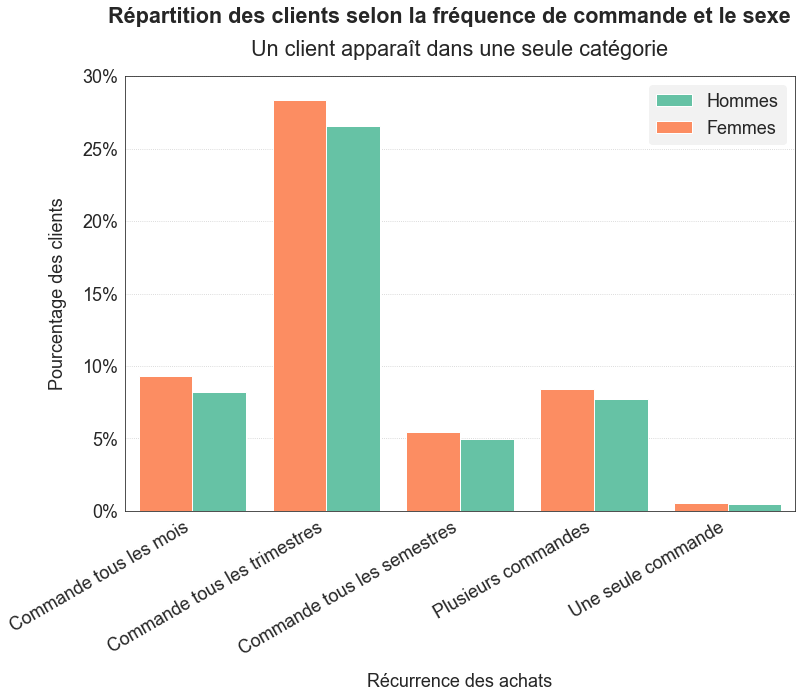

In [148]:
fig = plt.figure()
ax = plt.axes()
ax.bar(np.arange(0,5)+0.2, height=temp.loc["m",:"u"] / temp.loc[:,"total"].sum(), width=0.4, label="Hommes")
ax.bar(np.arange(0,5)-0.2, height=temp.loc["f",:"u"] / temp.loc[:,"total"].sum(), width=0.4, label="Femmes")
ax.set_ylabel("Pourcentage des clients")
ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:.0%}'))
ax.set_ylim([0,0.3])
ax.set_xlim([-0.5,4.5])
ax.set_xticks(np.arange(5))
ax.set_xticklabels(["Commande tous les mois","Commande tous les trimestres","Commande tous les semestres",\
                    "Plusieurs commandes","Une seule commande"], rotation = 30, ha="right")
ax.set_xlabel("Récurrence des achats")
ax.grid(axis="y", linestyle=":")
ax.legend(loc='upper right')
plt.suptitle("Répartition des clients selon la fréquence de commande et le sexe", y=1.0)
plt.title("Un client apparaît dans une seule catégorie", fontweight='regular')
plt.savefig("projet04_227_clients_repart_recurrence_sexe.png")
plt.show()

La fréquence de commande des clients ne dépend pas de leur sexe.

In [149]:
temp = analyse_recurrence[["sex","code_frequence","CA_client"]].pivot_table(values="CA_client", index="sex", columns="code_frequence", aggfunc=sum)
temp = temp[["m","t","s","p","u"]]
temp.loc[:,"total"] = temp.sum(axis=1)
temp

code_frequence           m           t          s          p        u  \
sex                                                                     
f               1023000.30  1462668.23  158551.85  213295.51  2225.08   
m               1223790.35  1381911.42  141452.15  188209.02  2536.82   

code_frequence       total  
sex                         
f               2859740.97  
m               2937899.76

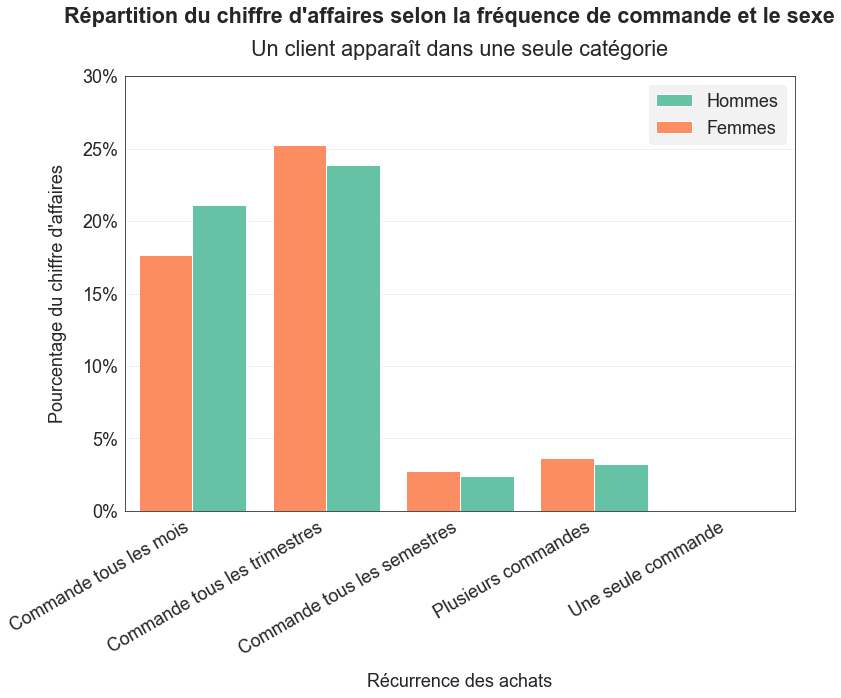

In [150]:
fig = plt.figure()
ax = plt.axes()
ax.bar(np.arange(0,5)+0.2, height=temp.loc["m",:"u"] / temp.loc[:,"total"].sum(), width=0.4, label="Hommes")
ax.bar(np.arange(0,5)-0.2, height=temp.loc["f",:"u"] / temp.loc[:,"total"].sum(), width=0.4, label="Femmes")
ax.set_ylabel("Pourcentage du chiffre d'affaires")
ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:.0%}'))
ax.set_ylim([0,0.3])
ax.set_xlim([-0.5,4.5])
ax.set_xticks(np.arange(5))
ax.set_xticklabels(["Commande tous les mois","Commande tous les trimestres","Commande tous les semestres",\
                    "Plusieurs commandes","Une seule commande"], rotation = 30, ha="right")
ax.set_xlabel("Récurrence des achats")
ax.grid(axis="y", linestyle=":")
ax.legend(loc='upper right')
plt.suptitle("Répartition du chiffre d'affaires selon la fréquence de commande et le sexe", y=1.0)
plt.title("Un client apparaît dans une seule catégorie", fontweight='regular')
plt.savefig("projet04_228_CA_repart_recurrence_sexe.png")
plt.show()

Que ce soient parmi les femmes ou les hommes, les clients qui commandent tous les trimestres représentent la plus grande part du CA (à peu près la moitié), devant ceux qui commandent tous les mois. 

In [151]:
temp = analyse_recurrence[["age","code_frequence"]].pivot_table(index="age", columns="code_frequence", aggfunc=len)
temp = temp[["m","t","s","p","u"]]
temp.loc[:,"total"] = temp.sum(axis=1)
temp.head()

code_frequence    m      t     s      p     u  total
age                                                 
18              5.0  234.0  84.0  104.0  10.0  437.0
19              1.0   70.0  25.0   45.0   4.0  145.0
20              2.0   76.0  28.0   36.0   3.0  145.0
21              1.0   69.0  16.0   37.0   2.0  125.0
22              1.0   72.0  25.0   30.0   8.0  136.0

In [152]:
sns.set_style("whitegrid")

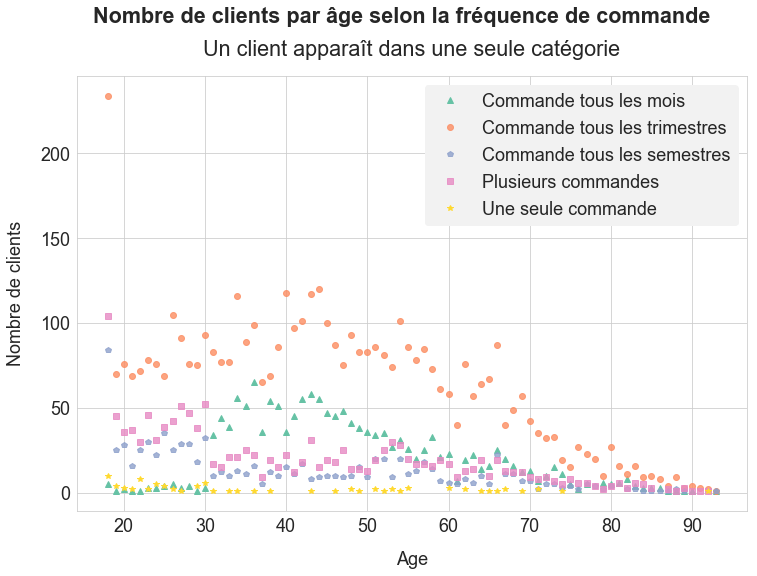

In [153]:
fig = plt.figure()
ax = plt.axes()
ax.plot(temp.index, temp.m,'^', alpha=1, label="Commande tous les mois")
ax.plot(temp.index, temp.t,'o', alpha=0.8, label="Commande tous les trimestres")
ax.plot(temp.index, temp.s,'p', alpha=0.8, label="Commande tous les semestres")
ax.plot(temp.index, temp.p,'s', alpha=0.8, label="Plusieurs commandes")
ax.plot(temp.index, temp.u,'*', color=liste_couleurs[5], alpha=1, label="Une seule commande")
ax.set_ylabel("Nombre de clients")
ax.set_xlabel("Age")
ax.legend(loc='upper right')
plt.suptitle("Nombre de clients par âge selon la fréquence de commande", y=1.0)
plt.title("Un client apparaît dans une seule catégorie", fontweight='regular')
plt.show()

Les caractéristiques des 18 ans sont à peu près les mêmes que celles des 19-20 ans. Vu leur nombre sur-estimé due à la présence de mineurs inscrits sous l'âge de 18 ans, je supprime les données des 18 ans pour commencer le graphique à 19 ans.

In [154]:
temp.drop(index=18, inplace=True)

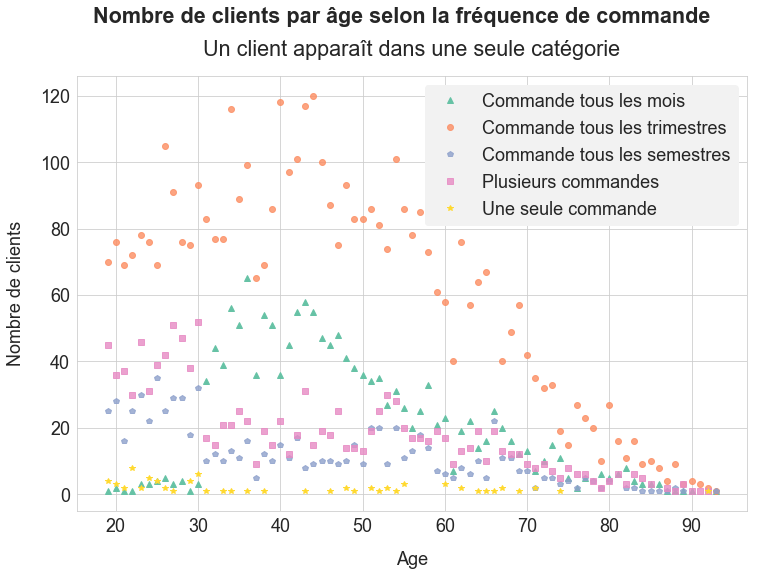

In [155]:
fig = plt.figure()
ax = plt.axes()
ax.plot(temp.index, temp.m,'^', alpha=1, label="Commande tous les mois")
ax.plot(temp.index, temp.t,'o', alpha=0.8, label="Commande tous les trimestres")
ax.plot(temp.index, temp.s,'p', alpha=0.8, label="Commande tous les semestres")
ax.plot(temp.index, temp.p,'s', alpha=0.8, label="Plusieurs commandes")
ax.plot(temp.index, temp.u,'*', color=liste_couleurs[5], alpha=1, label="Une seule commande")
ax.set_ylabel("Nombre de clients")
ax.set_xlabel("Age")
ax.legend(loc='upper right')
plt.suptitle("Nombre de clients par âge selon la fréquence de commande", y=1.0)
plt.title("Un client apparaît dans une seule catégorie", fontweight='regular')
plt.show()

Les clients qui commandent tous les trimestres sont les plus nombreux quelque soit l'âge. Un graphique de la proportion par âge est peut-être plus lisible.

In [156]:
temp = analyse_recurrence[["age","code_frequence","CA_client"]].pivot_table(values="CA_client",index="age", columns="code_frequence", aggfunc=sum)
temp = temp[["m","t","s","p","u"]]
temp.loc[:,"total"] = temp.sum(axis=1)
temp.head()

code_frequence        m          t         s         p       u      total
age                                                                      
18              6382.96  206610.19  39019.81  42664.66  710.36  295387.98
19               283.03   59230.17  11195.83  17325.65  426.71   88461.39
20              2647.02   61753.32  11852.76  13522.97  144.27   89920.34
21              1869.43   62986.63   5781.59  14012.85  230.98   84881.48
22              1954.71   56959.64  11217.51   9319.33  659.05   80110.24

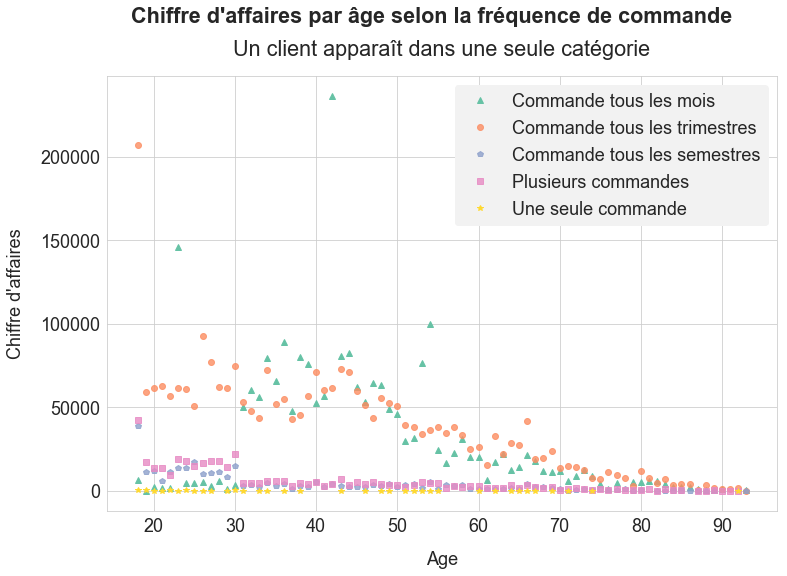

In [157]:
fig = plt.figure()
ax = plt.axes()
ax.plot(temp.index, temp.m,'^', alpha=1, label="Commande tous les mois")
ax.plot(temp.index, temp.t,'o', alpha=0.8, label="Commande tous les trimestres")
ax.plot(temp.index, temp.s,'p', alpha=0.8, label="Commande tous les semestres")
ax.plot(temp.index, temp.p,'s', alpha=0.8, label="Plusieurs commandes")
ax.plot(temp.index, temp.u,'*', color=liste_couleurs[5], alpha=1, label="Une seule commande")
ax.set_ylabel("Chiffre d'affaires")
ax.set_xlabel("Age")
ax.legend(loc='upper right')
plt.suptitle("Chiffre d'affaires par âge selon la fréquence de commande", y=1.0)
plt.title("Un client apparaît dans une seule catégorie", fontweight='regular')
plt.show()

Ce graphique n'est pas très lisible. Je vais également tracer ces données en proportion par âge.

In [158]:
temp = analyse_recurrence[["age","code_frequence"]].pivot_table(index="age", columns="code_frequence", aggfunc=len)
temp = temp[["m","t","s","p","u"]]
temp = temp.div(temp.sum(axis=1), axis=0)
temp.head()

code_frequence         m         t         s         p         u
age                                                             
18              0.011442  0.535469  0.192220  0.237986  0.022883
19              0.006897  0.482759  0.172414  0.310345  0.027586
20              0.013793  0.524138  0.193103  0.248276  0.020690
21              0.008000  0.552000  0.128000  0.296000  0.016000
22              0.007353  0.529412  0.183824  0.220588  0.058824

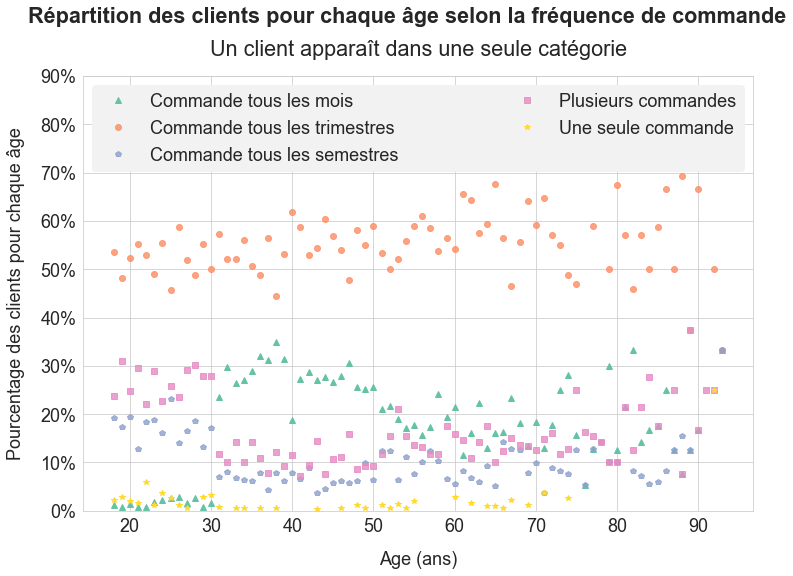

In [159]:
fig = plt.figure()
ax = plt.axes()
ax.plot(temp.index, temp.m,'^', alpha=1, label="Commande tous les mois")
ax.plot(temp.index, temp.t,'o', alpha=0.8, label="Commande tous les trimestres")
ax.plot(temp.index, temp.s,'p', alpha=0.8, label="Commande tous les semestres")
ax.plot(temp.index, temp.p,'s', alpha=0.8, label="Plusieurs commandes")
ax.plot(temp.index, temp.u,'*', color=liste_couleurs[5], alpha=1, label="Une seule commande")
ax.set_ylabel("Pourcentage des clients pour chaque âge")
ax.set_ylim([0,0.9])
ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:.0%}'))
ax.set_xlabel("Age (ans)")
ax.legend(loc='upper left', mode="expand", ncol=2)
plt.suptitle("Répartition des clients pour chaque âge selon la fréquence de commande", y=1.0)
plt.title("Un client apparaît dans une seule catégorie", fontweight='regular')
plt.show()

Quelque soit l'âge, la majorité des clients commandent tous les trimestres. Ceux qui commandent tous les mois sont peu nombreux chez les moins de 30 ans alors qu'ils représentent la deuxième classe la plus présente chez les plus de 31 ans.

In [160]:
temp = analyse_recurrence[["age","code_frequence","CA_client"]].pivot_table(values="CA_client",index="age", columns="code_frequence", aggfunc=sum)
temp = temp[["m","t","s","p","u"]]
temp = temp.div(temp.sum(axis=1), axis=0)
temp.head()

code_frequence         m         t         s         p         u
age                                                             
18              0.021609  0.699454  0.132097  0.144436  0.002405
19              0.003199  0.669560  0.126562  0.195856  0.004824
20              0.029437  0.686756  0.131814  0.150388  0.001604
21              0.022024  0.742054  0.068114  0.165087  0.002721
22              0.024400  0.711016  0.140026  0.116331  0.008227

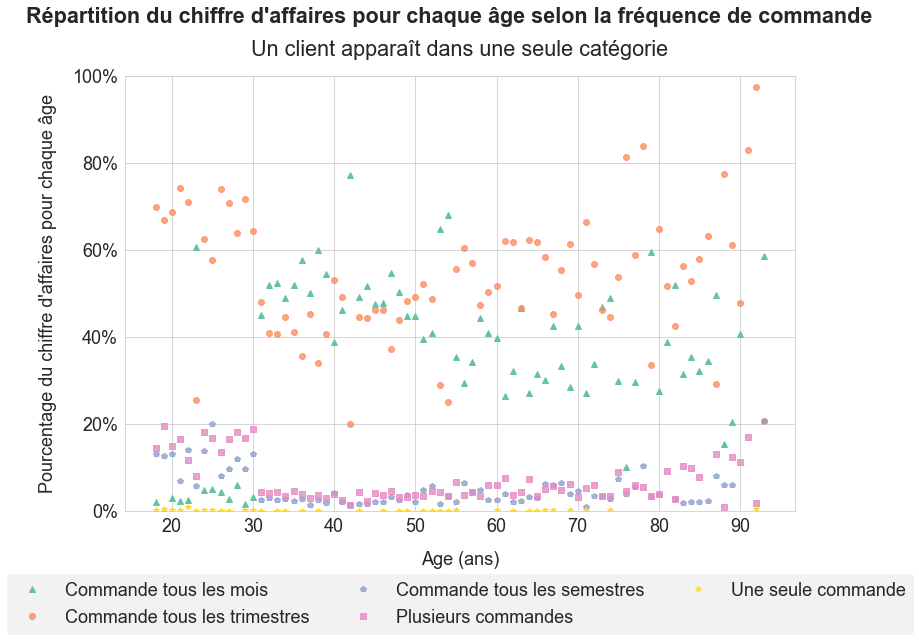

In [161]:
fig = plt.figure()
ax = plt.axes()
ax.plot(temp.index, temp.m,'^', alpha=1, label="Commande tous les mois")
ax.plot(temp.index, temp.t,'o', alpha=0.8, label="Commande tous les trimestres")
ax.plot(temp.index, temp.s,'p', alpha=0.8, label="Commande tous les semestres")
ax.plot(temp.index, temp.p,'s', alpha=0.8, label="Plusieurs commandes")
ax.plot(temp.index, temp.u,'*', color=liste_couleurs[5], alpha=1, label="Une seule commande")
ax.set_ylabel("Pourcentage du chiffre d'affaires pour chaque âge")
ax.set_ylim([0,1.0])
ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:.0%}'))
ax.set_xlabel("Age (ans)")
ax.legend(bbox_to_anchor=(0.5, -0.125), loc="upper center", ncol=3)
plt.suptitle("Répartition du chiffre d'affaires pour chaque âge selon la fréquence de commande", y=1.0)
plt.title("Un client apparaît dans une seule catégorie", fontweight='regular')
plt.show()

Globalement, on retrouve un découpage par tranche d'âge similaire à ce que nous avons observé auparavant : 30 ans et moins, 31 à 50 ans, et 51 ans et plus. Mais le graphique est peu lisible.  
Je vais refaire les graphiques avec ces trois tranches d'âge.

In [162]:
analyse_recurrence["tranche_age"] = pd.cut(analyse_recurrence.age, [15,30,50,95])
temp = analyse_recurrence[["tranche_age","code_frequence"]].pivot_table(index="tranche_age", columns="code_frequence", aggfunc=len)
temp = temp[["m","t","s","p","u"]]
temp.loc[:,"total"] = temp.sum(axis=1)
temp

code_frequence    m     t    s    p   u  total
tranche_age                                   
(15, 30]         36  1184  398  598  51   2267
(30, 50]        934  1835  222  365  10   3366
(50, 95]        537  1699  278  429  24   2967

In [163]:
sns.set_style("white")

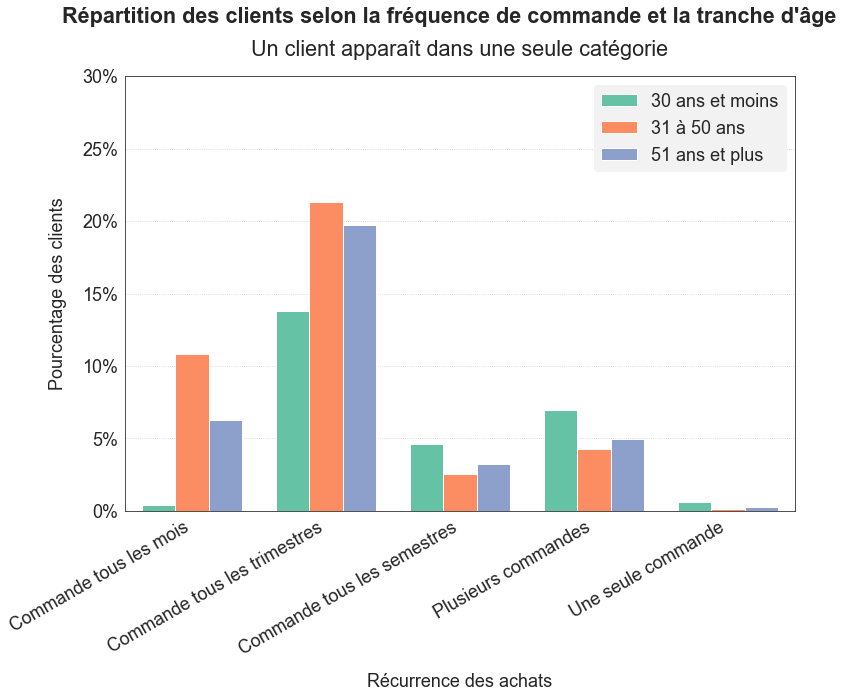

In [164]:
fig = plt.figure()
ax = plt.axes()
ax.bar(np.arange(0,5)-0.25, height=temp.iloc[0,:-1] / temp.loc[:,"total"].sum(), width=0.25, label="30 ans et moins")
ax.bar(np.arange(0,5), height=temp.iloc[1,:-1] / temp.loc[:,"total"].sum(), width=0.25, label="31 à 50 ans")
ax.bar(np.arange(0,5)+0.25, height=temp.iloc[2,:-1] / temp.loc[:,"total"].sum(), width=0.25, label="51 ans et plus")
ax.set_ylabel("Pourcentage des clients")
ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:.0%}'))
ax.set_ylim([0,0.3])
ax.set_xlim([-0.5,4.5])
ax.set_xticks(np.arange(5))
ax.set_xticklabels(["Commande tous les mois","Commande tous les trimestres","Commande tous les semestres",\
                    "Plusieurs commandes","Une seule commande"], rotation = 30, ha="right")
ax.set_xlabel("Récurrence des achats")
ax.grid(axis="y", linestyle=":")
ax.legend(loc='upper right')
plt.suptitle("Répartition des clients selon la fréquence de commande et la tranche d'âge", y=1.0)
plt.title("Un client apparaît dans une seule catégorie", fontweight='regular')
plt.savefig("projet04_229_clients_repart_recurrence_trancheage.png")
plt.show()

Les clients qui commandent tous les trimestres sont les plus nombreux dans chaque tranche d'âge. Les clients qui commandent tous les mois sont les seconds plus nombreux chez les plus de 31 ans alors qu'ils sont très peu nombreux chez les moins de 30 ans.

In [165]:
temp = analyse_recurrence[["tranche_age","code_frequence","CA_client"]].pivot_table(values="CA_client", index="tranche_age", columns="code_frequence", aggfunc=sum)
temp = temp[["m","t","s","p","u"]]
temp.loc[:,"total"] = temp.sum(axis=1)
temp

code_frequence           m           t          s          p        u  \
tranche_age                                                             
(15, 30]         187877.89   989655.68  179743.77  237579.92  3744.13   
(30, 50]        1452228.93  1120724.43   63899.22   93088.22   258.47   
(50, 95]         606683.83   734199.54   56361.01   70836.39   759.30   

code_frequence       total  
tranche_age                 
(15, 30]        1598601.39  
(30, 50]        2730199.27  
(50, 95]        1468840.07

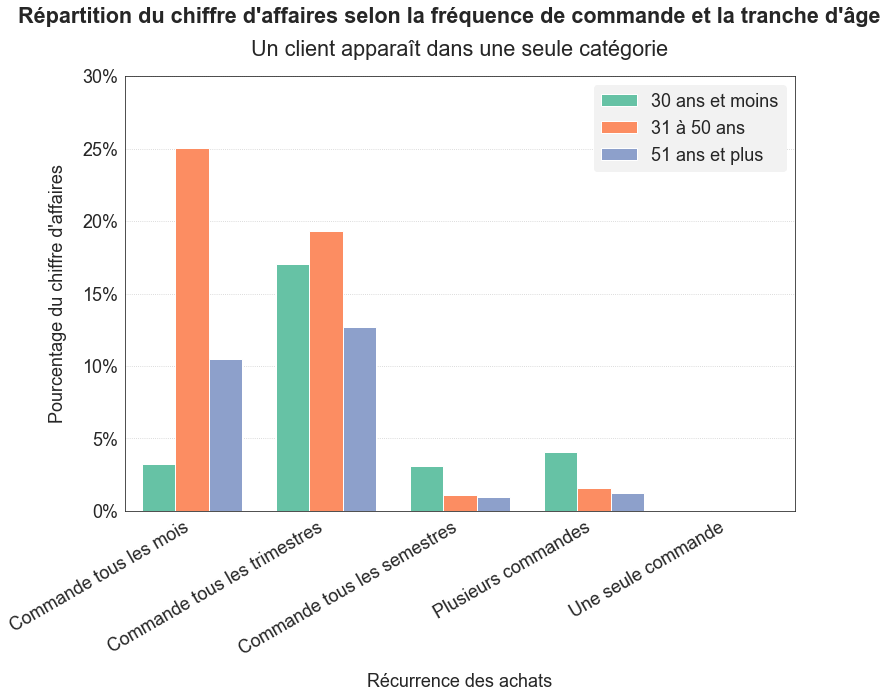

In [166]:
fig = plt.figure()
ax = plt.axes()
ax.bar(np.arange(0,5)-0.25, height=temp.iloc[0,:-1] / temp.loc[:,"total"].sum(), width=0.25, label="30 ans et moins")
ax.bar(np.arange(0,5), height=temp.iloc[1,:-1] / temp.loc[:,"total"].sum(), width=0.25, label="31 à 50 ans")
ax.bar(np.arange(0,5)+0.25, height=temp.iloc[2,:-1] / temp.loc[:,"total"].sum(), width=0.25, label="51 ans et plus")
ax.set_ylabel("Pourcentage du chiffre d'affaires")
ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:.0%}'))
ax.set_ylim([0,0.3])
ax.set_xlim([-0.5,4.5])
ax.set_xticks(np.arange(5))
ax.set_xticklabels(["Commande tous les mois","Commande tous les trimestres","Commande tous les semestres",\
                    "Plusieurs commandes","Une seule commande"], rotation = 30, ha="right")
ax.set_xlabel("Récurrence des achats")
ax.grid(axis="y", linestyle=":")
ax.legend(loc='upper right')
plt.suptitle("Répartition du chiffre d'affaires selon la fréquence de commande et la tranche d'âge", y=1.0)
plt.title("Un client apparaît dans une seule catégorie", fontweight='regular')
plt.savefig("projet04_230_clients_repart_recurrence_trancheage.png")
plt.show()

Le chiffre d'affaires provient d'abord des clients qui commandent tous les mois chez les clients de 31 à 50 ans, alors qu'il provient essentiellement des clients qui commandent tous les trimestres chez les moins de 30 ans et les plus de 51 ans.

## 2.10 Analyse des concentrations

**Concentration par client**  
Le nombre de produits vendus est-il concentré sur quelques clients ou bien réparti ? Et pour le chiffre d'affaires ?

In [167]:
temp = data.groupby("client_id")[["price"]]
analyse_client = temp.sum()
analyse_client.columns = ["chiffre_affaires"]
analyse_client["nombre_achats"] = data.groupby("client_id")["session_id"].nunique()
analyse_client["nombre_produits_achetes"] = temp.size()
analyse_client["panier_moyen"] = analyse_client["chiffre_affaires"] / analyse_client["nombre_achats"]
analyse_client["nombre_moyen_produits_panier"] = analyse_client["nombre_produits_achetes"] / analyse_client["nombre_achats"]
analyse_client["prix_moyen_produits_panier"] = analyse_client["chiffre_affaires"] / analyse_client["nombre_produits_achetes"]
analyse_client = analyse_client.sort_values(by="chiffre_affaires")
analyse_client.head()

chiffre_affaires  nombre_achats  nombre_produits_achetes  \
client_id                                                             
c_8140                 4.15              1                        1   
c_8114                 4.99              1                        1   
c_1675                 5.57              1                        1   
c_890                  6.08              1                        1   
c_8351                 6.31              1                        1   

           panier_moyen  nombre_moyen_produits_panier  \
client_id                                               
c_8140             4.15                           1.0   
c_8114             4.99                           1.0   
c_1675             5.57                           1.0   
c_890              6.08                           1.0   
c_8351             6.31                           1.0   

           prix_moyen_produits_panier  
client_id                              
c_8140                           4.15  
c_8114                           4.99  
c_1675                           5.57  
c_890                            6.08  
c_8351                           6.31

In [168]:
analyse_client.tail()

chiffre_affaires  nombre_achats  nombre_produits_achetes  \
client_id                                                             
c_7959              2564.25             76                      195   
c_3454             54463.56           2711                     3275   
c_6714             73217.98           1286                     4473   
c_4958            144257.21           1888                     2562   
c_1609            162007.34           5501                    12855   

           panier_moyen  nombre_moyen_produits_panier  \
client_id                                               
c_7959        33.740132                      2.565789   
c_3454        20.089841                      1.208041   
c_6714        56.934666                      3.478227   
c_4958        76.407421                      1.356992   
c_1609        29.450525                      2.336848   

           prix_moyen_produits_panier  
client_id                              
c_7959                      13.150000  
c_3454                      16.630095  
c_6714                      16.368875  
c_4958                      56.306483  
c_1609                      12.602671

In [169]:
listdata = analyse_client["chiffre_affaires"].values
lorenz = np.cumsum(np.sort(listdata)) / listdata.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
S = 0.5 - aire_ss_courbe # aire entre la 1e bissectrice et la courbe de Lorenz
gini = 2 * S

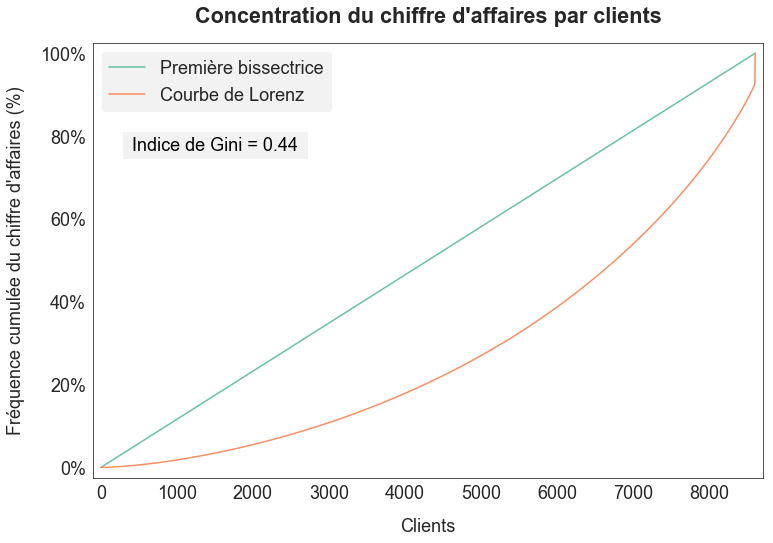

In [170]:
sns.set_style("white")
fig = plt.figure()
ax = plt.axes()
ax.plot(np.linspace(0,1,len(lorenz)), label="Première bissectrice")  # première bissectrice
ax.plot(lorenz, label="Courbe de Lorenz")  # courbe de lorenz
ax.set_ylim([-0.025,1.025])
ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:.0%}'))
ax.set_ylabel("Fréquence cumulée du chiffre d'affaires (%)")
ax.set_xlim([-100,len(lorenz)+100])
ax.set_xlabel("Clients")
ax.legend(loc="upper left")
plt.text(1500,0.8," Indice de Gini = {:.2f} ".format(gini),\
         horizontalalignment='center',verticalalignment='top',color='black',backgroundcolor=(0.95,0.95,0.95))
plt.title("Concentration du chiffre d'affaires par clients")
plt.savefig("projet04_231_concentration_clients_CA.png")
plt.show()

On remarque une forte concentration du chiffre d'affaires sur quelques clients. Sinon, le reste semble plutôt bien réparti entre les autres clients.  
On constate un chiffre d'affaires très élevé pour quatre clients (par rapport aux autres) lorsqu'on regarde les dernières lignes du dataframe analyse_client.

In [171]:
analyse_client.tail(10)

chiffre_affaires  nombre_achats  nombre_produits_achetes  \
client_id                                                             
c_7421              2511.98             77                      189   
c_8392              2515.98             79                      189   
c_2140              2527.01             74                      195   
c_4491              2540.53             73                      168   
c_8026              2547.99             77                      193   
c_7959              2564.25             76                      195   
c_3454             54463.56           2711                     3275   
c_6714             73217.98           1286                     4473   
c_4958            144257.21           1888                     2562   
c_1609            162007.34           5501                    12855   

           panier_moyen  nombre_moyen_produits_panier  \
client_id                                               
c_7421        32.623117                      2.454545   
c_8392        31.847848                      2.392405   
c_2140        34.148784                      2.635135   
c_4491        34.801781                      2.301370   
c_8026        33.090779                      2.506494   
c_7959        33.740132                      2.565789   
c_3454        20.089841                      1.208041   
c_6714        56.934666                      3.478227   
c_4958        76.407421                      1.356992   
c_1609        29.450525                      2.336848   

           prix_moyen_produits_panier  
client_id                              
c_7421                      13.290899  
c_8392                      13.312063  
c_2140                      12.959026  
c_4491                      15.122202  
c_8026                      13.202021  
c_7959                      13.150000  
c_3454                      16.630095  
c_6714                      16.368875  
c_4958                      56.306483  
c_1609                      12.602671

Je sauvegarde le client_id de ces 4 clients. Puis, je recalcule l'indice de Gini sans ces 4 valeurs, à titre de curiosité.

In [172]:
liste_clients_atypiques = analyse_client.iloc[(len(analyse_client)-4):].index.values
liste_clients_atypiques

array(['c_3454', 'c_6714', 'c_4958', 'c_1609'], dtype=object)

In [173]:
listdata = analyse_client.iloc[:(len(analyse_client)-4)]["chiffre_affaires"].values
lorenz = np.cumsum(np.sort(listdata)) / listdata.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
S = 0.5 - aire_ss_courbe # aire entre la 1e bissectrice et la courbe de Lorenz
gini = 2 * S

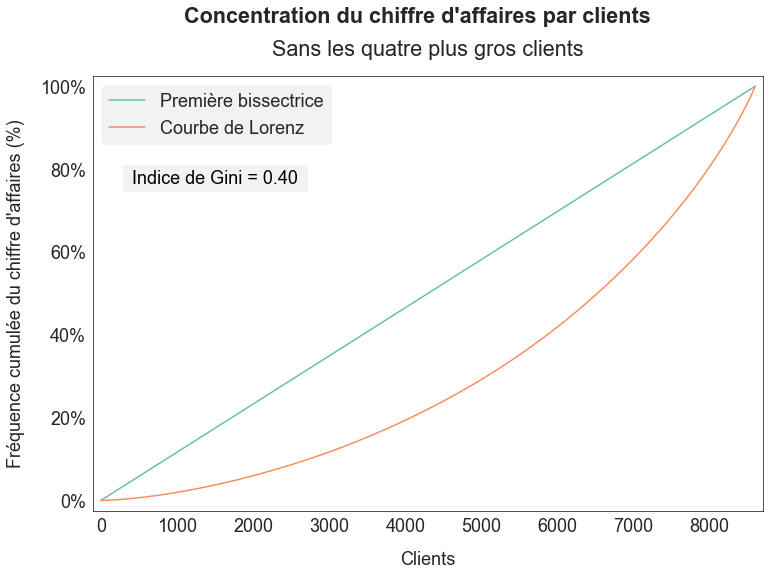

In [174]:
fig = plt.figure()
ax = plt.axes()
ax.plot(np.linspace(0,1,len(lorenz)), label="Première bissectrice")  # première bissectrice
ax.plot(lorenz, label="Courbe de Lorenz")  # courbe de lorenz
ax.set_ylim([-0.025,1.025])
ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:.0%}'))
ax.set_ylabel("Fréquence cumulée du chiffre d'affaires (%)")
ax.set_xlim([-100,len(lorenz)+100])
ax.set_xlabel("Clients")
ax.legend(loc="upper left")
plt.text(1500,0.8," Indice de Gini = {:.2f} ".format(gini),\
         horizontalalignment='center',verticalalignment='top',color='black',backgroundcolor=(0.95,0.95,0.95))
plt.suptitle("Concentration du chiffre d'affaires par clients", y=1.0)
plt.title("Sans les quatre plus gros clients", fontweight='regular')
plt.show()

In [175]:
listdata = analyse_client["nombre_produits_achetes"].values
lorenz = np.cumsum(np.sort(listdata)) / listdata.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
S = 0.5 - aire_ss_courbe # aire entre la 1e bissectrice et la courbe de Lorenz
gini = 2 * S

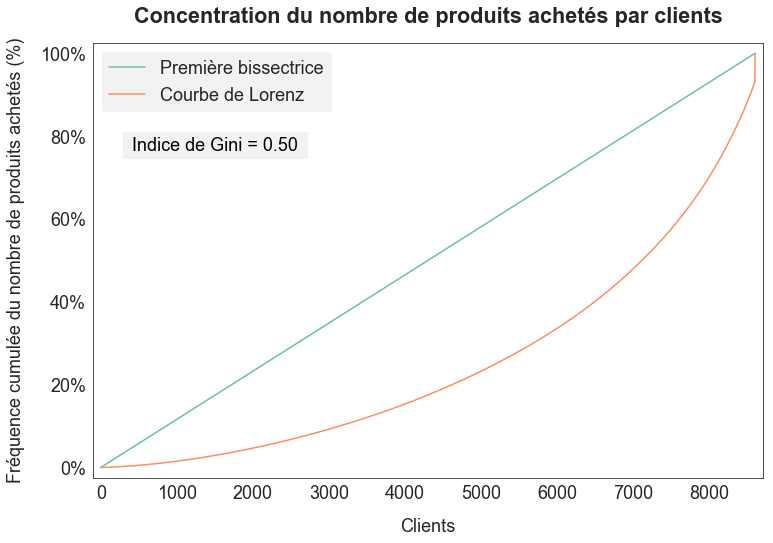

In [176]:
fig = plt.figure()
ax = plt.axes()
ax.plot(np.linspace(0,1,len(lorenz)), label="Première bissectrice")  # première bissectrice
ax.plot(lorenz, label="Courbe de Lorenz")  # courbe de lorenz
ax.set_ylim([-0.025,1.025])
ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:.0%}'))
ax.set_ylabel("Fréquence cumulée du nombre de produits achetés (%)")
ax.set_xlim([-100,len(lorenz)+100])
ax.set_xlabel("Clients")
ax.legend(loc="upper left")
plt.text(1500,0.8," Indice de Gini = {:.2f} ".format(gini),\
         horizontalalignment='center',verticalalignment='top',color='black',backgroundcolor=(0.95,0.95,0.95))
plt.title("Concentration du nombre de produits achetés par clients")
plt.show()

In [177]:
listdata = analyse_client["nombre_achats"].values
lorenz = np.cumsum(np.sort(listdata)) / listdata.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
S = 0.5 - aire_ss_courbe # aire entre la 1e bissectrice et la courbe de Lorenz
gini = 2 * S

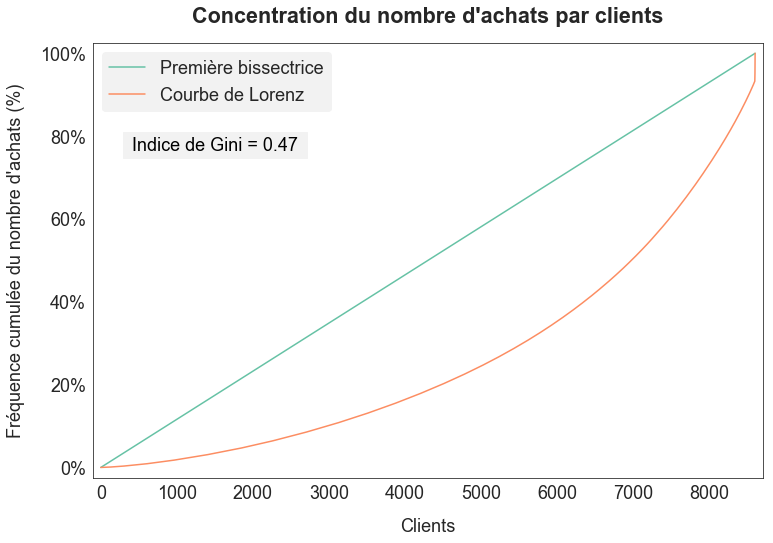

In [178]:
fig = plt.figure()
ax = plt.axes()
ax.plot(np.linspace(0,1,len(lorenz)), label="Première bissectrice")  # première bissectrice
ax.plot(lorenz, label="Courbe de Lorenz")  # courbe de lorenz
ax.set_ylim([-0.025,1.025])
ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:.0%}'))
ax.set_ylabel("Fréquence cumulée du nombre d'achats (%)")
ax.set_xlim([-100,len(lorenz)+100])
ax.set_xlabel("Clients")
ax.legend(loc="upper left")
plt.text(1500,0.8," Indice de Gini = {:.2f} ".format(gini),\
         horizontalalignment='center',verticalalignment='top',color='black',backgroundcolor=(0.95,0.95,0.95))
plt.title("Concentration du nombre d'achats par clients")
plt.show()

J'analyse les 4 plus gros clients et leurs achats.

In [179]:
resume_clients_atypiques = clients[clients.client_id.isin(liste_clients_atypiques)]
CA_clients_atypiques = data[data.client_id.isin(liste_clients_atypiques)].groupby("client_id")[["price"]].sum()
nbproduits_clients_atypiques = data[data.client_id.isin(liste_clients_atypiques)].groupby("client_id")[["date"]].count()
nbcommandes_clients_atypiques = panier[panier.client_id.isin(liste_clients_atypiques)].groupby("client_id")[["session_id"]].count()
paniermoyen_clients_atypiques = panier[panier.client_id.isin(liste_clients_atypiques)].groupby("client_id")[["montant_panier"]].mean()

In [180]:
resume_clients_atypiques = pd.merge(resume_clients_atypiques, CA_clients_atypiques, how="left", on="client_id")
resume_clients_atypiques = pd.merge(resume_clients_atypiques, nbproduits_clients_atypiques, how="left", on="client_id")
resume_clients_atypiques = pd.merge(resume_clients_atypiques, nbcommandes_clients_atypiques, how="left", on="client_id")
resume_clients_atypiques = pd.merge(resume_clients_atypiques, paniermoyen_clients_atypiques,how="left", on="client_id")
resume_clients_atypiques.columns = ["client_id","sex","birth","age","chiffre_affaires","nombre_produits_achetes","nombre_commandes","panier_moyen"]

In [181]:
resume_clients_atypiques.sort_values(by="chiffre_affaires", ascending=False)

client_id sex  birth  age  chiffre_affaires  nombre_produits_achetes  \
2    c_1609   m   1980   42         162007.34                    12855   
0    c_4958   m   1999   23         144257.21                     2562   
1    c_6714   f   1968   54          73217.98                     4473   
3    c_3454   m   1969   53          54463.56                     3275   

   nombre_commandes  panier_moyen  
2              5501     29.450525  
0              1888     76.407421  
1              1286     56.934666  
3              2711     20.089841

**Concentration par produit**  
Le nombre de produits vendus est-il concentré sur quelques clients ou bien réparti ? Et pour le chiffre d'affaires ?

In [182]:
temp = data.groupby("id_prod")[["price"]]
analyse_produit = temp.sum()
analyse_produit.columns = ["chiffre_affaires"]
analyse_produit["nombre_ventes"] = data.groupby("id_prod")["session_id"].nunique()
analyse_produit["nombre_produits_vendus"] = temp.size()
analyse_produit["prix"] = temp.mean()
analyse_produit = analyse_produit.sort_values(by="chiffre_affaires")
analyse_produit.head()

chiffre_affaires  nombre_ventes  nombre_produits_vendus  prix
id_prod                                                               
0_1653               0.99              1                       1  0.99
0_1539               0.99              1                       1  0.99
0_1840               1.28              1                       1  1.28
0_1284               1.38              1                       1  1.38
0_1858               1.83              1                       1  1.83

In [183]:
analyse_produit.tail()

chiffre_affaires  nombre_ventes  nombre_produits_vendus   prix
id_prod                                                                
2_110            27016.50            434                     434  62.25
2_209            27296.10            390                     390  69.99
2_102            28919.46            488                     489  59.14
2_112            31960.61            470                     473  67.57
2_135            33874.09            487                     491  68.99

In [184]:
listdata = analyse_produit["chiffre_affaires"].values
lorenz = np.cumsum(np.sort(listdata)) / listdata.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
S = 0.5 - aire_ss_courbe # aire entre la 1e bissectrice et la courbe de Lorenz
gini = 2 * S

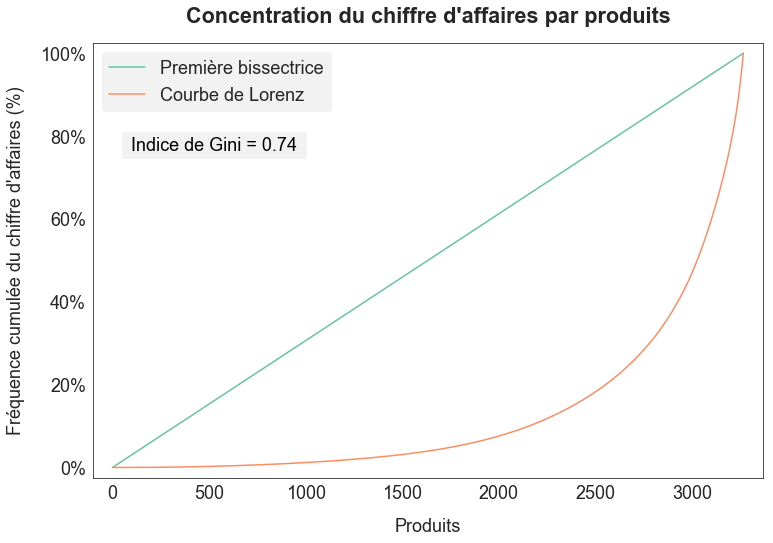

In [185]:
fig = plt.figure()
ax = plt.axes()
ax.plot(np.linspace(0,1,len(lorenz)), label="Première bissectrice")  # première bissectrice
ax.plot(lorenz, label="Courbe de Lorenz")  # courbe de lorenz
ax.set_ylim([-0.025,1.025])
ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:.0%}'))
ax.set_ylabel("Fréquence cumulée du chiffre d'affaires (%)")
ax.set_xlim([-100,len(lorenz)+100])
ax.set_xlabel("Produits")
ax.legend(loc="upper left")
plt.text(525,0.8," Indice de Gini = {:.2f} ".format(gini),\
         horizontalalignment='center',verticalalignment='top',color='black',backgroundcolor=(0.95,0.95,0.95))
plt.title("Concentration du chiffre d'affaires par produits")
plt.savefig("projet04_232_concentration_produits_CA.png")
plt.show()

Le chiffre d'affaires est concentré sur une petite partie de produits.

In [186]:
listdata = analyse_produit["nombre_produits_vendus"].values
lorenz = np.cumsum(np.sort(listdata)) / listdata.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
S = 0.5 - aire_ss_courbe # aire entre la 1e bissectrice et la courbe de Lorenz
gini = 2 * S

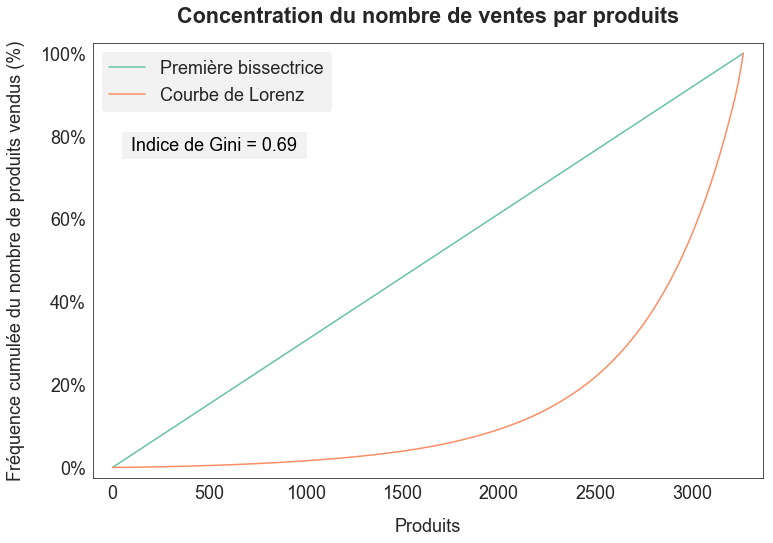

In [187]:
fig = plt.figure()
ax = plt.axes()
ax.plot(np.linspace(0,1,len(lorenz)), label="Première bissectrice")  # première bissectrice
ax.plot(lorenz, label="Courbe de Lorenz")  # courbe de lorenz
ax.set_ylim([-0.025,1.025])
ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:.0%}'))
ax.set_ylabel("Fréquence cumulée du nombre de produits vendus (%)")
ax.set_xlim([-100,len(lorenz)+100])
ax.set_xlabel("Produits")
ax.legend(loc="upper left")
plt.text(525,0.8," Indice de Gini = {:.2f} ".format(gini),\
         horizontalalignment='center',verticalalignment='top',color='black',backgroundcolor=(0.95,0.95,0.95))
plt.title("Concentration du nombre de ventes par produits")
plt.show()

# Mission 3 : Etude des corrélations

Pour l'étude des corrélations, je supprime les 4 meilleurs clients car ils présentent des caractéristiques très aytpiques en termes de nombre de commandes et de produits achetés, et donc de chiffre d'affaires généré.  
Je supprime ces 4 clients dans les dataframes data, panier et analyse_recurrence.

In [188]:
data = data_clean[~data_clean.client_id.isin(liste_clients_atypiques)]
panier = panier_clean[~panier_clean.client_id.isin(liste_clients_atypiques)]
analyse_recurrence = analyse_recurrence[~analyse_recurrence.client_id.isin(liste_clients_atypiques)]

Avant de passer à l'étude des corrélations, je recalcule les valeurs du résumé des 12 derniers mois sans les 4 plus gros clients.

In [189]:
other_data = [data[data.year_month != "202110"].price.sum(), len(data[data.year_month != "202110"]), \
              len(panier[panier.year_month != "202110"]), panier[panier.year_month != "202110"].montant_panier.mean()]
oct2021_data = [data[data.year_month.isin(["202109","202111"])].price.sum() / 2, \
                len(data[data.year_month.isin(["202109","202111"])]) / 2, \
                len(panier[panier.year_month.isin(["202109","202111"])]) / 2, \
                panier[panier.year_month.isin(["202109","202111"])].montant_panier.mean()]
resume_data["corrigees_4clients_oct2021"] = [other_data[0] + oct2021_data[0], other_data[1] + oct2021_data[1] , \
                                     other_data[2] + oct2021_data[2], (other_data[3] * 11/12) + (oct2021_data[3] / 12)]

In [190]:
resume_data.applymap('{:,.2f}'.format)

donnees_non_corrigées corrigees_oct2021  \
chiffre_affaires                5,797,640.73      5,986,272.66   
nombre_produits_vendus            336,816.00        346,000.50   
nombre_commandes                  169,194.00        172,369.00   
panier_moyen                           34.27             34.73   

                       corrigees_4clients_oct2021  
chiffre_affaires                     5,539,357.49  
nombre_produits_vendus                 322,215.50  
nombre_commandes                       160,771.50  
panier_moyen                                34.46

Je recalcule aussi le chiffre d'affaires en fonction du jour de la semaine (sans le mois d'octobre) sans les 4 gros clients, afin de voir s'ils biaisent cette variable.

In [191]:
temp = panier[panier.year_month!="202110"]

In [192]:
analyse_jour = temp.groupby("day_of_week")[["montant_panier","nombre_produits_panier"]].sum() / 11.0
analyse_jour.columns = ["chiffre_affaires","nombre_produits_vendus"]
analyse_jour["prix_moyen_produit"] = analyse_jour.chiffre_affaires / \
                                                analyse_jour.nombre_produits_vendus
analyse_jour["nombre_ventes"] = temp.groupby("day_of_week")["session_id"].count() / 11.0
analyse_jour["panier_moyen"] = analyse_jour.chiffre_affaires / analyse_jour.nombre_ventes
analyse_jour["nombre_moyen_produits"] = analyse_jour.nombre_produits_vendus / \
                                                analyse_jour.nombre_ventes
analyse_jour["age_moyen"] = temp.groupby("day_of_week")["client_age"].mean()
analyse_jour["duree_moyenne_session"] = temp[temp.nombre_produits_panier > 1].\
                                    groupby("day_of_week")["duree_session"].mean(numeric_only=False)
reorderlist = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
analyse_jour = analyse_jour.reindex(reorderlist)
analyse_jour

chiffre_affaires  nombre_produits_vendus  prix_moyen_produit  \
day_of_week                                                                 
Monday           67705.192727             3915.818182           17.290178   
Tuesday          66182.787273             3817.272727           17.337715   
Wednesday        65572.708182             3844.363636           17.056843   
Thursday         66446.670909             3859.909091           17.214569   
Friday           65581.025455             3759.545455           17.443871   
Saturday         64631.614545             3743.090909           17.266910   
Sunday           64640.910000             3751.545455           17.230475   

             nombre_ventes  panier_moyen  nombre_moyen_produits  age_moyen  \
day_of_week                                                                  
Monday         1956.000000     34.614107               2.001952  46.154861   
Tuesday        1923.454545     34.408293               1.984592  46.160838   
Wednesday      1914.909091     34.243249               2.007596  46.423376   
Thursday       1925.727273     34.504715               2.004390  45.969834   
Friday         1892.545455     34.652286               1.986502  46.111826   
Saturday       1872.545455     34.515378               1.998932  46.278959   
Sunday         1882.363636     34.340288               1.992997  46.168067   

            duree_moyenne_session  
day_of_week                        
Monday            00:26:17.692519  
Tuesday           00:26:08.024999  
Wednesday         00:26:33.997742  
Thursday          00:26:07.677763  
Friday            00:25:53.450954  
Saturday          00:26:30.110694  
Sunday            00:26:02.675563

In [193]:
sns.set_palette(sns.light_palette("navy"))
liste_couleurs = sns.color_palette()

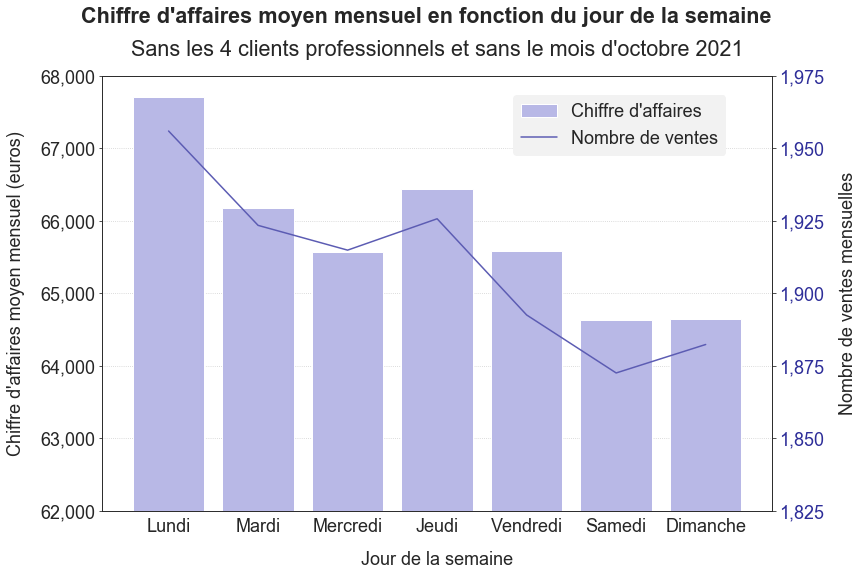

In [194]:
fig = plt.figure()
ax1 = plt.axes()
ax1.bar(analyse_jour.index, analyse_jour.chiffre_affaires, label="Chiffre d'affaires", color=liste_couleurs[1])
ax1.set_ylabel("Chiffre d'affaires moyen mensuel (euros)")
ax1.set_ylim([62000,68000])
ax1.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:,.0f}'))
#ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot(analyse_jour.index, analyse_jour.nombre_ventes, label="Nombre de ventes", color=liste_couleurs[3])
ax2.set_ylabel("Nombre de ventes mensuelles")
ax2.set_ylim([1825,1975])
ax2.yaxis.set_ticks(np.arange(1825, 1976, 25))
ax2.set_yticklabels(np.arange(1825, 1976, 25), color=liste_couleurs[4])
ax2.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:,.0f}'))
#ax2.legend(loc='upper right')
ax1.set_xlabel("Jour de la semaine")
ax1.set_xticklabels(["Lundi","Mardi","Mercredi","Jeudi","Vendredi","Samedi","Dimanche"])
ax1.grid(axis="y", linestyle=":")
fig.legend(loc="upper right", bbox_to_anchor=(0.85,0.85))
plt.suptitle("Chiffre d'affaires moyen mensuel en fonction du jour de la semaine", y=1.0)
plt.title("Sans les 4 clients professionnels et sans le mois d'octobre 2021", fontweight='regular')
plt.savefig("projet04_212c_CA_jour.png")
plt.show()

## 3.1 Corrélation entre le sexe des clients et les catégories de produits achetés

Le sexe et la catégorie sont deux variables qualitatives. Il faut donc réaliser une analyse bi-variée à travers un tableau de contingence et le tableau des chi.

In [195]:
nb_sexe_categorie = data[["sex","categ"]].pivot_table(index="sex", columns="categ", aggfunc=len)

In [196]:
contingence_sexe_categorie = nb_sexe_categorie.copy()
tx = data["sex"].value_counts()
ty = data["categ"].value_counts()
contingence_sexe_categorie.loc[:,"total"] = tx
contingence_sexe_categorie.loc["total"] = ty
contingence_sexe_categorie.loc["total","total"] = len(data)
contingence_sexe_categorie

categ         0         1        2     total
sex                                         
f      101206.0   53774.0   8122.0  163102.0
m       94064.0   48851.0   7634.0  150549.0
total  195270.0  102625.0  15756.0  313651.0

In [197]:
expected_sexe_categorie = st.contingency.expected_freq(nb_sexe_categorie)
expected_sexe_categorie = pd.DataFrame(expected_sexe_categorie, index=nb_sexe_categorie.index, columns=nb_sexe_categorie.columns)
expected_sexe_categorie

categ              0             1            2
sex                                            
f      101542.566547  53366.138638  8193.294815
m       93727.433453  49258.861362  7562.705185

In [198]:
contributions_sexe_categorie = (nb_sexe_categorie.fillna(0) - expected_sexe_categorie)**2 / expected_sexe_categorie
chi_n = contributions_sexe_categorie.sum().sum()
contributions_sexe_categorie = contributions_sexe_categorie / chi_n
contributions_sexe_categorie

categ         0         1         2
sex                                
f      0.110333  0.308298  0.061358
m      0.119533  0.334005  0.066474

In [199]:
print("Le chi n vaut {}".format(chi_n))

Le chi n vaut 10.11086551372657


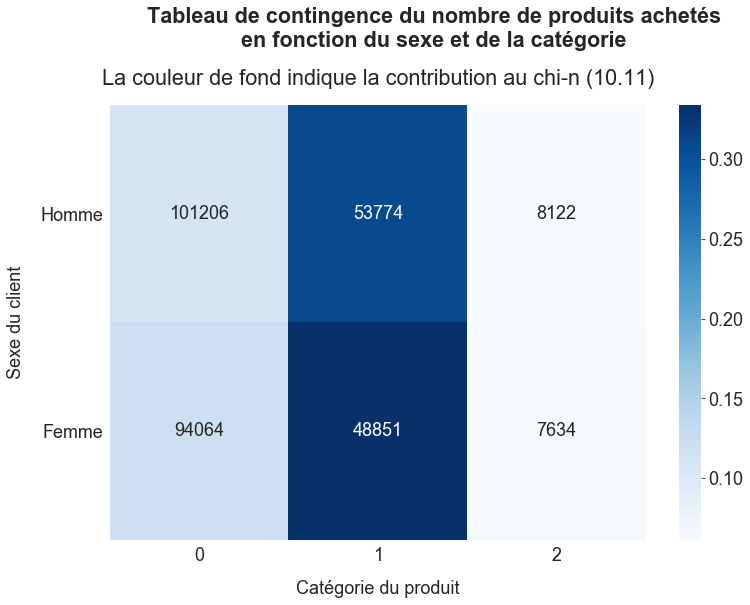

In [200]:
fig = plt.figure()
ax = plt.axes()
ax = sns.heatmap(contributions_sexe_categorie, annot=nb_sexe_categorie, cmap='Blues', fmt='g')
ax.set_ylabel("Sexe du client")
ax.set_yticklabels(["Homme","Femme"], rotation=0)
ax.set_xlabel("Catégorie du produit")
plt.suptitle("Tableau de contingence du nombre de produits achetés\nen fonction du sexe et de la catégorie", y=1.05)
plt.title("La couleur de fond indique la contribution au chi-n ({:.2f})".format(chi_n),  fontweight='regular')
plt.savefig("projet04_301_correlation_sexe_categorie.png")
plt.show()

Sur la heatmap, il ne semble pas y avoir de lien évident entre le sexe des clients et la catégorie de produits achetés. J'effectue un test du chi2 pour confirmer cette absence de relation.

In [201]:
chi2, pvalue, dof, expected_freq = st.chi2_contingency(nb_sexe_categorie)
pvalue

0.006374607510181767

Le test du chi2 teste l'hypothèse d'indépendance des fréquences observées dans le tableau de contingence.  
La pvalue est faible (<0.01). Elle est inférieure à 1%, ce qui signifie que l'on rejette l'hypothèse d'indépendance avec un risque d'erreur de 1%.  
Contrairement à ce que la heatmap laisse penser, le sexe et la catégorie du produit sont dépendants. Analysons les valeurs résiduelles du test.

In [202]:
nb_residuals = nb_sexe_categorie.fillna(0) - expected_sexe_categorie
nb_residuals

categ           0           1          2
sex                                     
f     -336.566547  407.861362 -71.294815
m      336.566547 -407.861362  71.294815

In [203]:
nb_adjusted_residuals = nb_residuals / np.ravel(nb_residuals).std()
nb_adjusted_residuals

categ        0         1         2
sex                               
f     -1.09252  1.323949 -0.231428
m      1.09252 -1.323949  0.231428

Le test du chi2 montre un lien entre le sexe des clients et les catégories de produits achetés. Les valeurs résiduelles du test permettent de voir que les femmes achètent plus de livres de catégorie 1 alors que les hommes achètent plus de livres de catégories 0. La différence est moins marquée pour les produits de catégorie 2.

## 3.2 Corrélation entre l'âge du client et le montant total des achats

L'âge des clients et le montant total des achats sont deux variables quantitatives. Je peux calculer la corrélation linéaire et le coefficient de détermination.  
Je choisis d'utiliser le panier moyen pour représenter le montant total des achats.

In [204]:
data_age_panier = panier[["client_age","montant_panier"]]
# calcul du coefficient de corrélation r
correlpearson_age_panier = st.pearsonr(data_age_panier.client_age, data_age_panier.montant_panier)[0]
correlspearman_age_panier = st.spearmanr(data_age_panier.client_age, data_age_panier.montant_panier)[0]
print(correlpearson_age_panier, correlspearman_age_panier)

-0.3355876425640212 -0.34541369954468276


In [205]:
# estimation de la relation et calcul du coefficient de détermination (devrait être = à r²)
myY = data_age_panier["montant_panier"]
myX = data_age_panier[["client_age"]]
myX = myX.copy()
myX["intercept"] = 1.
model = sm.OLS(myY, myX)
results = model.fit()
slope, intercept = results.params["client_age"], results.params["intercept"]
r_value_squared, p_value, std_err = results.rsquared, results.pvalues["client_age"], results.bse["client_age"]

print("Le coefficient de corrélation linéaire (Pearson) entre l'âge du client et le montant du panier vaut {:.3f}.".\
      format(correlpearson_age_panier))
print("Le coefficient de corrélation de rang (Spearman) entre l'âge du client et le montant du panier vaut {:.3f}.".\
      format(correlspearman_age_panier))
print("La relation est estimée par l'équation : montant du panier = {:.5f} * âge du client + {:.5f}".\
      format(slope, intercept))
print("La p-value du test de corrélation (hypothèse H0:r=0 H1:r!=0) vaut {:.3f}".format(p_value))

Le coefficient de corrélation linéaire (Pearson) entre l'âge du client et le montant du panier vaut -0.336.
Le coefficient de corrélation de rang (Spearman) entre l'âge du client et le montant du panier vaut -0.345.
La relation est estimée par l'équation : montant du panier = -0.69843 * âge du client + 66.17812
La p-value du test de corrélation (hypothèse H0:r=0 H1:r!=0) vaut 0.000


In [206]:
sns.set_style("whitegrid")
sns.set_palette("Set2")
liste_couleurs = sns.color_palette()

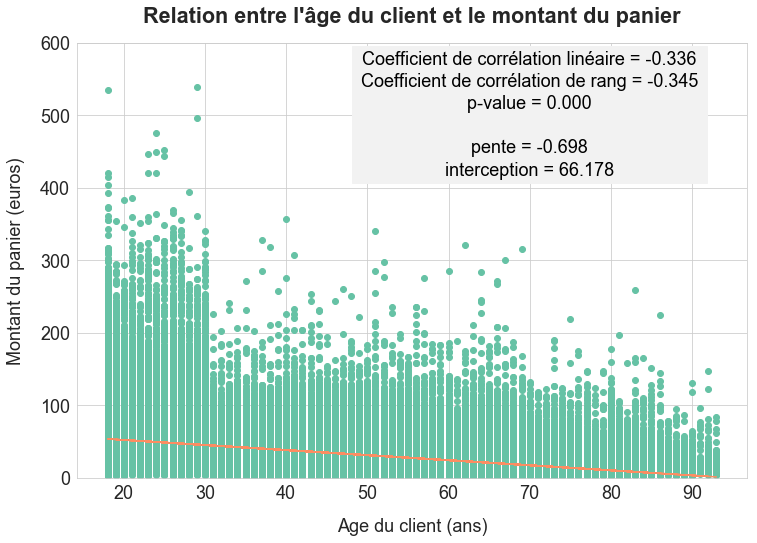

In [207]:
fig = plt.figure()
ax = plt.axes()
ax.plot(data_age_panier.client_age, data_age_panier.montant_panier,'o')
ax.plot(data_age_panier.client_age.unique(), [slope*x+intercept for x in data_age_panier.client_age.unique()])
ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylabel("Montant du panier (euros)")
ax.set_ylim([0,600])
ax.set_xlabel("Age du client (ans)")
plt.text(70,590," Coefficient de corrélation linéaire = {:.3f} \n Coefficient de corrélation de rang = {:.3f} \np-value = {:.3f}\n\n\
pente = {:.3f}\ninterception = {:.3f}".format(correlpearson_age_panier, correlspearman_age_panier, p_value, slope, intercept),\
         horizontalalignment='center',verticalalignment='top', linespacing=1.3,  color='black', backgroundcolor=(0.95,0.95,0.95))
plt.title("Relation entre l'âge du client et le montant du panier")
plt.savefig("projet04_302_correlation_ageclient_panier.png")
plt.show()

Le coefficient de corrélation linéaire est négatif (-0.336). Le test de corrélation donne une p-value inférieure à 0.001. Nous rejetons l'hypothèse que le coefficient de corrélation linéaire est égale à 0. Il y a donc une corrélation entre l'âge du client et le montant du panier.  
Il y a beaucoup de points. Il est difficile de déterminer quels sont les outliers.

Afin d'obtenir un graphique et des données plus lisibles, je décide de réaliser la même étude sur le montant moyen du panier et l'âge pour chaque client. J'effectue donc un partitionnement par client_id.

In [208]:
data_age_panier = panier[["client_id","client_age","montant_panier"]].groupby("client_id").mean()
data_age_panier.reset_index(inplace=True)
# calcul du coefficient de corrélation r
correlpearson_age_panier = st.pearsonr(data_age_panier.client_age, data_age_panier.montant_panier)[0]
correlspearman_age_panier = st.spearmanr(data_age_panier.client_age, data_age_panier.montant_panier)[0]
print(correlpearson_age_panier, correlspearman_age_panier)

-0.635184156039113 -0.7139548194040383


In [209]:
# estimation de la relation et calcul du coefficient de détermination (devrait être = à r²)
myY = data_age_panier["montant_panier"]
myX = data_age_panier[["client_age"]]
myX = myX.copy()
myX["intercept"] = 1.
model = sm.OLS(myY, myX)
results = model.fit()
slope, intercept = results.params["client_age"], results.params["intercept"]
r_value_squared, p_value, std_err = results.rsquared, results.pvalues["client_age"], results.bse["client_age"]

print("Le coefficient de corrélation linéaire (Pearson) entre l'âge du client et le montant moyen du panier vaut {:.3f}.".\
      format(correlpearson_age_panier))
print("Le coefficient de corrélation de rang (Spearman) entre l'âge du client et le montant moyen du panier vaut {:.3f}.".\
      format(correlspearman_age_panier))
print("La relation est estimée par l'équation : montant moyen du panier = {:.5f} * âge du client + {:.5f}".\
      format(slope, intercept))
print("La p-value du test de corrélation (hypothèse H0:r=0 H1:r!=0) vaut {:.3f}".format(p_value))

Le coefficient de corrélation linéaire (Pearson) entre l'âge du client et le montant moyen du panier vaut -0.635.
Le coefficient de corrélation de rang (Spearman) entre l'âge du client et le montant moyen du panier vaut -0.714.
La relation est estimée par l'équation : montant moyen du panier = -0.85052 * âge du client + 77.30805
La p-value du test de corrélation (hypothèse H0:r=0 H1:r!=0) vaut 0.000


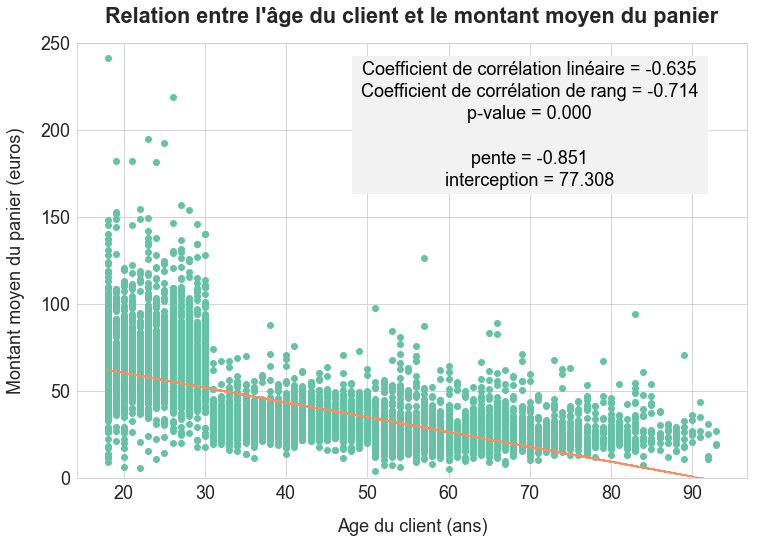

In [210]:
fig = plt.figure()
ax = plt.axes()
ax.plot(data_age_panier.client_age, data_age_panier.montant_panier,'o')
ax.plot(data_age_panier.client_age.unique(), [slope*x+intercept for x in data_age_panier.client_age.unique()])
ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylabel("Montant moyen du panier (euros)")
ax.set_ylim([0,250])
ax.set_xlabel("Age du client (ans)")
plt.text(70,240," Coefficient de corrélation linéaire = {:.3f} \n Coefficient de corrélation de rang = {:.3f} \np-value = {:.3f}\n\n\
pente = {:.3f}\ninterception = {:.3f}".format(correlpearson_age_panier, correlspearman_age_panier, p_value, slope, intercept),\
         horizontalalignment='center',verticalalignment='top', linespacing=1.3,  color='black', backgroundcolor=(0.95,0.95,0.95))
plt.title("Relation entre l'âge du client et le montant moyen du panier")
plt.savefig("projet04_303_correlation_ageclient_paniermoyen.png")
plt.show()

Le coefficient de corrélation est négatif et assez élevé (-0.635). Le test de corrélation donne une p_value inférieure à 0.001. On rejette l'hypothèse que le coefficient de corrélation est nul.  
**La relation entre l'âge du client et le montant moyen du panier est confirmée. Plus le client est jeune, plus son panier moyen est élevé.**  
Le coefficient de corrélation de rang (Spearman) a une valeur encore plus négative (-0.714). Cela signifie que la baisse du panier moyen tend à s'accélérer à mesure que l'âge du client augmente.

Pour finir, je réalise une dernière étude de la corrélation entre l'âge du client et le montant moyen du panier, en regroupant tous les clients du même âge en un seul point. Mon attribut de partitionnement est donc maintenant client_age.

In [211]:
data_age_panier = panier[["client_age","montant_panier"]].groupby("client_age").mean()
data_age_panier = pd.DataFrame(data_age_panier).reset_index()
# calcul du coefficient de corrélation r
correlpearson_age_panier = st.pearsonr(data_age_panier.client_age, data_age_panier.montant_panier)[0]
correlspearman_age_panier = st.spearmanr(data_age_panier.client_age, data_age_panier.montant_panier)[0]
print(correlpearson_age_panier, correlspearman_age_panier)

-0.748181807084963 -0.7752836637047164


In [212]:
# estimation de la relation et calcul du coefficient de détermination (devrait être = à r²)
myY = data_age_panier["montant_panier"]
myX = data_age_panier[["client_age"]]
myX = myX.copy()
myX["intercept"] = 1.
model = sm.OLS(myY, myX)
results = model.fit()
slope, intercept = results.params["client_age"], results.params["intercept"]
r_value_squared, p_value, std_err = results.rsquared, results.pvalues["client_age"], results.bse["client_age"]

print("Le coefficient de corrélation linéaire (Pearson) entre l'âge et le montant moyen des paniers vaut {:.3f}.".\
      format(correlpearson_age_panier))
print("Le coefficient de corrélation de rang (Spearman) entre l'âge et le montant moyen des paniers vaut {:.3f}.".\
      format(correlspearman_age_panier))
print("La relation est estimée par l'équation : montant moyen du panier = {:.5f} * âge + {:.5f}".\
      format(slope, intercept))
print("La p-value du test de corrélation (hypothèse H0:r=0 H1:r!=0) vaut {:.3f}".format(p_value))

Le coefficient de corrélation linéaire (Pearson) entre l'âge et le montant moyen des paniers vaut -0.748.
Le coefficient de corrélation de rang (Spearman) entre l'âge et le montant moyen des paniers vaut -0.775.
La relation est estimée par l'équation : montant moyen du panier = -0.57787 * âge + 66.09777
La p-value du test de corrélation (hypothèse H0:r=0 H1:r!=0) vaut 0.000


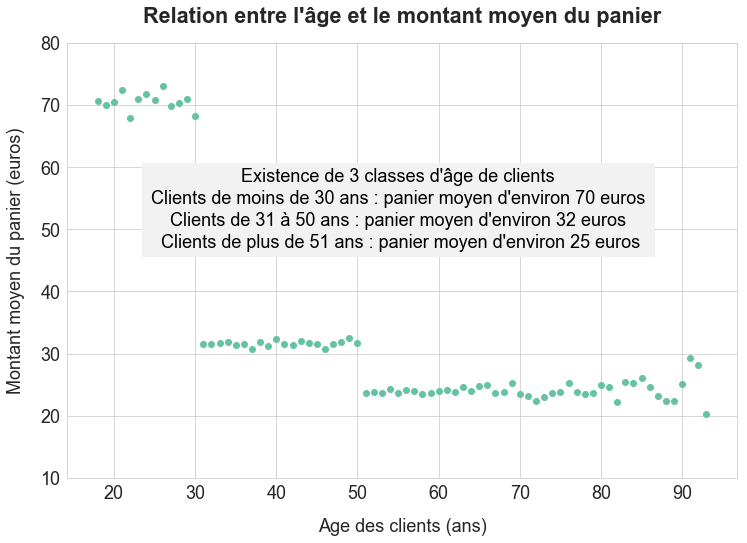

In [213]:
fig = plt.figure()
ax = plt.axes()
ax.plot(data_age_panier.client_age, data_age_panier.montant_panier,'o')
#ax.plot(data_age_panier.client_age, [slope*x+intercept for x in data_age_panier.client_age])
ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylabel("Montant moyen du panier (euros)")
ax.set_ylim([10,80])
ax.set_xlabel("Age des clients (ans)")
plt.text(55,60," Existence de 3 classes d'âge de clients \n Clients de moins de 30 ans : panier moyen d'environ 70 euros \
\n Clients de 31 à 50 ans : panier moyen d'environ 32 euros \n Clients de plus de 51 ans : panier moyen d'environ 25 euros",\
         horizontalalignment='center',verticalalignment='top', linespacing=1.3,  color='black', backgroundcolor=(0.95,0.95,0.95))
plt.title("Relation entre l'âge et le montant moyen du panier")
plt.savefig("projet04_304_correlation_age_paniermoyen.png")
plt.show()

Les coefficients de corrélation linéaire (-0.748) et de rang (-0.775) sont encore plus forts lorsque l'on regroupe les données par âge. Le test de corrélation, et sa p-value inférieure à 0.001, confirme la significativité de la relation entre l'âge des clients et le montant moyen des paniers.

Le graphique permet d'observer que cette corrélation est plus par paliers que linéaire : les moins de 30 ans ont un panier moyen légèrement supérieur à 70 euros, les 31 à 50 ans un panier moyen d'environ 32 euros, tandis que les plus de 51 ans sont caractérisés par un panier moyen d'environ 25 euros.  
**Cette analyse permet de créer trois groupes de clients en fonction de leur appartenance à une classe d'âge : les 30 ans et moins, les 31 à 50 ans, les 51 ans et plus.**

## 3.3 Corrélation entre l'âge des clients et la fréquence des achats

Pour analyser la corrélation entre l'âge des clients et le fréquence des achats, je vais utiliser le dataframe analyse_recurrence, qui est basé sur le dataframe clients.  
Je ne vais pas utiliser la colonne code_frequence, car cela impliquerait d'estimer l'âge à partir de la fréquence d'achat. Or la logique veut plutôt d'estimer la fréquence des achats à partir de l'âge. Je vais donc y ajouter une colonne où je vais diviser le nombre de commandes par le nombre maximum de mois (calculé sur la base de la date de la première commande).  
J'analyse à nouveau la relation entre deux variables quantitatives : l'âge et le nombre moyen de commandes par mois.

In [214]:
analyse_recurrence.head()

client_id sex  birth  age  nombre_commandes  CA_client  \
0    c_4410   f   1967   55              25.0     575.20   
1    c_7839   f   1975   47               9.0     276.05   
2    c_1699   f   1984   38               3.0      99.49   
3    c_5961   f   1962   60              27.0     545.73   
4    c_5320   m   1943   79               9.0     203.47   

      date_premiere_commande mois_premiere_commande  \
0 2021-03-13 21:35:55.949042                 202103   
1 2021-03-28 16:20:21.404637                 202103   
2 2021-03-13 21:28:34.062719                 202103   
3 2021-03-13 05:13:45.852164                 202103   
4 2021-03-10 13:35:12.836541                 202103   

  trimestre_premiere_commande semestre_premiere_commande  ...  \
0                       20211                      20211  ...   
1                       20211                      20211  ...   
2                       20211                      20211  ...   
3                       20211                      20211  ...   
4                       20211                      20211  ...   

   nombre_mois_max  nombre_trimestres_max  nombre_semestres_max  \
0               12                      5                     3   
1               12                      5                     3   
2               12                      5                     3   
3               12                      5                     3   
4               12                      5                     3   

   tous_les_mois  tous_les_trimestres  tous_les_semestres  \
0          False                 True               False   
1          False                False               False   
2          False                False               False   
3           True                False               False   
4          False                False               False   

   plus_d_une_commande  une_seule_commande  code_frequence  tranche_age  
0                False               False               t     (50, 95]  
1                 True               False               p     (30, 50]  
2                 True               False               p     (30, 50]  
3                False               False               m     (50, 95]  
4                 True               False               p     (50, 95]  

[5 rows x 23 columns]

In [215]:
analyse_recurrence["nombre_commandes_par_mois"] = analyse_recurrence.nombre_commandes / analyse_recurrence.nombre_mois_max
data_age_freq = analyse_recurrence[["age","nombre_commandes_par_mois"]]

# calcul du coefficient de corrélation r
correlpearson_age_freq = st.pearsonr(data_age_freq.age, data_age_freq.nombre_commandes_par_mois)[0]
correlspearman_age_freq = st.spearmanr(data_age_freq.age, data_age_freq.nombre_commandes_par_mois)[0]
print(correlpearson_age_freq, correlspearman_age_freq)

0.166500449453984 0.21646051533130295


In [216]:
# estimation de la relation et calcul du coefficient de détermination (devrait être = à r²)
myY = data_age_freq["nombre_commandes_par_mois"]
myX = data_age_freq[["age"]]
myX = myX.copy()
myX["intercept"] = 1.
model = sm.OLS(myY, myX)
results = model.fit()
slope, intercept = results.params["age"], results.params["intercept"]
r_value_squared, p_value, std_err = results.rsquared, results.pvalues["age"], results.bse["age"]

print("Le coefficient de corrélation linéaire (Pearson) entre l'âge du client et le nombre de commandes par mois vaut {:.3f}.".\
      format(correlpearson_age_freq))
print("Le coefficient de corrélation de rang (Spearman) entre l'âge du client et le nombre de commandes par mois vaut {:.3f}.".\
      format(correlspearman_age_freq))
print("La relation est estimée par l'équation : nombre de commandes par mois = {:.5f} * âge du client + {:.5f}".\
      format(slope, intercept))
print("La p-value du test de corrélation (hypothèse H0:r=0 H1:r!=0) vaut {:.3f}".format(p_value))

Le coefficient de corrélation linéaire (Pearson) entre l'âge du client et le nombre de commandes par mois vaut 0.167.
Le coefficient de corrélation de rang (Spearman) entre l'âge du client et le nombre de commandes par mois vaut 0.216.
La relation est estimée par l'équation : nombre de commandes par mois = 0.01224 * âge du client + 1.04291
La p-value du test de corrélation (hypothèse H0:r=0 H1:r!=0) vaut 0.000


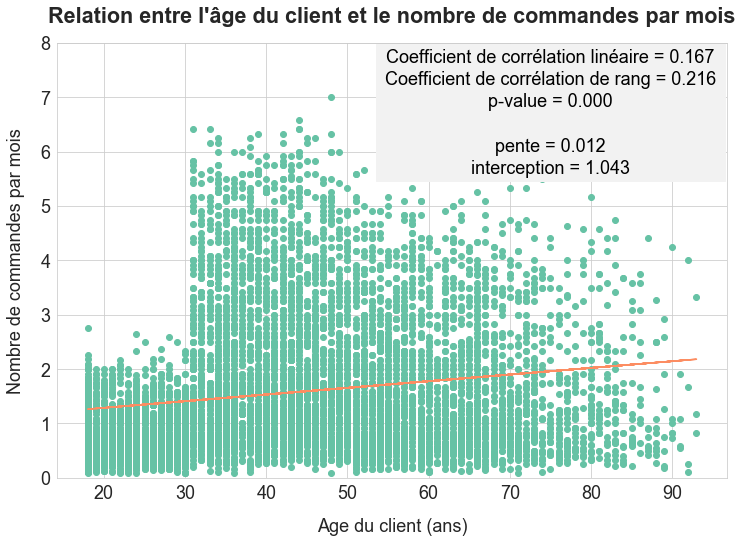

In [217]:
fig = plt.figure()
ax = plt.axes()
ax.plot(data_age_freq.age, data_age_freq.nombre_commandes_par_mois,'o')
ax.plot(data_age_freq.age.unique(), [slope*x+intercept for x in data_age_freq.age.unique()])
#ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:.0f}'))
ax.set_ylabel("Nombre de commandes par mois")
ax.set_ylim([0,8])
ax.set_xlabel("Age du client (ans)")
plt.text(75,7.9," Coefficient de corrélation linéaire = {:.3f} \n Coefficient de corrélation de rang = {:.3f} \np-value = {:.3f}\n\n\
pente = {:.3f}\ninterception = {:.3f}".format(correlpearson_age_freq, correlspearman_age_freq, p_value, slope, intercept),\
         horizontalalignment='center',verticalalignment='top', linespacing=1.3,  color='black', backgroundcolor=(0.95,0.95,0.95))
plt.title("Relation entre l'âge du client et le nombre de commandes par mois")
plt.savefig("projet04_305_correlation_ageclient_nbcommandes.png")
plt.show()

Le coefficient de corrélation linéaire est faible (0.167). Cependant le test de corrélation aboutit à une p-value inférieur à 0.001. Le coefficient de corrélation linéaire est donc significativement différent de 0. Une relation croissante entre l'âge et le nombre de commandes par mois existe, mais elle est faible.

J'effectue maintenant la même analyse en regroupant les données par âge pour obtenir le nombre moyen de commandes par mois pour chaque âge.

In [218]:
data_age_freq = analyse_recurrence[["age","nombre_commandes_par_mois"]].groupby("age").mean().reset_index()

# calcul du coefficient de corrélation r
correlpearson_age_freq = st.pearsonr(data_age_freq.age, data_age_freq.nombre_commandes_par_mois)[0]
correlspearman_age_freq = st.spearmanr(data_age_freq.age, data_age_freq.nombre_commandes_par_mois)[0]
print(correlpearson_age_freq, correlspearman_age_freq)

0.16981783656156707 -0.002406015037593985


In [219]:
# estimation de la relation et calcul du coefficient de détermination (devrait être = à r²)
myY = data_age_freq["nombre_commandes_par_mois"]
myX = data_age_freq[["age"]]
myX = myX.copy()
myX["intercept"] = 1.
model = sm.OLS(myY, myX)
results = model.fit()
slope, intercept = results.params["age"], results.params["intercept"]
r_value_squared, p_value, std_err = results.rsquared, results.pvalues["age"], results.bse["age"]

print("Le coefficient de corrélation linéaire (Pearson) entre l'âge et le nombre moyen de commandes par mois vaut {:.3f}.".\
      format(correlpearson_age_freq))
print("Le coefficient de corrélation de rang (Spearman) entre l'âge et le nombre moyen de commandes par mois vaut {:.3f}.".\
      format(correlspearman_age_freq))
print("La relation est estimée par l'équation : nombre moyen de commandes par mois = {:.5f} * âge + {:.5f}".\
      format(slope, intercept))
print("La p-value du test de corrélation (hypothèse H0:r=0 H1:r!=0) vaut {:.3f}".format(p_value))

Le coefficient de corrélation linéaire (Pearson) entre l'âge et le nombre moyen de commandes par mois vaut 0.170.
Le coefficient de corrélation de rang (Spearman) entre l'âge et le nombre moyen de commandes par mois vaut -0.002.
La relation est estimée par l'équation : nombre moyen de commandes par mois = 0.00330 * âge + 1.38455
La p-value du test de corrélation (hypothèse H0:r=0 H1:r!=0) vaut 0.142


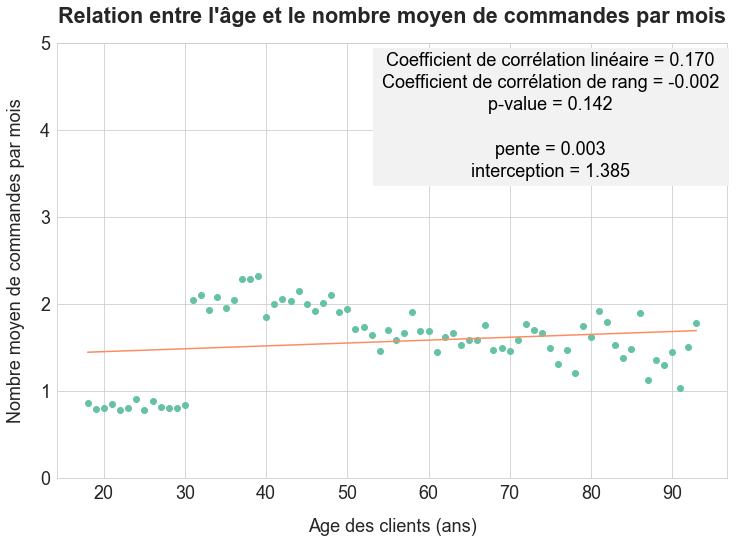

In [220]:
fig = plt.figure()
ax = plt.axes()
ax.plot(data_age_freq.age, data_age_freq.nombre_commandes_par_mois,'o')
ax.plot(data_age_freq.age, [slope*x+intercept for x in data_age_freq.age])
#ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:.0f}'))
ax.set_ylabel("Nombre moyen de commandes par mois")
ax.set_ylim([0,5])
ax.set_xlabel("Age des clients (ans)")
plt.text(75,4.9," Coefficient de corrélation linéaire = {:.3f} \n Coefficient de corrélation de rang = {:.3f} \np-value = {:.3f}\n\n\
pente = {:.3f}\ninterception = {:.3f}".format(correlpearson_age_freq, correlspearman_age_freq, p_value, slope, intercept),\
         horizontalalignment='center',verticalalignment='top', linespacing=1.3,  color='black', backgroundcolor=(0.95,0.95,0.95))
plt.title("Relation entre l'âge et le nombre moyen de commandes par mois")
plt.savefig("projet04_306_correlation_ageclient_nbmoyencommandes.png")
plt.show()

**Le coefficient de corrélation a une valeur faible (0.17), proche de 0.** Il semble que le nombre de commandes par mois n'est pas lié à l'âge des clients.  
Cette absence de relation est validée par la forte valeur de la p_value (>5%). **Il n'y a donc pas de relation entre l'âge et le nombre moyen de commandes par mois.**  
Le graphique ci-dessus confirme ce résultat. Il illustre cependant un élément notable : les moins de 30 ans commandent en moyenne moins souvent que les plus de 30 ans.

**Test avec la variable code_frequence et un modèle ANOVA**

Je réalise une autre étude basée sur la variable code_frequence de mon dataframe data_recurrence.

In [221]:
mu = analyse_recurrence["age"].mean()
classes = []
for classe in analyse_recurrence["code_frequence"].unique():
    yi_classe = analyse_recurrence[analyse_recurrence["code_frequence"] == classe]
    classes.append({'nom': classe, 'ni': len(yi_classe), 'moyenne_classe': yi_classe["age"].mean(), \
                    'alpha': yi_classe["age"].mean() - mu})
SCT = sum([(yj - mu)**2 for yj in analyse_recurrence["age"]])
SCE = sum([classe['ni'] * (classe['moyenne_classe'] - mu)**2 for classe in classes])
eta_squared = SCE / SCT

In [222]:
classes = pd.DataFrame(classes)
classes.index = classes.nom
classes = classes.reindex(["m","t","s","p","u"])
classes.index = ["Une commande par mois","Une commande par trimestre","Une commande par semestre",\
                 "Plusieurs commandes","Une seule commande"]
classes.columns = ["alpha", "âge moyen", "nombre de clients","nom"]
print("Le rapport de corrélation (eta squared) du modèle vaut {:.3f}.\nL'âge moyen des clients est de {:.2f} ans.\
 La valeur des alphas et de l'âge moyen pour chaque classe est :".format(eta_squared, mu))
classes.iloc[:,:-1]

Le rapport de corrélation (eta squared) du modèle vaut 0.027.
L'âge moyen des clients est de 43.74 ans. La valeur des alphas et de l'âge moyen pour chaque classe est :


alpha  âge moyen  nombre de clients
Une commande par mois       4.125956  47.865602               1503
Une commande par trimestre  0.666458  44.406104               4718
Une commande par semestre  -4.123833  39.615813                898
Plusieurs commandes        -3.588066  40.151580               1392
Une seule commande         -7.621999  36.117647                 85

Le rapport de corrélation est très proche de 0. Par conséquent, il ne semble pas y avoir de relation entre l'âge et la fréquence des achats.

Vérifions cela avec un test ANOVA, qui teste l'hypothèse que les moyennes des différents groupes sont les mêmes, et donc que la fréquence des achats n'est pas liée à l'âge du client.

In [223]:
anova_age_freq = analyse_recurrence[["code_frequence","age"]]
fstats, pvalue = st.f_oneway(anova_age_freq[anova_age_freq.code_frequence=="m"].age,\
                               anova_age_freq[anova_age_freq.code_frequence=="t"].age,\
                               anova_age_freq[anova_age_freq.code_frequence=="s"].age,\
                               anova_age_freq[anova_age_freq.code_frequence=="p"].age,\
                               anova_age_freq[anova_age_freq.code_frequence=="u"].age)
print("La F Statistique du test vaut {:.2f} et sa p-value = {:.3f}".format(fstats, pvalue))

La F Statistique du test vaut 59.09 et sa p-value = 0.000


La p-value inférieure à 0.001 signifie que l'on rejette l'hypothèse testée. La fréquence des achats est donc liée à l'âge du client.  
Attention, ce test suppose que les groupes soient indépendants, qu'ils suivent une loi normale (moins de 5000 clients dans chaque groupe, donc le test de Shapiro peut être appliqué) et qu'ils aient un écart-type similaire.

In [224]:
verif_std = [anova_age_freq[anova_age_freq.code_frequence=="m"].age.std(),\
            anova_age_freq[anova_age_freq.code_frequence=="t"].age.std(),\
            anova_age_freq[anova_age_freq.code_frequence=="s"].age.std(),\
            anova_age_freq[anova_age_freq.code_frequence=="p"].age.std(),\
            anova_age_freq[anova_age_freq.code_frequence=="u"].age.std()]
verif_std

[13.112614037287186,
 17.007274405388074,
 17.95927684546986,
 18.020657060540092,
 18.387632855177596]

In [225]:
verif_normalite = [st.shapiro(anova_age_freq[anova_age_freq.code_frequence=="m"].age)[1],\
            st.shapiro(anova_age_freq[anova_age_freq.code_frequence=="t"].age)[1],\
            st.shapiro(anova_age_freq[anova_age_freq.code_frequence=="s"].age)[1],\
            st.shapiro(anova_age_freq[anova_age_freq.code_frequence=="p"].age)[1],\
            st.shapiro(anova_age_freq[anova_age_freq.code_frequence=="u"].age)[1]]
verif_normalite

[1.0327852395323191e-20,
 1.942396194021916e-29,
 2.552669070970665e-21,
 9.257526160313544e-26,
 7.205694174672317e-08]

On remarque que le test de Shapiro est rejeté pour chacun des groupes. Aucun de ces groupes ne suit une loi normale. La p-value de l'ANOVA doit être considérée avec précaution : elle n'est pas nécessairement significative. D'autant plus que le rapport de corrélation est faible, ce qui montre une relation peu marquée.

In [226]:
sns.set_style("white")

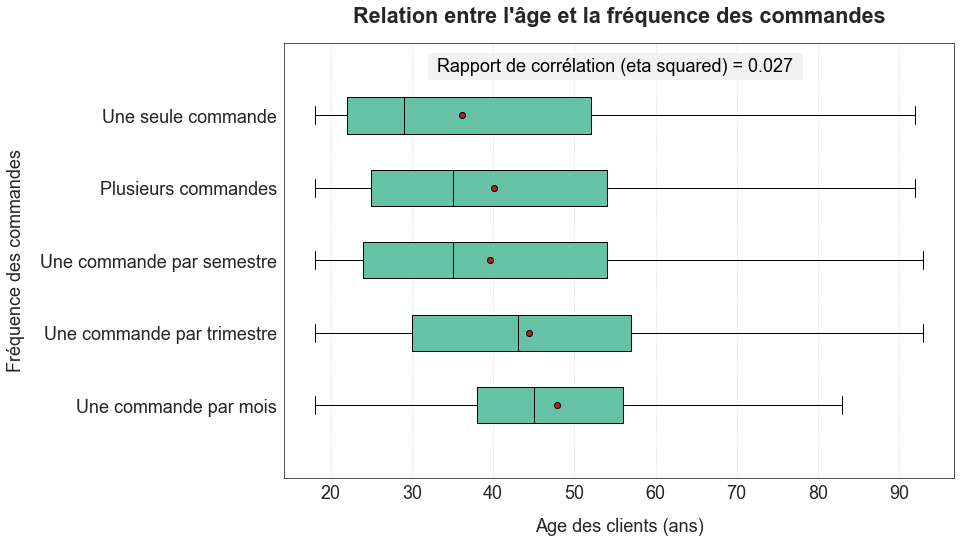

In [227]:
modalites = classes.nom
groupes = []
for m in modalites:
    groupes.append(analyse_recurrence[analyse_recurrence["code_frequence"]==m]["age"])
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
fig = plt.figure()
ax = plt.axes()
plt.boxplot(groupes, labels=classes.index, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
ax.set_ylim([0,6])
ax.set_ylabel("Fréquence des commandes")
ax.set_xlabel("Age des clients (ans)")
ax.grid(axis="x", linestyle=":")
plt.text(55,5.8," Rapport de corrélation (eta squared) = {:.3f} ".format(eta_squared),\
         horizontalalignment='center',verticalalignment='top',color='black',backgroundcolor=(0.95,0.95,0.95))
plt.title("Relation entre l'âge et la fréquence des commandes")
plt.savefig("projet04_307_correlation_age_freqcommandes.png")
plt.show()

Sur ce graphique des boites à moustache, on voit que l'âge moyen et l'âge médian augmentent avec la fréquence des commandes. Mais il confirme également que l'âge des clients permet difficilement de discriminer la fréquence des commandes.

## 3.4 Corrélation entre l'âge des clients et le nombre moyen d'articles dans le panier

Nous traitons encore deux variables quantitatives.

In [228]:
data_age_nbarticles = panier[["client_age","nombre_produits_panier"]]

# calcul du coefficient de corrélation r
correlpearson_age_nbarticles = st.pearsonr(data_age_nbarticles.client_age, data_age_nbarticles.nombre_produits_panier)[0]
correlspearman_age_nbarticles = st.spearmanr(data_age_nbarticles.client_age, data_age_nbarticles.nombre_produits_panier)[0]
print(correlpearson_age_nbarticles, correlspearman_age_nbarticles)

-0.19414590682787872 -0.241384009748006


In [229]:
# estimation de la relation et calcul du coefficient de détermination (devrait être = à r²)
myY = data_age_nbarticles["nombre_produits_panier"]
myX = data_age_nbarticles[["client_age"]]
myX = myX.copy()
myX["intercept"] = 1.
model = sm.OLS(myY, myX)
results = model.fit()
slope, intercept = results.params["client_age"], results.params["intercept"]
r_value_squared, p_value, std_err = results.rsquared, results.pvalues["client_age"], results.bse["client_age"]

print("Le coefficient de corrélation linéaire (Pearson) entre l'âge du client et le nombre de produits dans le panier vaut {:.3f}.".\
      format(correlpearson_age_nbarticles))
print("Le coefficient de corrélation de rang (Spearman) entre l'âge du client et le nombre de produits dans le panier vaut {:.3f}.".\
      format(correlspearman_age_nbarticles))
print("La relation est estimée par l'équation : nombre de produits dans le panier = {:.5f} * âge du client + {:.5f}".\
      format(slope, intercept))
print("La p-value du test de corrélation (hypothèse H0:r=0 H1:r!=0) vaut {:.3f}".format(p_value))

Le coefficient de corrélation linéaire (Pearson) entre l'âge du client et le nombre de produits dans le panier vaut -0.194.
Le coefficient de corrélation de rang (Spearman) entre l'âge du client et le nombre de produits dans le panier vaut -0.241.
La relation est estimée par l'équation : nombre de produits dans le panier = -0.01633 * âge du client + 2.74004
La p-value du test de corrélation (hypothèse H0:r=0 H1:r!=0) vaut 0.000


In [230]:
sns.set_style("whitegrid")

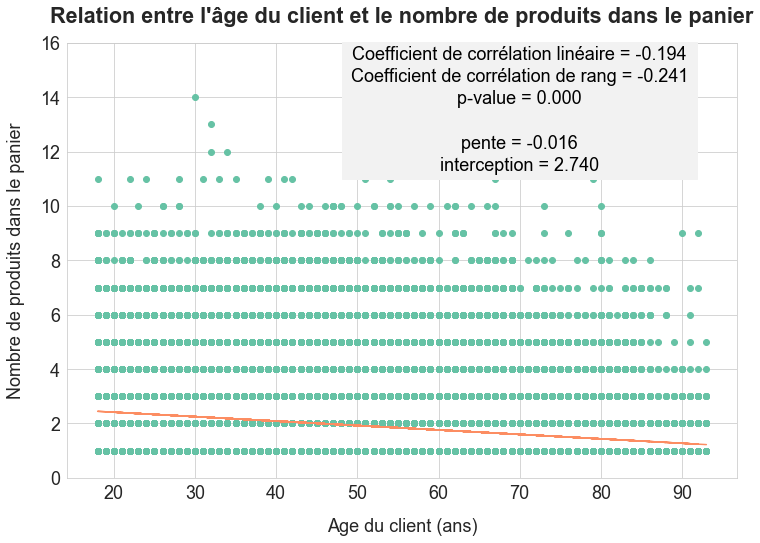

In [231]:
fig = plt.figure()
ax = plt.axes()
ax.plot(data_age_nbarticles.client_age, data_age_nbarticles.nombre_produits_panier,'o')
ax.plot(data_age_nbarticles.client_age.unique(), [slope*x+intercept for x in data_age_nbarticles.client_age.unique()])
#ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:.0f}'))
ax.set_ylabel("Nombre de produits dans le panier")
ax.set_ylim([0,16])
ax.set_xlabel("Age du client (ans)")
plt.text(70,15.9," Coefficient de corrélation linéaire = {:.3f} \n Coefficient de corrélation de rang = {:.3f} \np-value = {:.3f}\n\n\
pente = {:.3f}\ninterception = {:.3f}".format(correlpearson_age_nbarticles, correlspearman_age_nbarticles, p_value, slope, intercept),\
         horizontalalignment='center',verticalalignment='top', linespacing=1.3,  color='black', backgroundcolor=(0.95,0.95,0.95))
plt.title("Relation entre l'âge du client et le nombre de produits dans le panier")
plt.savefig("projet04_308_correlation_ageclient_nbproduits.png")
plt.show()

Ce graphique n'est pas très parlant car le nombre de produits dans un panier est nécessairement entier. On ne connait pas l'effectif de chaque point.  
Je vais mener la même analyse mais en calculant le nombre moyen de produits dans le panier pour chaque client. Le graphique devrait être plus facile à interpréter.

In [232]:
data_age_nbarticles = panier[["client_id","client_age","nombre_produits_panier"]].groupby("client_id").mean().reset_index()

# calcul du coefficient de corrélation r
correlpearson_age_nbarticles = st.pearsonr(data_age_nbarticles.client_age, data_age_nbarticles.nombre_produits_panier)[0]
correlspearman_age_nbarticles = st.spearmanr(data_age_nbarticles.client_age, data_age_nbarticles.nombre_produits_panier)[0]
print(correlpearson_age_nbarticles, correlspearman_age_nbarticles)

-0.22835264485878667 -0.22094394934132866


In [233]:
# estimation de la relation et calcul du coefficient de détermination (devrait être = à r²)
myY = data_age_nbarticles["nombre_produits_panier"]
myX = data_age_nbarticles[["client_age"]]
myX = myX.copy()
myX["intercept"] = 1.
model = sm.OLS(myY, myX)
results = model.fit()
slope, intercept = results.params["client_age"], results.params["intercept"]
r_value_squared, p_value, std_err = results.rsquared, results.pvalues["client_age"], results.bse["client_age"]

print("Le coefficient de corrélation linéaire (Pearson) entre l'âge du client et le nombre moyen de produits dans le panier vaut {:.3f}.".\
      format(correlpearson_age_nbarticles))
print("Le coefficient de corrélation de rang (Spearman) entre l'âge du client et le nombre moyen de produits dans le panier vaut {:.3f}.".\
      format(correlspearman_age_nbarticles))
print("La relation est estimée par l'équation : nombre moyen de produits dans le panier = {:.5f} * âge du client + {:.5f}".\
      format(slope, intercept))
print("La p-value du test de corrélation (hypothèse H0:r=0 H1:r!=0) vaut {:.3f}".format(p_value))

Le coefficient de corrélation linéaire (Pearson) entre l'âge du client et le nombre moyen de produits dans le panier vaut -0.228.
Le coefficient de corrélation de rang (Spearman) entre l'âge du client et le nombre moyen de produits dans le panier vaut -0.221.
La relation est estimée par l'équation : nombre moyen de produits dans le panier = -0.00870 * âge du client + 2.36422
La p-value du test de corrélation (hypothèse H0:r=0 H1:r!=0) vaut 0.000


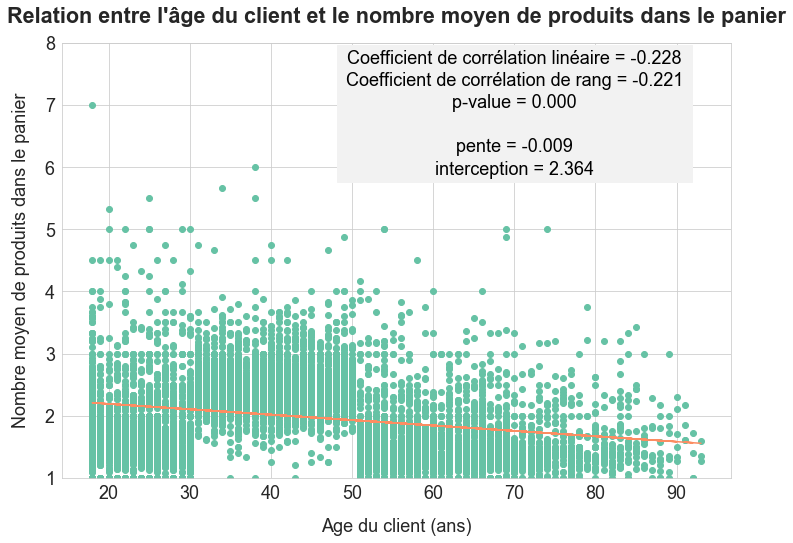

In [234]:
fig = plt.figure()
ax = plt.axes()
ax.plot(data_age_nbarticles.client_age, data_age_nbarticles.nombre_produits_panier,'o')
ax.plot(data_age_nbarticles.client_age.unique(), [slope*x+intercept for x in data_age_nbarticles.client_age.unique()])
#ax.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:.0f}'))
ax.set_ylabel("Nombre moyen de produits dans le panier")
ax.set_ylim([1,8])
ax.set_xlabel("Age du client (ans)")
plt.text(70,7.9," Coefficient de corrélation linéaire = {:.3f} \n Coefficient de corrélation de rang = {:.3f} \np-value = {:.3f}\n\n\
pente = {:.3f}\ninterception = {:.3f}".format(correlpearson_age_nbarticles, correlspearman_age_nbarticles, p_value, slope, intercept),\
         horizontalalignment='center',verticalalignment='top', linespacing=1.3,  color='black', backgroundcolor=(0.95,0.95,0.95))
plt.title("Relation entre l'âge du client et le nombre moyen de produits dans le panier")
plt.savefig("projet04_309_correlation_ageclient_nbmoyenproduits.png")
plt.show()

Le coefficient de corrélation est légèrement négatif. Le nombre moyen de produits dans le panier diminue légèrement à mesure que l'âge augmente.  
La p-value inférieure à 0.001 indique que le lien entre l'âge des clients et le nombre moyen de produits dans le panier est significatif. Mais la faible valeur négative du coefficient de corrélation montre que cette relation n'est pas très forte.  
On remarque sur le graphique que très peu de clients âgés entre 31 et 50 ans ont un nombre moyen d'articles par panier inférieur à 2, contrairement aux autres tranches d'âge.

Je mène une dernière analyse sur cette mesure en calculant le nombre moyen de produits dans le panier pour tous les clients d'un même âge.

In [235]:
data_age_nbarticles = panier[["client_age","nombre_produits_panier"]].groupby("client_age").mean().reset_index()

# calcul du coefficient de corrélation r
correlpearson_age_nbarticles = st.pearsonr(data_age_nbarticles.client_age, data_age_nbarticles.nombre_produits_panier)[0]
correlspearman_age_nbarticles = st.spearmanr(data_age_nbarticles.client_age, data_age_nbarticles.nombre_produits_panier)[0]
print(correlpearson_age_nbarticles, correlspearman_age_nbarticles)

-0.5946358543171337 -0.6571975393028024


In [236]:
# estimation de la relation et calcul du coefficient de détermination (devrait être = à r²)
myY = data_age_nbarticles["nombre_produits_panier"]
myX = data_age_nbarticles[["client_age"]]
myX = myX.copy()
myX["intercept"] = 1.
model = sm.OLS(myY, myX)
results = model.fit()
slope, intercept = results.params["client_age"], results.params["intercept"]
r_value_squared, p_value, std_err = results.rsquared, results.pvalues["client_age"], results.bse["client_age"]

print("Le coefficient de corrélation linéaire (Pearson) entre l'âge et le nombre moyen de produits dans le panier vaut {:.3f}.".\
      format(correlpearson_age_nbarticles))
print("Le coefficient de corrélation de rang (Spearman) entre l'âge et le nombre moyen de produits dans le panier vaut {:.3f}.".\
      format(correlspearman_age_nbarticles))
print("La relation est estimée par l'équation : nombre moyen de produits dans le panier = {:.5f} * âge + {:.5f}".\
      format(slope, intercept))
print("La p-value du test de corrélation (hypothèse H0:r=0 H1:r!=0) vaut {:.3f}".format(p_value))

Le coefficient de corrélation linéaire (Pearson) entre l'âge et le nombre moyen de produits dans le panier vaut -0.595.
Le coefficient de corrélation de rang (Spearman) entre l'âge et le nombre moyen de produits dans le panier vaut -0.657.
La relation est estimée par l'équation : nombre moyen de produits dans le panier = -0.01117 * âge + 2.38120
La p-value du test de corrélation (hypothèse H0:r=0 H1:r!=0) vaut 0.000


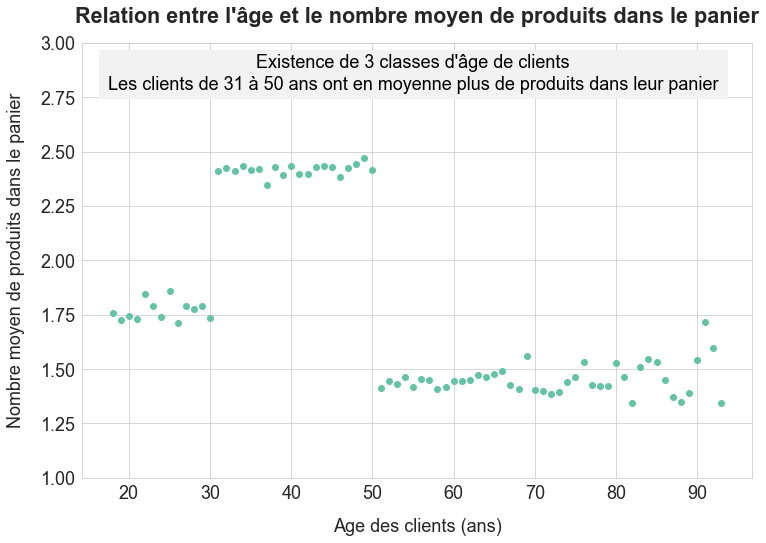

In [237]:
fig = plt.figure()
ax = plt.axes()
ax.plot(data_age_nbarticles.client_age, data_age_nbarticles.nombre_produits_panier,'o')
#ax.plot(data_age_nbarticles.client_age, [slope*x+intercept for x in data_age_nbarticles.client_age])
ax.set_ylabel("Nombre moyen de produits dans le panier")
ax.set_ylim([1,3])
ax.set_xlabel("Age des clients (ans)")
plt.text(55,2.95," Existence de 3 classes d'âge de clients \n Les clients de 31 à 50 ans ont en moyenne plus de produits dans leur panier ",\
         horizontalalignment='center',verticalalignment='top', linespacing=1.3,  color='black', backgroundcolor=(0.95,0.95,0.95))
plt.title("Relation entre l'âge et le nombre moyen de produits dans le panier")
plt.savefig("projet04_310_correlation_age_nbmoyenproduits.png")
plt.show()

Le coefficient de corrélation est fortement négatif (-0.595), ce qui signifie que le nombre moyen de produits dans le panier diminue avec l'âge. La p-value inférieure à 0.001 confirme la significativité de cette relation.  
Le graphique complète l'analyse. Une nouvelle fois, la corrélation ne semble pas linéaire mais plutôt par palier. On retrouve les trois mêmes groupes d'âge : 30 ans et moins, 31 à 50 ans, 51 ans et plus.  
Le coefficient de corrélation linéaire est ici quelque peu trompeur. Malgré sa valeur négative assez élevée, le nombre moyen de produits dans le panier des 31-50 ans est significativement plus élevé que celui des moins de 30 ans. Cela rejoint le graphique du nombre moyen de produits dans le panier pour chaque client, où l'on constate que la plupart des clients de 31 à 50 ans commandent en moyenne au moins 2 produits par panier, contrairement aux deux autres tranches d'âge.

## 3.5 Corrélation entre l'âge des clients et les catégories de produits achetés

In [238]:
mu = data["client_age"].mean()
classes = []
for classe in data["categ"].unique():
    yi_classe = data[data["categ"] == classe]["client_age"]
    classes.append({'nom': classe, 'ni': len(yi_classe), 'moyenne_classe': yi_classe.mean(), \
                    'alpha': yi_classe.mean() - mu})
SCT = sum([(yj - mu)**2 for yj in data["client_age"]])
SCE = sum([classe['ni'] * (classe['moyenne_classe'] - mu)**2 for classe in classes])
eta_squared = SCE / SCT

In [239]:
classes = pd.DataFrame(classes)
classes.index = classes.nom
classes = classes.reindex([0,1,2])
classes.index = ["Catégorie {}".format(nom) for nom in classes.nom]
classes.columns = ["alpha", "âge moyen", "nombre de ventes","nom"]
print("Le rapport de corrélation (eta squared) du modèle vaut {:.3f}.\nL'âge moyen des clients est de {:.2f} ans.\
 La valeur des alphas et de l'âge moyen pour chaque classe est :".format(eta_squared, mu))
classes.iloc[:,:-1]

Le rapport de corrélation (eta squared) du modèle vaut 0.113.
L'âge moyen des clients est de 44.21 ans. La valeur des alphas et de l'âge moyen pour chaque classe est :


alpha  âge moyen  nombre de ventes
Catégorie 0  -0.406695  43.799872            195270
Catégorie 1   3.607289  47.813856            102625
Catégorie 2 -18.455361  25.751206             15756

Le rapport de corrélation est proche de 0. Il ne semble pas y avoir de relation entre l'âge des clients et la catégorie des produits achetés. Pourtant, les alphas semblent de leur côté montrer que l'âge moyen des clients change de façon significative d'une catégorie à l'autre.  
Je fais un test ANOVA pour vérifier si une relation significative existe entre ces deux variables.

In [240]:
anova_age_categ = data[["categ","client_age"]]
fstats, pvalue = st.f_oneway(anova_age_categ[anova_age_categ.categ==0].client_age,\
                             anova_age_categ[anova_age_categ.categ==1].client_age,\
                             anova_age_categ[anova_age_categ.categ==2].client_age)
print("La F Statistique du test vaut {:.2f} et sa p-value = {:.3f}".format(fstats, pvalue))

La F Statistique du test vaut 19936.92 et sa p-value = 0.000


Il faut vérifier si les groupes ont des écarts types à peu près similaires et suivent une loi normale. Etant donné qu'il y a plus de 5000 individus dans chaque catégorie, la normalité est testée avec un test de Kolmogorov-Smirnov.

In [241]:
data0 = anova_age_categ[anova_age_categ.categ==0].client_age
data1 = anova_age_categ[anova_age_categ.categ==1].client_age
data2 = anova_age_categ[anova_age_categ.categ==2].client_age
verif_std = [data0.std(),data1.std(),data2.std()]
verif_normalite = [st.kstest(data0, 'norm', args=(data0.mean(), data0.std()))[1],\
            st.kstest(data1, 'norm', args=(data1.mean(), data1.std()))[1],\
            st.kstest(data2, 'norm', args=(data2.mean(), data2.std()))[1]]
print(verif_std)
print(verif_normalite)

[11.512822187745956, 15.802643612362582, 9.632348990252348]
[0.0, 3.0249681711652017e-180, 0.0]


Les groupes n'ont pas des écarts-types proches et ne suivent pas une loi normale. Donc la p-value de la F statistique n'est pas nécessairement très significative.  
La valeur inférieure à 0.001 de la p-value indique que l'âge moyen diffère d'une catégorie à l'autre, et donc que l'âge et la catégorie des produits sont donc liés. Mais ce résultat est à prendre avec précaution.

In [242]:
sns.set_style("white")

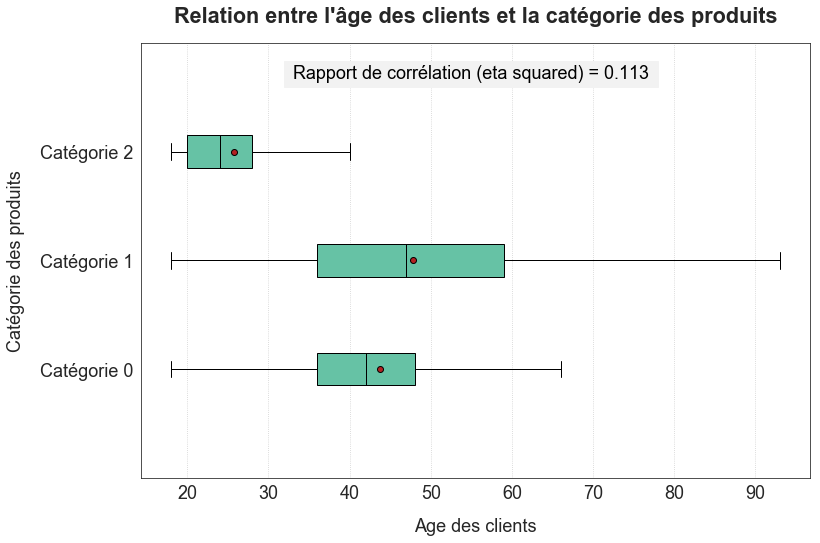

In [243]:
modalites = classes.nom
groupes = []
for m in modalites:
    groupes.append(data[data["categ"]==m]["client_age"])
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
fig = plt.figure()
ax = plt.axes()
plt.boxplot(groupes, labels=classes.index, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
ax.set_ylim([0,4])
ax.set_ylabel("Catégorie des produits")
ax.set_xlabel("Age des clients")
ax.grid(axis="x", linestyle=":")
plt.text(55,3.8," Rapport de corrélation (eta squared) = {:.3f} ".format(eta_squared),\
         horizontalalignment='center',verticalalignment='top',color='black',backgroundcolor=(0.95,0.95,0.95))
plt.title("Relation entre l'âge des clients et la catégorie des produits")
plt.savefig("projet04_311_correlation_age_categorie3.png")
plt.show()

Le graphique ci-dessus permet d'affiner légèrement l'analyse, en gardant en mémoire que les outliers ne sont pas affichés.  
La principale conclusion concerne les produits de catégorie 2 : ils sont principalement commandés par les clients de moins 
de 30 ans.

Il peut être intéressant de recommencer l'analyse en regroupant les catégories 0 et 1 qui ne semblent pas si différentes.

In [244]:
mu = data["client_age"].mean()

classes = []
yi_classe = data[data["categ"] != 2]["client_age"]
classes.append({'nom': "0 et 1", 'ni': len(yi_classe), 'moyenne_classe': yi_classe.mean(), \
                    'alpha': yi_classe.mean() - mu})
yi_classe = data[data["categ"] == 2]["client_age"]
classes.append({'nom': "2", 'ni': len(yi_classe), 'moyenne_classe': yi_classe.mean(), \
                    'alpha': yi_classe.mean() - mu})

SCT = sum([(yj - mu)**2 for yj in data["client_age"]])
SCE = sum([classe['ni'] * (classe['moyenne_classe'] - mu)**2 for classe in classes])
eta_squared = SCE / SCT

In [245]:
classes = pd.DataFrame(classes)
classes.index = classes.nom
classes.index = ["Catégorie {}".format(nom) for nom in classes.nom]
classes.columns = ["alpha", "âge moyen", "nombre de ventes","nom"]
print("Le rapport de corrélation (eta squared) du modèle vaut {:.3f}.\nL'âge moyen des clients est de {:.2f} ans.\
 La valeur des alphas et de l'âge moyen pour chaque classe est :".format(eta_squared, mu))
classes.iloc[:,:-1]

Le rapport de corrélation (eta squared) du modèle vaut 0.095.
L'âge moyen des clients est de 44.21 ans. La valeur des alphas et de l'âge moyen pour chaque classe est :


alpha  âge moyen  nombre de ventes
Catégorie 0 et 1   0.976125  45.182692            297895
Catégorie 2      -18.455361  25.751206             15756

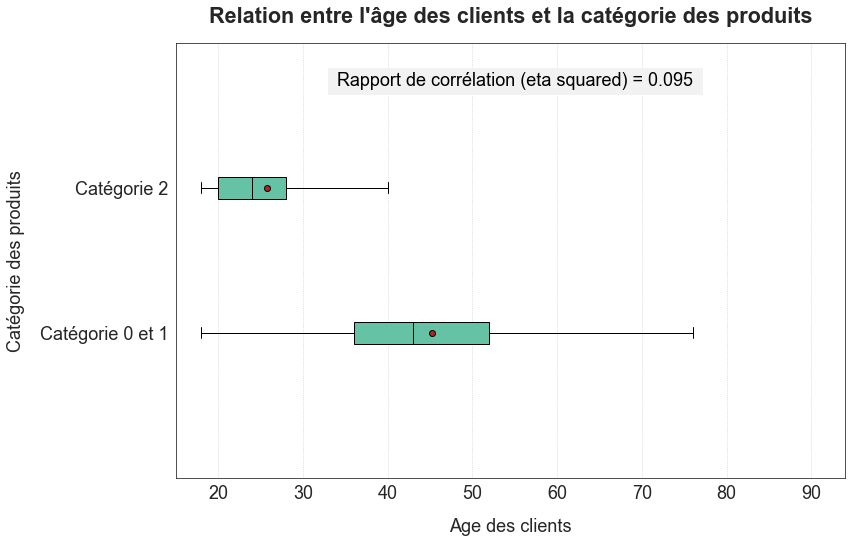

In [246]:
modalites = classes.nom
groupes = []
groupes.append(data[data["categ"]!=2]["client_age"])
groupes.append(data[data["categ"]==2]["client_age"])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
fig = plt.figure()
ax = plt.axes()
plt.boxplot(groupes, labels=classes.index, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
ax.set_ylim([0,3])
ax.set_ylabel("Catégorie des produits")
ax.set_xlabel("Age des clients")
ax.set_xlim([15,94])
ax.grid(axis="x", linestyle=":")
plt.text(55,2.8," Rapport de corrélation (eta squared) = {:.3f} ".format(eta_squared),\
         horizontalalignment='center',verticalalignment='top',color='black',backgroundcolor=(0.95,0.95,0.95))
plt.title("Relation entre l'âge des clients et la catégorie des produits")
plt.savefig("projet04_312_correlation_age_categorie2.png")
plt.show()

Avec ce graphique, un lien entre l'âge et la catégorie des produits se fait plus évident : les produits de la catégorie 2 sont achetés essentiellement par les moins de 30 ans, alors que les produits des catégories 0 et 1 sont achetés essentiellement par les plus de 30 ans.  
J'émets cependant une réserve sur cette analyse à cause de la grande différence d'effectifs entre les deux catégories de produits créés : les produits de la catégorie 2 ne représentent que 7.3% de la base produits.

Vérifions cette relation avec un test ANOVA

In [247]:
data0 = anova_age_categ[(anova_age_categ.categ==0) | (anova_age_categ.categ==1)].client_age
data1 = anova_age_categ[anova_age_categ.categ==2].client_age
fstats, pvalue = st.f_oneway(data0,data1)
print("La F Statistique du test vaut {:.2f} et sa p-value = {:.3f}".format(fstats, pvalue))

La F Statistique du test vaut 32785.42 et sa p-value = 0.000


In [248]:
verif_std = [data0.std(),data1.std()]
verif_normalite = [st.kstest(data0, 'norm', args=(data0.mean(), data0.std()))[1],\
            st.kstest(data1, 'norm', args=(data1.mean(), data1.std()))[1]]
print(verif_std)
print(verif_normalite)

[13.28724431850104, 9.632348990252348]
[0.0, 0.0]


Encore une fois, la p-value indique que les âges moyens ne sont pas égaux, donc que la catégorie des produits est liée à l'âge des clients, mais les conditions pour que le test soit significatif ne sont pas remplies.